🗂️ **Dataset Overview**

This dataset contains performance, physical, and economic attributes of 202 professional football (soccer) players from three of the top English Premier League (EPL) clubs: Manchester United (MUN), Chelsea (CHE), and Liverpool (LIV). The goal of this dataset is to enable predictive modeling, particularly regression-based approaches, to estimate a player's performance score (Score) based on a combination of technical metrics, financial data, and physical characteristics.

📃 **Dataset Summary**:

    Total Rows (Players): 202

    Total Features (Columns): 13

    Target Variable: Score (Player performance score)

📌 **Column Categories**:

    🔖 Categorical Variables:

        PlayerName: Unique identifier for each player (some duplicates may represent repeated entries or versioned records).

        Club: Club the player belongs to (CHE, LIV, MUN).

    🔖 Performance Metrics:

        DistanceCovered(InKms): Total distance covered by the player per game (in kilometers).

        Goals: Total goals scored by the player.

        MinutestoGoalRatio: Number of minutes played per goal scored.

        ShotsPerGame: Average number of shots taken per game.

    🔖 Economic Variables:

        AgentCharges: Monetary cost associated with the player's agent (in thousands or arbitrary units).

        Cost: Current market cost or transfer value of the player.

        PreviousClubCost: Cost of the player when acquired from the previous club.

    🔖 Physical Attributes:

        BMI: Body Mass Index of the player.

        Height: Player's height in centimeters.

        Weight: Player's weight in kilograms.

    🔖 Target Variable:

        Score: Final calculated performance score of the player, potentially a composite metric based on their on-field contributions.🗂️ **Dataset Overview**

This dataset contains performance, physical, and economic attributes of 202 professional football (soccer) players from three of the top English Premier League (EPL) clubs: Manchester United (MUN), Chelsea (CHE), and Liverpool (LIV). The goal of this dataset is to enable predictive modeling, particularly regression-based approaches, to estimate a player's performance score (Score) based on a combination of technical metrics, financial data, and physical characteristics.

📃 **Dataset Summary**:

    Total Rows (Players): 202

    Total Features (Columns): 13

    Target Variable: Score (Player performance score)

📌 **Column Categories**:

    🔖 Categorical Variables:

        PlayerName: Unique identifier for each player (some duplicates may represent repeated entries or versioned records).

        Club: Club the player belongs to (CHE, LIV, MUN).

    🔖 Performance Metrics:

        DistanceCovered(InKms): Total distance covered by the player per game (in kilometers).

        Goals: Total goals scored by the player.

        MinutestoGoalRatio: Number of minutes played per goal scored.

        ShotsPerGame: Average number of shots taken per game.

    🔖 Economic Variables:

        AgentCharges: Monetary cost associated with the player's agent (in thousands or arbitrary units).

        Cost: Current market cost or transfer value of the player.

        PreviousClubCost: Cost of the player when acquired from the previous club.

    🔖 Physical Attributes:

        BMI: Body Mass Index of the player.

        Height: Player's height in centimeters.

        Weight: Player's weight in kilograms.

    🔖 Target Variable:

        Score: Final calculated performance score of the player, potentially a composite metric based on their on-field contributions.

In [71]:
import pandas as pd
import numpy as np

import scipy
from scipy import stats
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
import tensorflow as tf


import matplotlib.pyplot as plt
import seaborn as sns



## **Exploratory Data Analysis**

In [72]:
df = pd.read_csv('../data/Raw/EPL_Soccer.csv')

In [73]:
df.head(5)

PlayerName Club  DistanceCovered(InKms)  Goals  \
0         Braund, Mr. Owen Harris  MUN                    3.96    7.5   
1        Allen, Mr. William Henry  MUN                    4.41    8.3   
2                Moran, Mr. James  MUN                    4.14    5.0   
3         McCarthy, Mr. Timothy J  MUN                    4.11    5.3   
4  Palsson, Master. Gosta Leonard  MUN                    4.45    6.8   

   MinutestoGoalRatio  ShotsPerGame  AgentCharges    BMI   Cost  \
0                37.5          12.3            60  20.56  109.1   
1                38.2          12.7            68  20.67  102.8   
2                36.4          11.6            21  21.86  104.6   
3                37.3          12.6            69  21.88  126.4   
4                41.5          14.0            29  18.96   80.3   

   PreviousClubCost  Height  Weight  Score  
0             63.32   195.9    78.9  19.75  
1             58.55   189.7    74.4  21.30  
2             55.36   177.8    69.1  19.88  
3             57.18   185.0    74.9  23.66  
4             53.20   184.6    64.6  17.64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


In [75]:
df.shape

(202, 13)

In [76]:
df.describe(include='all')

PlayerName Club  DistanceCovered(InKms)       Goals  \
count                        202  202              202.000000  202.000000   
unique                       198    3                     NaN         NaN   
top     Rogers, Mr. William John  CHE                     NaN         NaN   
freq                           2   78                     NaN         NaN   
mean                         NaN  NaN                4.718614    7.108663   
std                          NaN  NaN                0.457976    1.800549   
min                          NaN  NaN                3.800000    3.300000   
25%                          NaN  NaN                4.372500    5.900000   
50%                          NaN  NaN                4.755000    6.850000   
75%                          NaN  NaN                5.030000    8.275000   
max                          NaN  NaN                6.720000   14.300000   

        MinutestoGoalRatio  ShotsPerGame  AgentCharges         BMI  \
count           202.000000    202.000000    202.000000  202.000000   
unique                 NaN           NaN           NaN         NaN   
top                    NaN           NaN           NaN         NaN   
freq                   NaN           NaN           NaN         NaN   
mean             43.091584     14.566337     76.876238   22.955891   
std               3.662989      1.362451     47.501239    2.863933   
min              35.900000     11.600000      8.000000   16.750000   
25%              40.600000     13.500000     41.250000   21.082500   
50%              43.500000     14.700000     65.500000   22.720000   
75%              45.575000     15.575000     97.000000   24.465000   
max              59.700000     19.200000    234.000000   34.420000   

              Cost  PreviousClubCost      Height      Weight       Score  
count   202.000000        202.000000  202.000000  202.000000  202.000000  
unique         NaN               NaN         NaN         NaN         NaN  
top            NaN               NaN         NaN         NaN         NaN  
freq           NaN               NaN         NaN         NaN         NaN  
mean     69.021782         64.873713  180.103960   75.008168   13.507426  
std      32.565333         13.070197    9.734494   13.925574    6.189826  
min      28.000000         34.360000  148.900000   37.800000    5.630000  
25%      43.850000         54.667500  174.000000   66.525000    8.545000  
50%      58.600000         63.035000  179.700000   74.400000   11.650000  
75%      90.350000         74.750000  186.175000   84.125000   18.080000  
max     200.800000        106.000000  209.400000  123.200000   35.520000

In [77]:
def desc_table(dataframe):
    description_table = []
    for col in dataframe.columns:
        col_data = dataframe[col]
        dtype = col_data.dtype
        num_unique = col_data.nunique()
        num_missing = col_data.isnull().sum()
                
        if pd.api.types.is_numeric_dtype(col_data):
            stats = {
                "Mean": col_data.mean().round(2),
                "Std Dev": col_data.std().round(2),
                "Min": col_data.min().round(2),
                "25%": col_data.quantile(0.25).round(2),
                "Median": col_data.median().round(2),
                "75%": col_data.quantile(0.75).round(2),
                "Max": col_data.max().round(2)
            }
        else:
            stats = {
                "Mean": None,
                "Std Dev": None,
                "Min": None,
                "25%": None,
                "Median": None,
                "75%": None,
                "Max": None
            }
        description_table.append({
            "Column": col,
            "Data Type": str(dtype),
            "Unique Values": num_unique,
            "Missing Values": num_missing,
            **stats
        })
    return pd.DataFrame(description_table)

As you can see, we have some descriptive statistics insights that measures the following:
The Central Tendency and Data Dispersion:
**General Findings for (Means & Standard Deviation):**
- DistanceCovered(KMs): *Mean*=4.72 & *Std*=0.46 that means the average distance covered by all the listed players is 4.72 KM and the std < 1 that means this is the most range for all the players and there's no significant variability between them
  
- Goals: *Mean*=7.11 & *Std*=1.80 that means the average number of goals scored by each player is 7 goals and the std > 1 here means that this average values will vary significantly amng the players indicating that there are players with higher performance in scoring goals
  
- MinutesToGoalRatio: *Mean*=43.09 Std*=3.66 this indicates that the average minutes for each player to score a goal is 43 min/goal during the match and the std values indicates that there's a high variability among the players in the time taken to score a goal that means there are players score goal in significant lower or higher number of minutes during the match
  
- ShotsPerGame: *Mean*=14.57 & *Std*=1.36 it indicates that the average number of shots per game for each player is 14 shots and the std > 1 means that there's a significant variability among the players for that attribute

- AgentCharges: *Mean*=76.88 & *Std*=47.50 it indicates that the average money taken by the player agent is 7800000$ and the very high std value indicates that there is a significant variability in the agent charges and this could be noticed from the min=8 Million and max value 234 Million

- BMI: *Mean*=22.96 & *Std*=2.86 it indicates the typical athletic physical range and the std shows that there are divers physiques 

- Cost: *Mean*=69.02 & *Std*=32.57: it indicates that players on average costs 69Million and the high std indicates that their is high variance for the cost among the players or there are some players that have very high cost corresponding to the others

- PreviousClubCost: *Mean*=64.87 & *Std*=13.07 it indicates the same as previous but for the previous club and if you take a look at the cost range min and max you will find that there's a significant investment in the current club for each player

- Height: *Mean*=180.10 & *Std*=9.73 it indicates the average height of typical player is 180cm and there is a variability in height among players that could be noticed through the min and max values

- Weight: *Mean*=75.01 & *Std*=13.93 The same as previous weight in kg

- Score: *Mean*=13.51 & *Std*=6.19 indicated the average for the calculated performance score for each player and the std shows that there is a significant variability among the players' performance

>So according to the high std relative to the mean of AgentCharges Cost Score, shows that there are significant variability between the data and increase the power of regression models to learn from the data.

### categorical variables Findings:
- **PlayerName**: it shows that there are diverse number of players with slight repetition in the observations
- **Club**: we have 3 clubs that means we have a sample of the premium league clubs and the regression analysis may not be generalized over the whole premium league as each club has diverse culture and players with diverse performance.

### **Inferential Insights:**

- The Player with high cost strongly influence his score as the management of the club will not pay that much for a player with low score performance
  
- Shots per game and minutes to goal ratio also influences the player score  
  
- The BMI and Weight variability affects the players' performance metrics like the DistanceCovered and minutes per Goal ratio and hence the player score indirectly

In [78]:
desc_table(df)

Column Data Type  Unique Values  Missing Values    Mean  \
0               PlayerName    object            198               0     NaN   
1                     Club    object              3               0     NaN   
2   DistanceCovered(InKms)   float64            114               0    4.72   
3                    Goals   float64             71               0    7.11   
4       MinutestoGoalRatio   float64            105               0   43.09   
5             ShotsPerGame   float64             55               0   14.57   
6             AgentCharges     int64            111               0   76.88   
7                      BMI   float64            180               0   22.96   
8                     Cost   float64            176               0   69.02   
9         PreviousClubCost   float64            135               0   64.87   
10                  Height   float64            147               0  180.10   
11                  Weight   float64            164               0   75.01   
12                   Score   float64            180               0   13.51   

    Std Dev     Min     25%  Median     75%     Max  
0       NaN     NaN     NaN     NaN     NaN     NaN  
1       NaN     NaN     NaN     NaN     NaN     NaN  
2      0.46    3.80    4.37    4.76    5.03    6.72  
3      1.80    3.30    5.90    6.85    8.28   14.30  
4      3.66   35.90   40.60   43.50   45.58   59.70  
5      1.36   11.60   13.50   14.70   15.58   19.20  
6     47.50    8.00   41.25   65.50   97.00  234.00  
7      2.86   16.75   21.08   22.72   24.46   34.42  
8     32.57   28.00   43.85   58.60   90.35  200.80  
9     13.07   34.36   54.67   63.04   74.75  106.00  
10     9.73  148.90  174.00  179.70  186.18  209.40  
11    13.93   37.80   66.53   74.40   84.12  123.20  
12     6.19    5.63    8.54   11.65   18.08   35.52

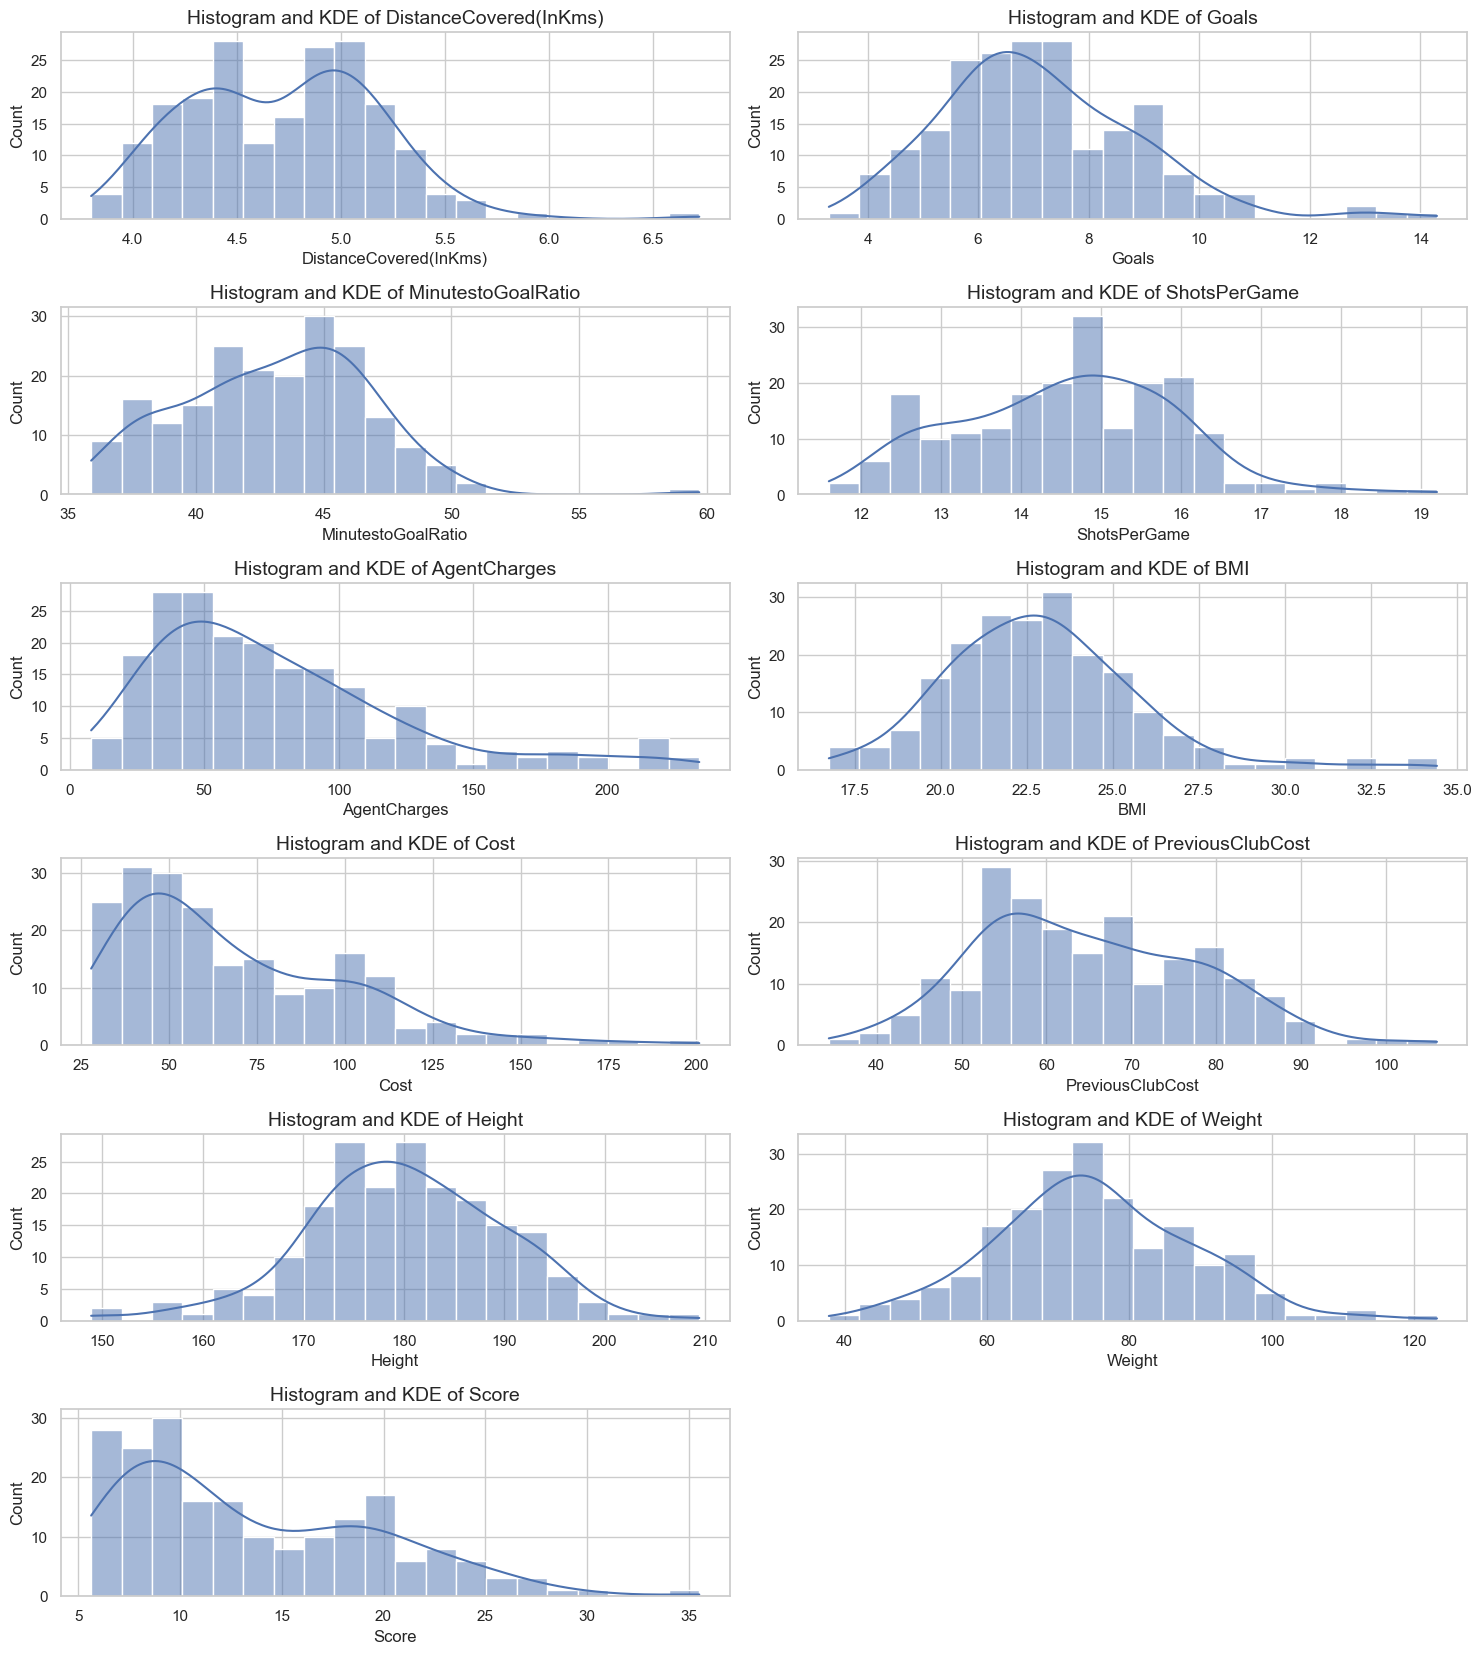

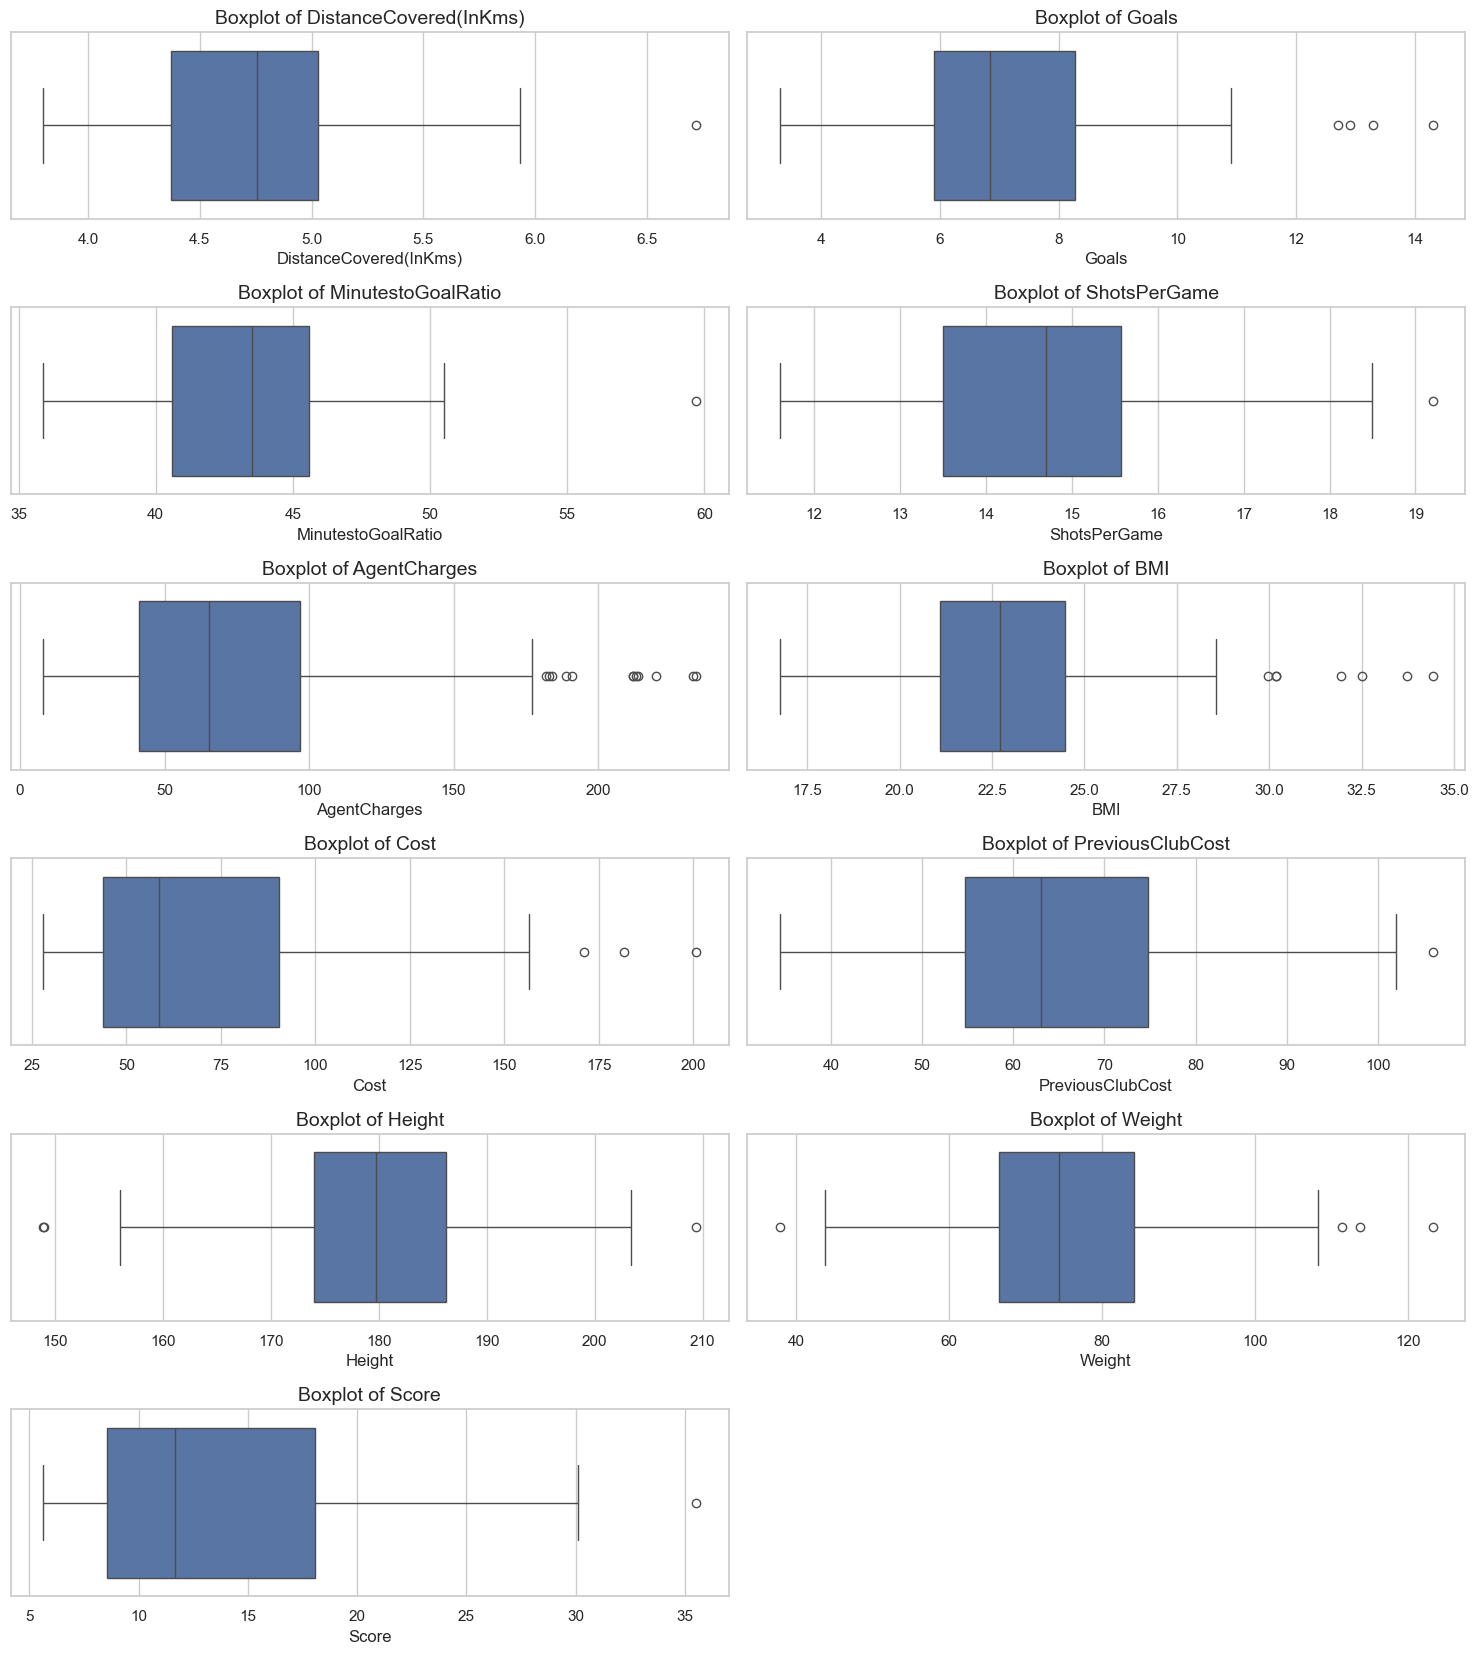

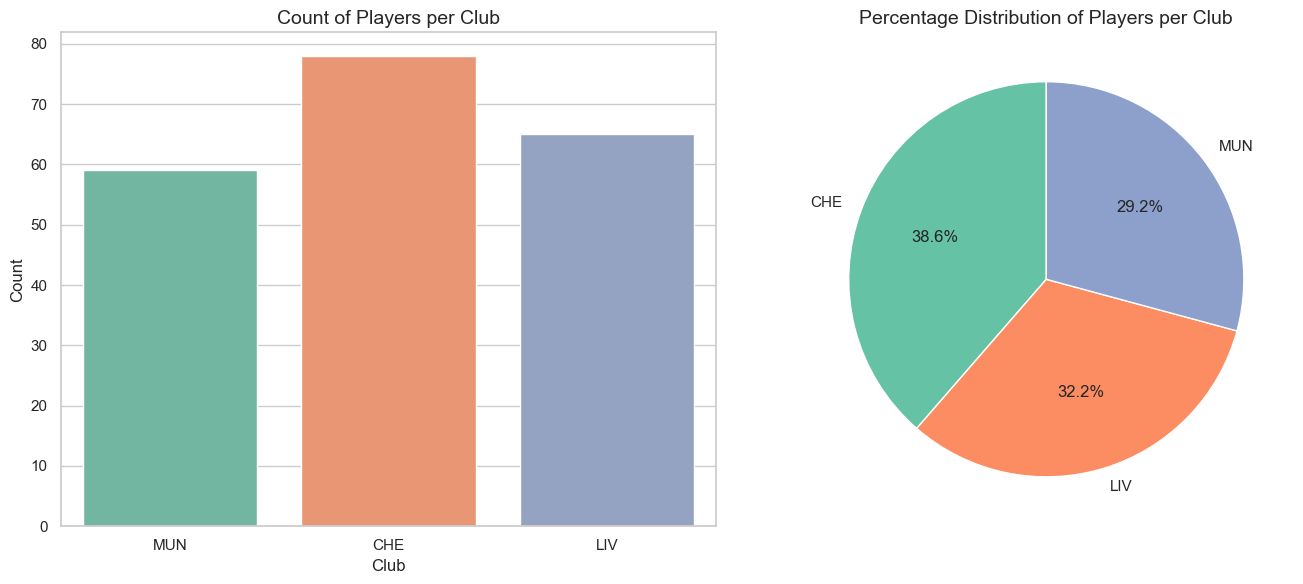

In [79]:
# Select Numerical Columns for histograms and boxplots
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot Histograms and KDE for Numeric Variables
plt.figure(figsize=(15, 30))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 2, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Histogram and KDE of {col}', fontsize=14)
plt.tight_layout()
plt.show()

# Plot Boxplots for Numeric Variables to identify outliers
plt.figure(figsize=(15, 30))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}', fontsize=14)
plt.tight_layout()
plt.show()

# Plot Count Plot and Pie Chart for Categorical Variable (Club)
plt.figure(figsize=(14, 6))

# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x='Club', data=df, palette='Set2')
plt.title('Count of Players per Club', fontsize=14)
plt.xlabel('Club')
plt.ylabel('Count')

# Pie chart
plt.subplot(1, 2, 2)
club_counts = df['Club'].value_counts()
plt.pie(club_counts, labels=club_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Percentage Distribution of Players per Club', fontsize=14)

plt.tight_layout()
plt.show()


As you can see,

> Using the Histogram with KDE Plot we can notice the distribution and skewness of the data.

>using the Box Plot we can see:
- where most data values actually lie or in what range by investigating the IQR that is our Box 

- the median and mean 

- the Min value(left/bottom end of the whisker) and Max Value(right/top of whisker) 

- determine the distribution and skewness of the data by looking at the median line if it's skewed up/right or down/bottom  

- the most important thing that we use to determine the outliers through the whiskers and points outside the whiskers.

> Use the **Count** or **bar plot** to see the count for each category **Pie charts** for categorical values proportions 

# **Data Preprocessing:**
> Data Cleaning:
 >> - Handling Missing Values
 >> - Handling Duplicates
 >> - Handling Outliers

>#### **Handling Missing Values**

In [80]:
def detect_missing(dataframe):
    missing_values = dataframe.isnull().sum()
    missing_values_percentage = (missing_values / len(dataframe)) * 100
    missing_values_df = pd.DataFrame({'Missing Values':missing_values, 'Percentage':missing_values_percentage})
    return missing_values_df



In [81]:
def handle_missing_numval(dataframe):
    numerical_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_columns:
        if dataframe[col].isnull().sum() > 0:
            print(f"Missing Values in column {col} is Detected and Imputing is in progress...")
            median = dataframe[col].median()
            print(f"The Missing Value will be imputed with the following Median Value{median}")
            dataframe[col].fillna(median, inplace=True)
            print(f"Missing Values Got Imputed Successfully 💪")
        else:
            print(f"Missing Values in column {col} is Not Detected, No Imputation Needed 🙌")
            

In [82]:
def handle_missing_catval(dataframe):
    categorical_columns = dataframe.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        if dataframe[col].isnull().sum() > 0:
            print(f"Missing Values in column {col} is Detected and Imputing is in progress...")
            mode = dataframe[col].mode()
            print(f"The Missing Value will be imputed with the following frequent value or mode {mode}")
            dataframe[col].fillna(mode, inplace=True)
            print(f"Missing Values Got Imputed Successfully 💪")
        else:
            print(f"Missing Values in column {col} is Not Detected, No Imputation Needed 🙌")
            

>#### **Handling Duplicate Values**

In [83]:
def handle_dup(dataframe):
    duplicates = dataframe.duplicated().sum()
    if duplicates > 0:
        print(f"Number of Duplicate Rows Detected: {duplicates}")
        print("Dropping Duplicate Rows...")
        dataframe.drop_duplicates(inplace=True)
        print("Duplicates Dropped Successfully 💪")
    else:
        print("No Duplicate Rows Detected 🙌")

In [84]:
print(f"Number of Unique Clubs: {df['Club'].nunique()}")
print(f"Number of Unique Players: {df['PlayerName'].nunique()}")

Number of Unique Clubs: 3
Number of Unique Players: 198


In [85]:
club_counts = df['Club'].value_counts()
club_counts_df = pd.DataFrame(club_counts).reset_index()
club_counts_df

Club  count
0  CHE     78
1  LIV     65
2  MUN     59

In [86]:
handle_dup(df)

No Duplicate Rows Detected 🙌


In [87]:
# Check if data is valid or not by looking for the duplicates in the ID Column and The ID here is considered to be the PlayerName
def check_data_integrity(dataframe,ID_Col_name):
    if dataframe[ID_Col_name].is_unique:
        print(f"Data Integrity Check Passed ✔️")
    else:
        print(f"Data Integrity Check Failed ❌")
        duplicates = dataframe[dataframe.duplicated([ID_Col_name], keep=False)]
        print(f"Number of Duplicate Entries: {duplicates.shape[0]}")        
        display(duplicates)


In [88]:
check_data_integrity(df,'PlayerName')

Data Integrity Check Failed ❌
Number of Duplicate Entries: 8


PlayerName Club  DistanceCovered(InKms)  Goals  \
7        Rice, Master. Eugene  MUN                    4.42    5.7   
22   Rogers, Mr. William John  MUN                    4.46    9.5   
111      Rice, Master. Arthur  CHE                    4.81    6.2   
178        Rice, Master. Eric  LIV                    5.01    8.9   
184      Rice, Master. Arthur  LIV                    5.34   10.0   
185        Rice, Master. Eric  LIV                    5.16   12.9   
186      Rice, Master. Eugene  LIV                    5.29   12.7   
191  Rogers, Mr. William John  LIV                    5.08    8.5   

     MinutestoGoalRatio  ShotsPerGame  AgentCharges    BMI   Cost  \
7                  39.9          13.2            44  20.62   97.9   
22                 41.5          14.5            92  22.96   83.0   
111                45.2          15.3           107  22.52   42.7   
178                46.0          15.9           212  30.18   96.9   
184                46.8          16.2            94  25.82  100.7   
185                47.6          15.6           156  21.93   56.8   
186                48.0          16.2           124  23.38   75.9   
191                46.3          15.6           117  26.86   75.6   

     PreviousClubCost  Height  Weight  Score  
7               48.33   173.8    62.3  22.43  
22              56.05   174.0    69.5  19.35  
111             77.00   192.0    83.0   7.19  
178             80.00   180.1    97.9  18.08  
184             71.00   182.7    86.2  17.24  
185             72.00   190.5    79.6   9.89  
186             74.00   191.0    85.3  13.06  
191             86.00   193.9   101.0  14.98

In [89]:
def col_ranges(dataframe):
    ranges={}
    for col in dataframe.columns:
        if pd.api.types.is_numeric_dtype(dataframe[col]):
            ranges[col] = (dataframe[col].min(), dataframe[col].max())
    return pd.DataFrame(ranges, index=['Min','Max']).T

In [90]:
col_ranges(df)

Min     Max
DistanceCovered(InKms)    3.80    6.72
Goals                     3.30   14.30
MinutestoGoalRatio       35.90   59.70
ShotsPerGame             11.60   19.20
AgentCharges              8.00  234.00
BMI                      16.75   34.42
Cost                     28.00  200.80
PreviousClubCost         34.36  106.00
Height                  148.90  209.40
Weight                   37.80  123.20
Score                     5.63   35.52

In [91]:
# Configure visualization settings
plt.style.use('seaborn-v0_8-whitegrid') 
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

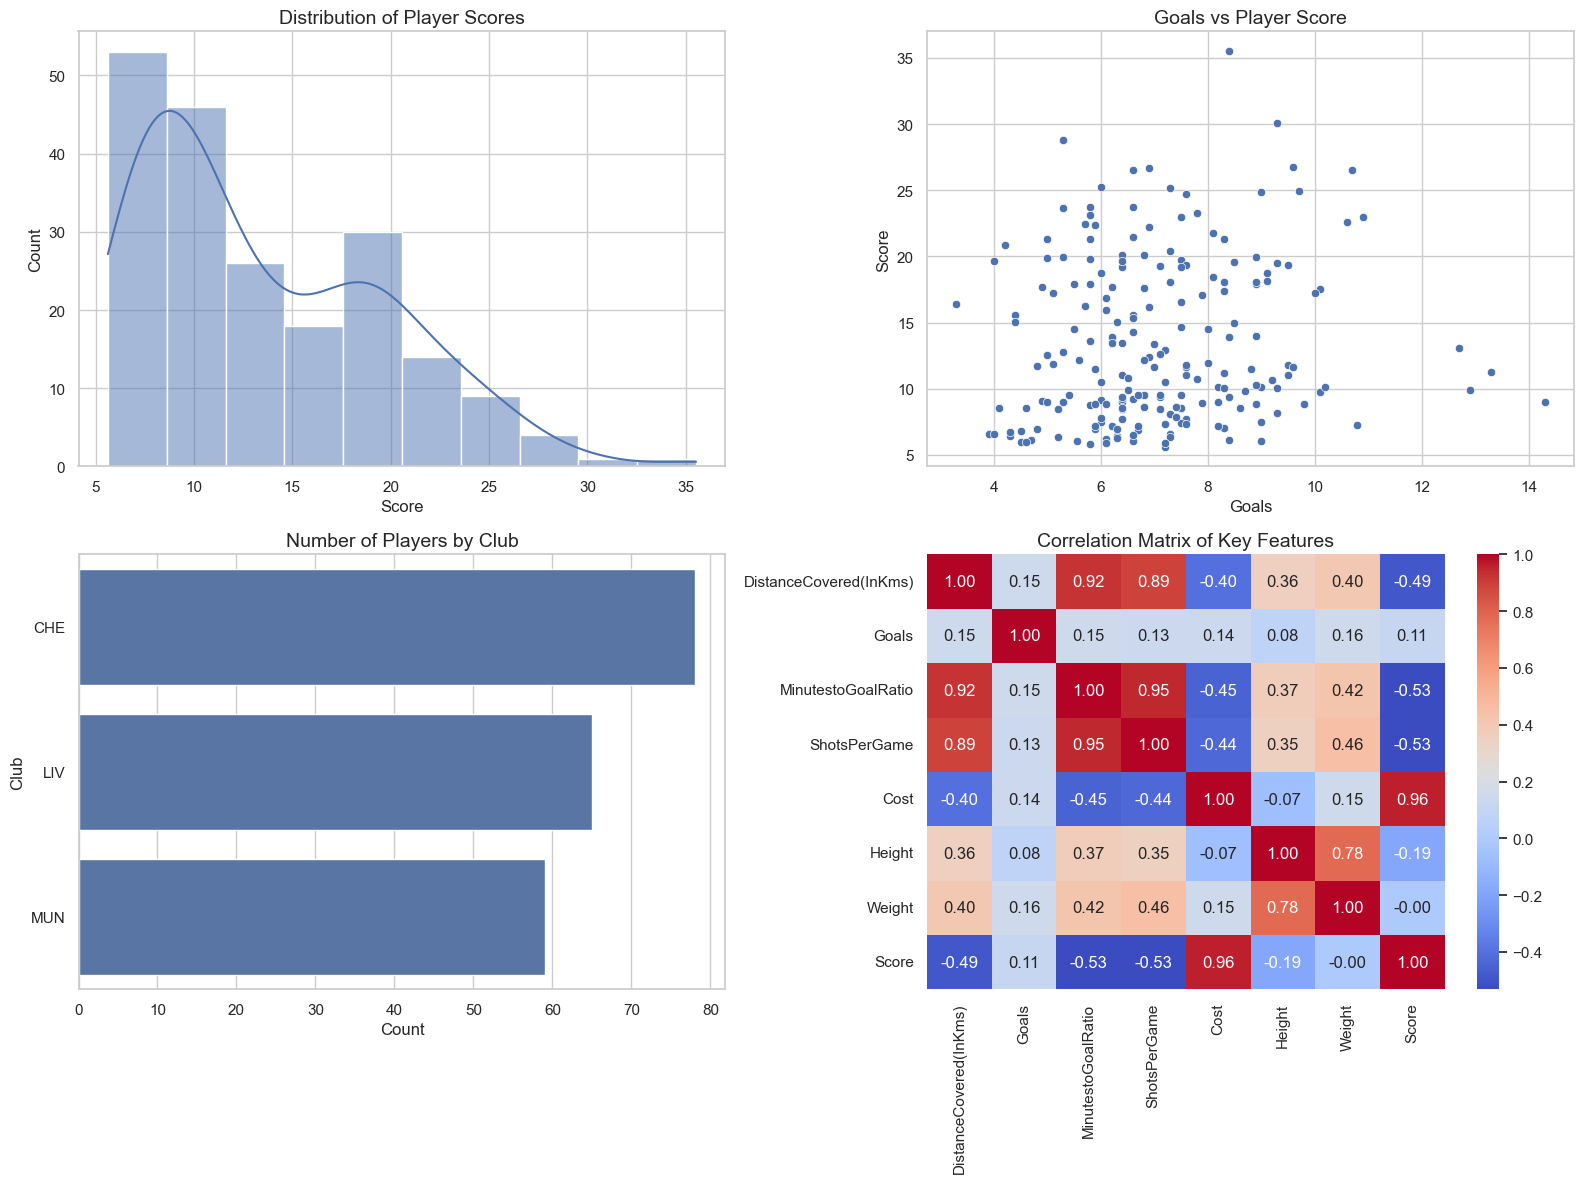

In [92]:
# Create visualizations for initial data examination
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Distribution of target variable
sns.histplot(df['Score'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Player Scores', fontsize=14)
axes[0, 0].set_xlabel('Score', fontsize=12)


# Goals vs Score relationship
sns.scatterplot(x='Goals', y='Score', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Goals vs Player Score', fontsize=14)
axes[0, 1].set_xlabel('Goals', fontsize=12)
axes[0, 1].set_ylabel('Score', fontsize=12)


# Players per club
club_order = df['Club'].value_counts().index
sns.countplot(y='Club', data=df, order=club_order, ax=axes[1, 0])
axes[1, 0].set_title('Number of Players by Club', fontsize=14)
axes[1, 0].set_xlabel('Count', fontsize=12)
axes[1, 0].set_ylabel('Club', fontsize=12)


# Correlation heatmap of key numerical features
corr_cols = ['DistanceCovered(InKms)', 'Goals', 'MinutestoGoalRatio', 
             'ShotsPerGame', 'Cost', 'Height', 'Weight', 'Score']
corr_matrix = df[corr_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1, 1])
axes[1, 1].set_title('Correlation Matrix of Key Features', fontsize=14)

plt.tight_layout()
plt.savefig('initial_data_analysis.png')
plt.show()


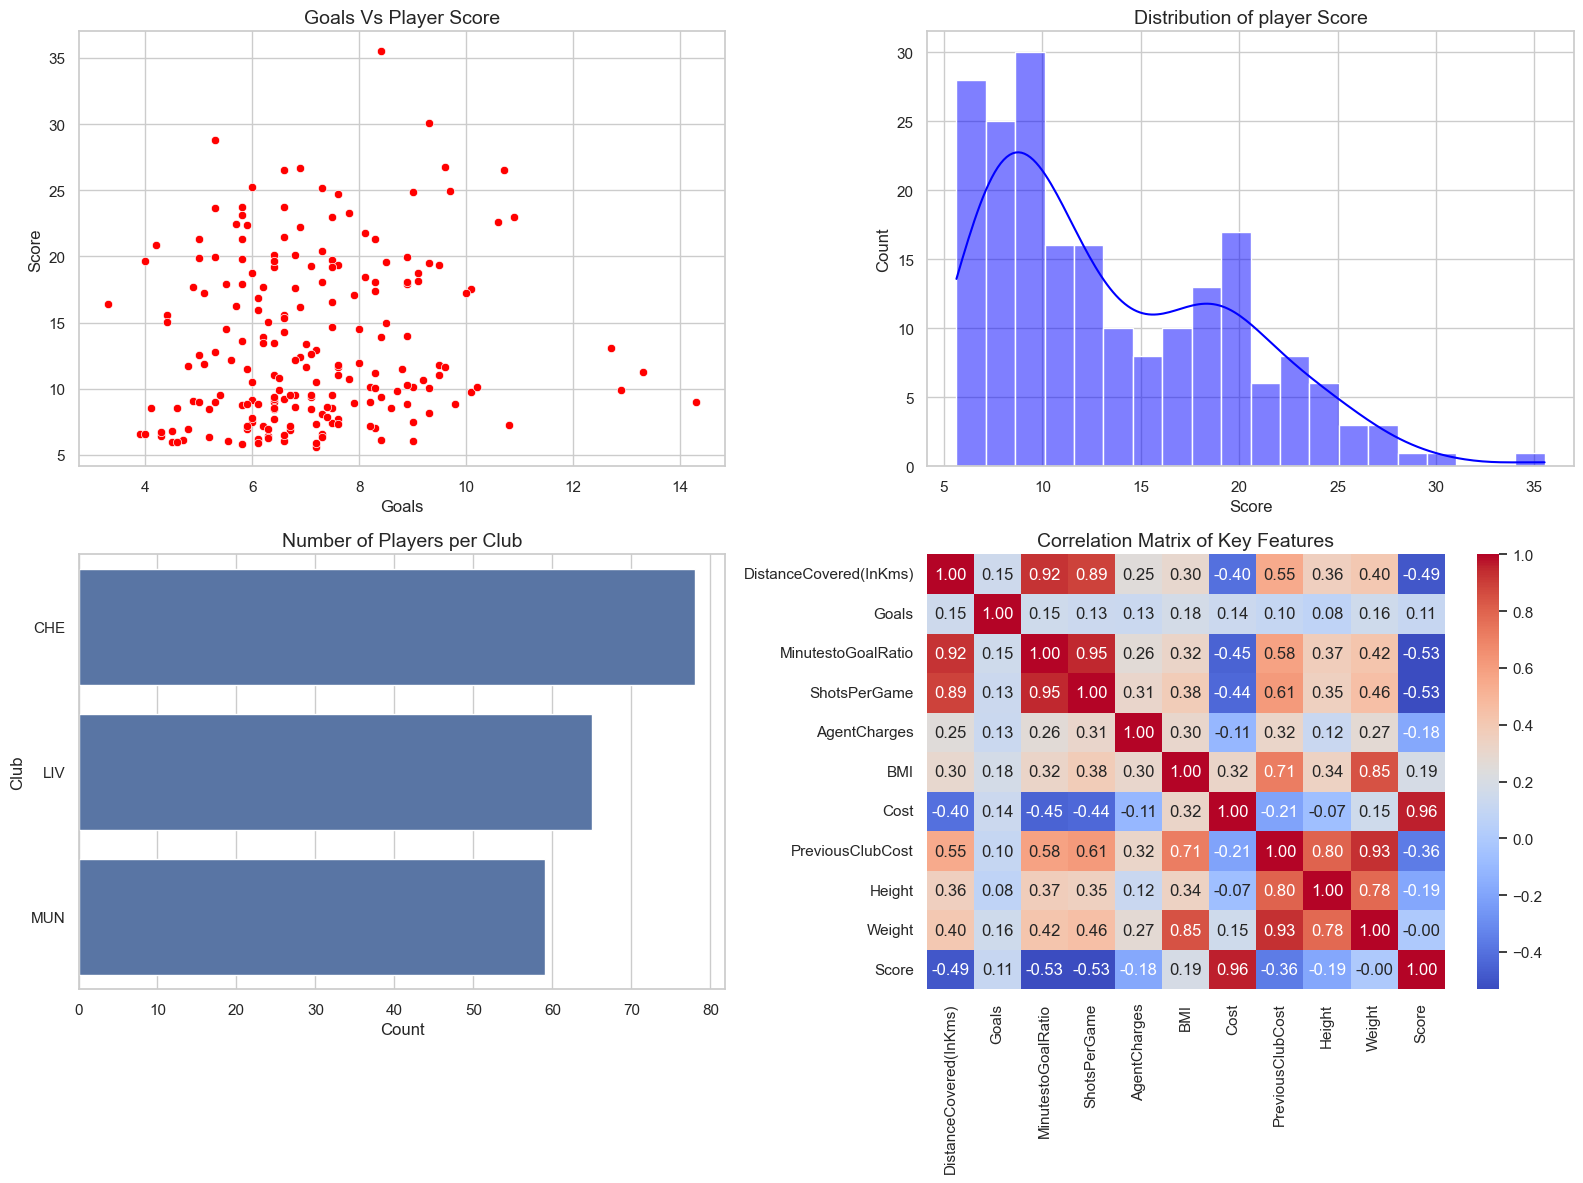

In [94]:
fig, axes = plt.subplots(2,2, figsize=(16,12))

sns.scatterplot(x='Goals', y='Score',data=df, ax=axes[0,0], color='red')
axes[0,0].set_title('Goals Vs Player Score', fontsize=14)
axes[0,0].set_xlabel('Goals',fontsize=12)
axes[0,0].set_ylabel('Score',fontsize=12)




sns.histplot(df['Score'],kde=True, color='blue', bins=20, ax=axes[0,1])
axes[0,1].set_title("Distribution of player Score", fontsize=14)
axes[0,1].set_xlabel('Score',fontsize=12)
axes[0,1].set_ylabel('Count',fontsize=12)


sns.countplot(data=df, y='Club', order=df['Club'].value_counts().index, ax=axes[1,0])
axes[1,0].set_title("Number of Players per Club", fontsize=14)
axes[1,0].set_xlabel('Count',fontsize=12)
axes[1,0].set_ylabel('Club',fontsize=12)

numeric_df = df[df.select_dtypes(include=['float64', 'int64']).columns]
df_corr = numeric_df.corr()

sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1,1])
axes[1,1].set_title("Correlation Matrix of Key Features", fontsize=14)


plt.tight_layout()
plt.show()

DistanceCovered(InKms)  Goals  MinutestoGoalRatio  ShotsPerGame  \
0                      3.96    7.5                37.5          12.3   
1                      4.41    8.3                38.2          12.7   
2                      4.14    5.0                36.4          11.6   
3                      4.11    5.3                37.3          12.6   
4                      4.45    6.8                41.5          14.0   
..                      ...    ...                 ...           ...   
196                    4.90    7.6                45.6          16.0   
197                    5.66    8.3                50.2          17.7   
198                    5.03    6.4                42.7          14.3   
199                    4.97    8.8                43.0          14.9   
200                    5.38    6.3                46.0          15.7   

     AgentCharges    BMI   Cost  PreviousClubCost  Height  Weight  ...  \
0              60  20.56  109.1             63.32   195.9    78.9  ...   
1              68  20.67  102.8             58.55   189.7    74.4  ...   
2              21  21.86  104.6             55.36   177.8    69.1  ...   
3              69  21.88  126.4             57.18   185.0    74.9  ...   
4              29  18.96   80.3             53.20   184.6    64.6  ...   
..            ...    ...    ...               ...     ...     ...  ...   
196            90  27.56   67.2             82.00   183.9    93.2  ...   
197            38  23.76   56.5             72.00   183.5    80.0  ...   
198           122  22.01   47.6             68.00   183.1    73.8  ...   
199           233  22.34   60.4             63.00   178.4    71.1  ...   
200            32  21.07   34.9             72.00   190.8    76.7  ...   

     ScoringRate  ScorePerMillion  GoalsPerMillion  CostGrowth  \
0       2.400000         0.181027         0.068744    1.722994   
1       2.356021         0.207198         0.080739    1.755764   
2       2.472527         0.190057         0.047801    1.889451   
3       2.412869         0.187184         0.041930    2.210563   
4       2.168675         0.219676         0.084682    1.509398   
..           ...              ...              ...         ...   
196     1.973684         0.175446         0.113095    0.819512   
197     1.792829         0.177876         0.146903    0.784722   
198     2.107728         0.178782         0.134454    0.700000   
199     2.093023         0.190397         0.145695    0.958730   
200     1.956522         0.179370         0.180516    0.484722   

     ScoreToAgentRatio  ExpectedScore  ValueAssessment  ClubMeanScore  \
0             0.329167      21.204056        -1.454056      20.515254   
1             0.313235      20.004597         1.295403      20.515254   
2             0.946667      20.347299        -0.467299      20.515254   
3             0.342899      24.497808        -0.837808      20.515254   
4             0.608276      15.720815         1.919185      20.515254   
..                 ...            ...              ...            ...   
196           0.131000      13.226703        -1.436703       9.415469   
197           0.264474      11.189527        -1.139527       9.415469   
198           0.069754       9.495053        -0.985053       9.415469   
199           0.049356      11.932049        -0.432049       9.415469   
200           0.195625       7.077096        -0.817096       9.415469   

     ClubEffect  ClubStrengthIndex  
0      6.988190           0.139508  
1      6.988190           0.139508  
2      6.988190           0.139508  
3      6.988190           0.139508  
4      6.988190           0.139508  
..          ...                ...  
196   -4.111596           1.000000  
197   -4.111596           1.000000  
198   -4.111596           1.000000  
199   -4.111596           1.000000  
200   -4.111596           1.000000  

[201 rows x 30 columns]

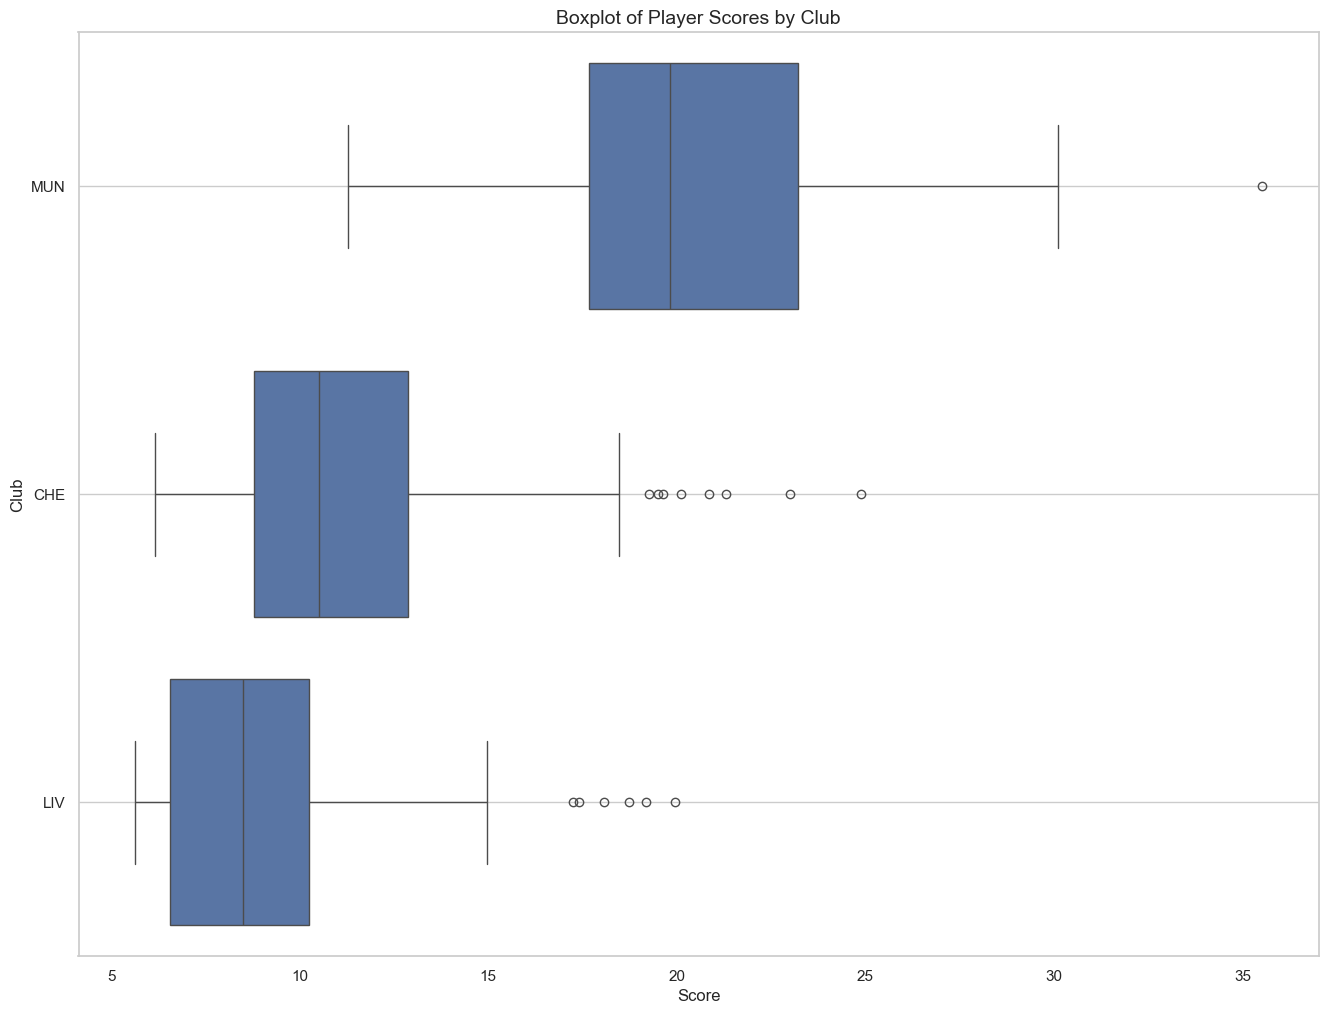

In [96]:
plt.figure(figsize=(16, 12))
sns.boxplot(x='Score', y='Club', data=df)
plt.title('Boxplot of Player Scores by Club', fontsize=14)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Club', fontsize=12)
plt.grid()
plt.show()

c:\Users\user\miniconda3\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


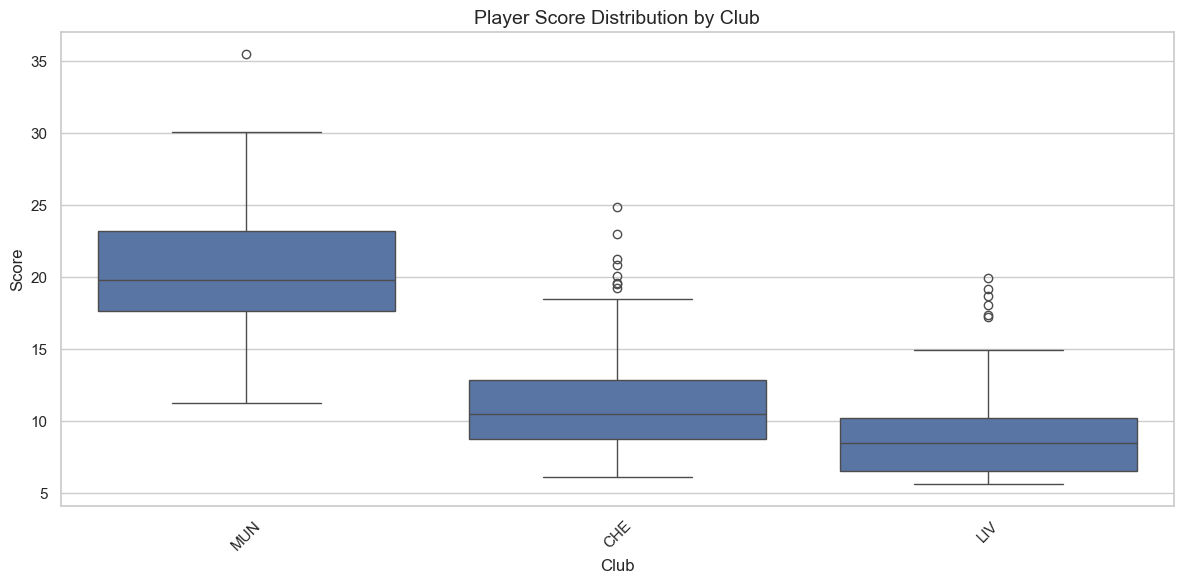

In [ ]:
# BoxPlot for Score by Club to check for differences across clubs
plt.figure(figsize=(12, 6))
sns.boxplot(x='Club', y='Score', data=df)
plt.title('Player Score Distribution by Club', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('score_by_club.png')
plt.grid()
plt.show()

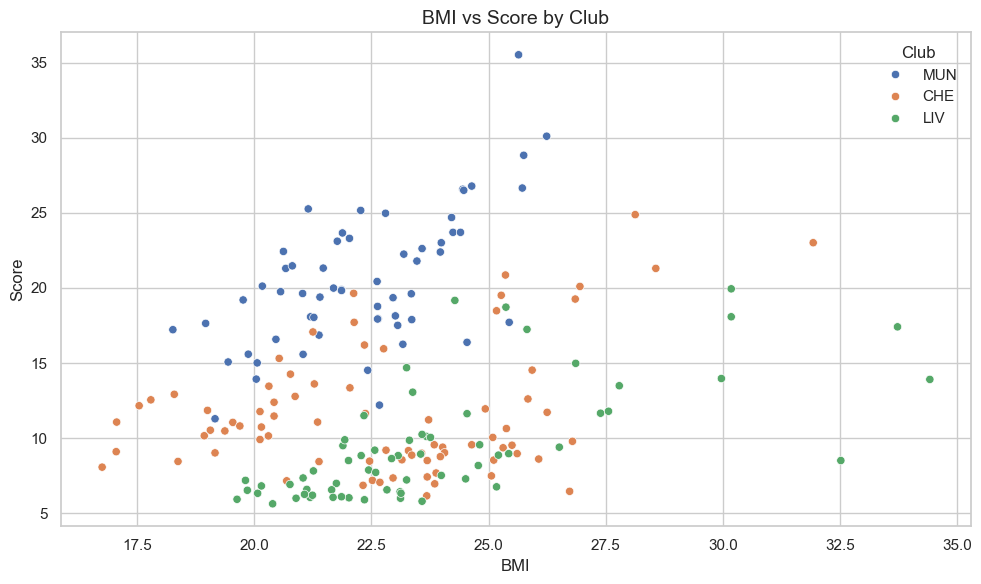

In [ ]:
# Examine the relationship between BMI and Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='Score', hue='Club', data=df)
plt.title('BMI vs Score by Club', fontsize=14)
plt.tight_layout()
plt.savefig('bmi_vs_score.png')
plt.show()

>#### **Handling Outliers**

In [ ]:
# Create a function to detect outliers using IQR method
def detect_outliers_iqr(df, column, whisker_multiplier=1.5):
    """
    Detect outliers in a specific column using the IQR method.
    Returns indices of outlier rows and lower/upper bounds.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - whisker_multiplier * IQR
    upper_bound = Q3 + whisker_multiplier * IQR
    
    outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    
    return outlier_indices, lower_bound, upper_bound

In [ ]:
# Create a function to detect outliers using Z-score method
def detect_outliers_zscore(df, column, threshold=3):
    """
    Detect outliers in a specific column using the Z-score method.
    Returns indices of outlier rows.
    """
    z_scores = stats.zscore(df[column])
    outlier_indices = df[abs(z_scores) > threshold].index
    
    return outlier_indices


c:\Users\user\miniconda3\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\user\miniconda3\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\user\miniconda3\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\user\miniconda3\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\user\miniconda3\Lib\site-packages\seabo

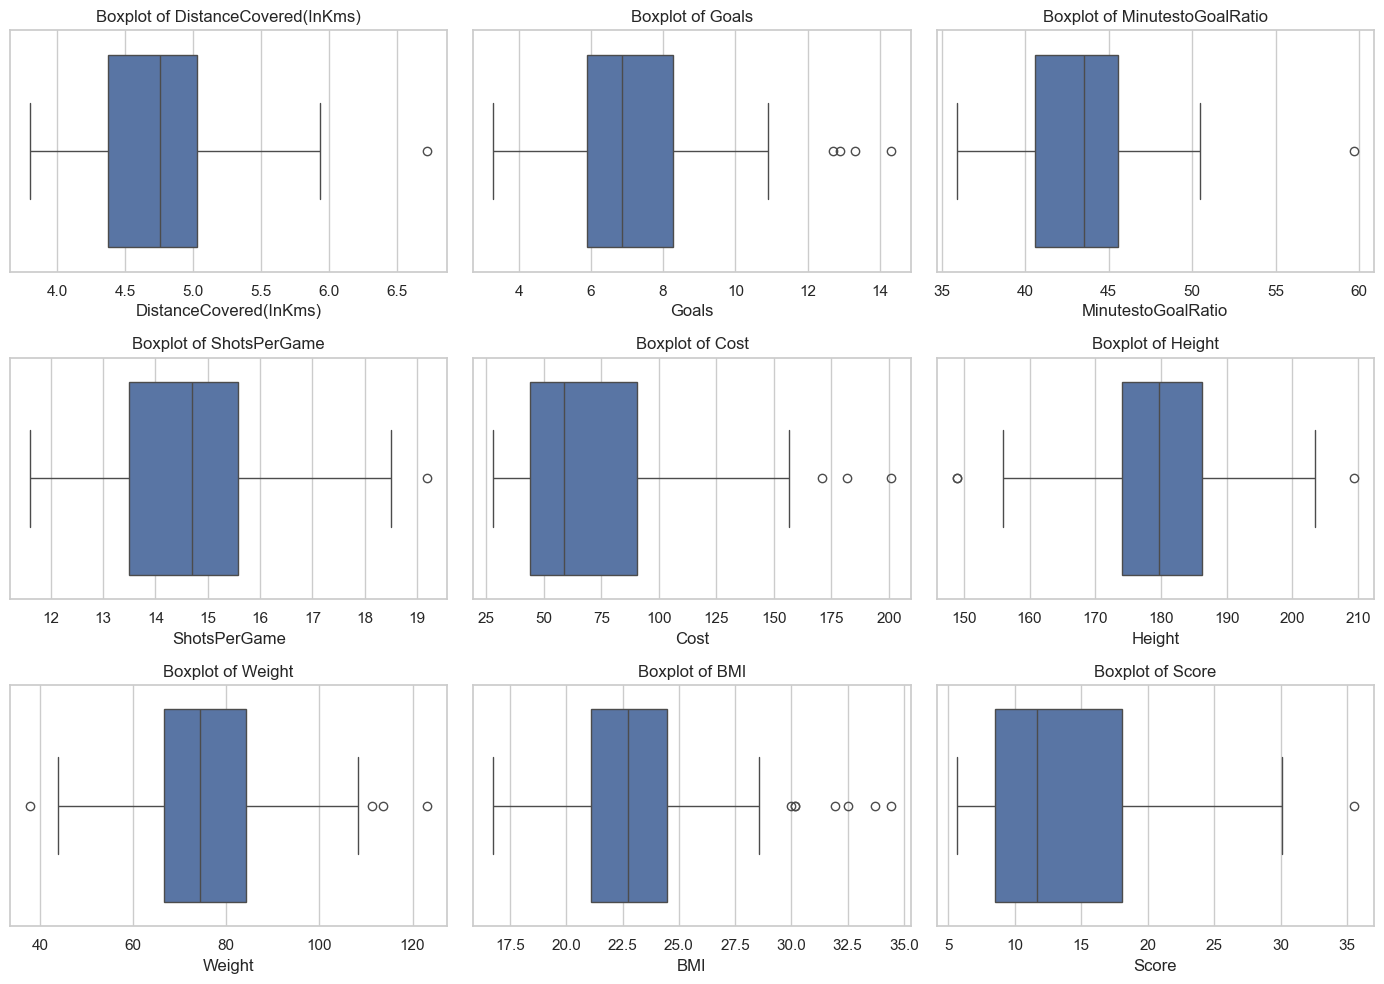

In [ ]:
# Create a DataFrame to store outlier information
outlier_summary = pd.DataFrame(columns=['Variable', 'Method', 'Outlier_Count', 'Percentage'])

# Analyze outliers in important numerical variables
numerical_vars = ['DistanceCovered(InKms)', 'Goals', 'MinutestoGoalRatio', 
                 'ShotsPerGame', 'Cost', 'Height', 'Weight', 'BMI', 'Score']

# Plot boxplots to visualize potential outliers
plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_vars):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.savefig('outlier_boxplots.png')
plt.show()


Outliers in DistanceCovered(InKms):
IQR Method: 1 outliers (0.50% of data)
Z-score Method: 1 outliers (0.50% of data)
IQR bounds: Lower = 3.39, Upper = 6.02

Outliers in Goals:
IQR Method: 4 outliers (1.98% of data)
Z-score Method: 4 outliers (1.98% of data)
IQR bounds: Lower = 2.34, Upper = 11.84

Outliers in MinutestoGoalRatio:
IQR Method: 1 outliers (0.50% of data)
Z-score Method: 1 outliers (0.50% of data)
IQR bounds: Lower = 33.14, Upper = 53.04

Outliers in ShotsPerGame:
IQR Method: 1 outliers (0.50% of data)
Z-score Method: 1 outliers (0.50% of data)
IQR bounds: Lower = 10.39, Upper = 18.69

Outliers in Cost:
IQR Method: 3 outliers (1.49% of data)
Z-score Method: 3 outliers (1.49% of data)
IQR bounds: Lower = -25.90, Upper = 160.10

Outliers in Height:
IQR Method: 3 outliers (1.49% of data)
Z-score Method: 3 outliers (1.49% of data)
IQR bounds: Lower = 155.74, Upper = 204.44

Outliers in Weight:
IQR Method: 4 outliers (1.98% of data)
Z-score Method: 1 outliers (0.50% of data)
I

C:\Users\user\AppData\Local\Temp\ipykernel_17196\1976939931.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outlier_summary = pd.concat([outlier_summary,


Variable   Method Outlier_Count  Percentage
0   DistanceCovered(InKms)      IQR             1    0.495050
1   DistanceCovered(InKms)  Z-score             1    0.495050
2                    Goals      IQR             4    1.980198
3                    Goals  Z-score             4    1.980198
4       MinutestoGoalRatio      IQR             1    0.495050
5       MinutestoGoalRatio  Z-score             1    0.495050
6             ShotsPerGame      IQR             1    0.495050
7             ShotsPerGame  Z-score             1    0.495050
8                     Cost      IQR             3    1.485149
9                     Cost  Z-score             3    1.485149
10                  Height      IQR             3    1.485149
11                  Height  Z-score             3    1.485149
12                  Weight      IQR             4    1.980198
13                  Weight  Z-score             1    0.495050
14                     BMI      IQR             7    3.465347
15                     BMI  Z-score             4    1.980198
16                   Score      IQR             1    0.495050
17                   Score  Z-score             1    0.495050

c:\Users\user\miniconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\user\miniconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


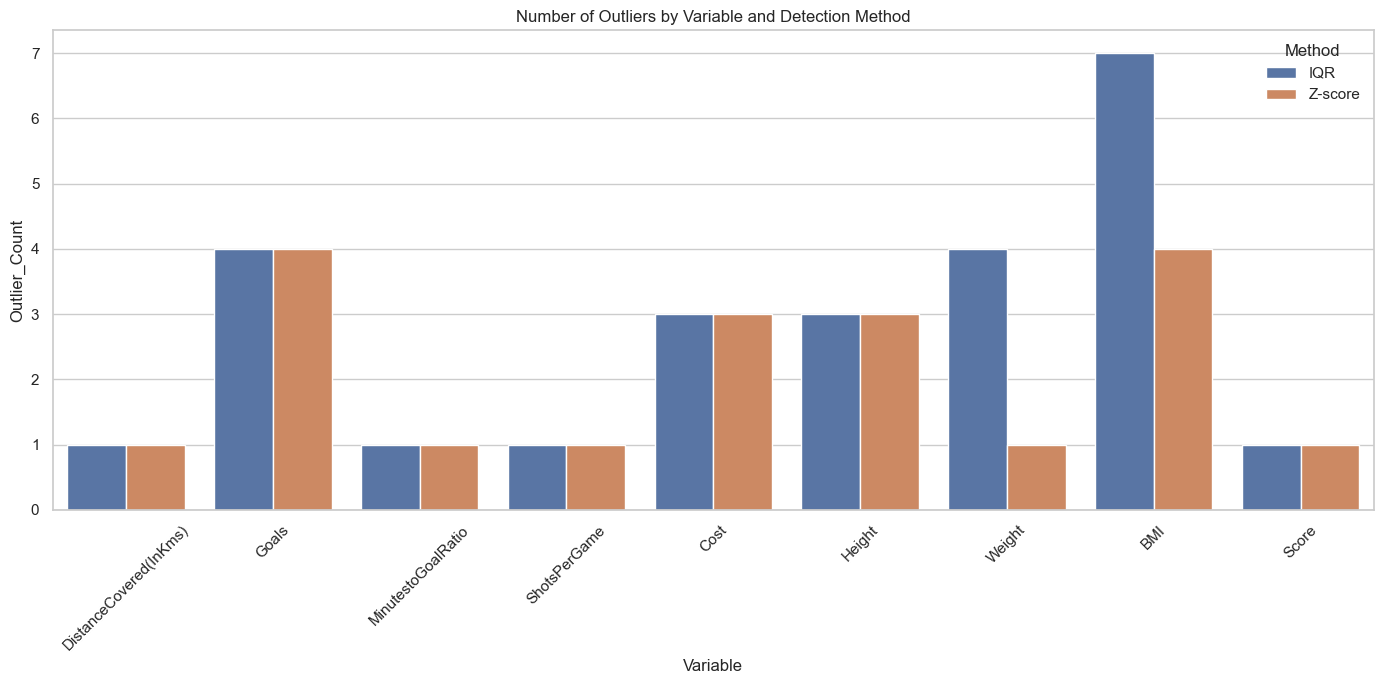

In [ ]:
# Detect and document outliers using both IQR and Z-score methods
for column in numerical_vars:
    # IQR Method
    iqr_outliers, lb, ub = detect_outliers_iqr(df, column)
    iqr_percentage = len(iqr_outliers) / len(df) * 100
    
    # Z-score Method
    zscore_outliers = detect_outliers_zscore(df, column)
    zscore_percentage = len(zscore_outliers) / len(df) * 100
    
    # Store results
    outlier_summary = pd.concat([outlier_summary, 
                               pd.DataFrame({
                                   'Variable': [column, column],
                                   'Method': ['IQR', 'Z-score'],
                                   'Outlier_Count': [len(iqr_outliers), len(zscore_outliers)],
                                   'Percentage': [iqr_percentage, zscore_percentage]
                               })], ignore_index=True)
    
    # Print outlier information
    print(f"\nOutliers in {column}:")
    print(f"IQR Method: {len(iqr_outliers)} outliers ({iqr_percentage:.2f}% of data)")
    print(f"Z-score Method: {len(zscore_outliers)} outliers ({zscore_percentage:.2f}% of data)")
    
    if len(iqr_outliers) > 0:
        print(f"IQR bounds: Lower = {lb:.2f}, Upper = {ub:.2f}")

# Display comprehensive outlier summary
print("\nOutlier Summary:")
display(outlier_summary)

# Create a visualization showing outlier percentages by variable
plt.figure(figsize=(14, 7))
sns.barplot(x='Variable', y='Outlier_Count', hue='Method', data=outlier_summary)
plt.title('Number of Outliers by Variable and Detection Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('outlier_summary.png')
plt.show()

In [ ]:
# Create a copy of the original data for comparison
df_original = df.copy()

# Define functions for different outlier treatment methods
def cap_outliers(df, column, lower_bound, upper_bound):
    """Cap outliers to the specified bounds."""
    df_capped = df.copy()
    df_capped[column] = df_capped[column].clip(lower=lower_bound, upper=upper_bound)
    return df_capped

In [ ]:
def remove_outliers(df, outlier_indices):
    """Remove rows with outliers."""
    return df.drop(outlier_indices)


In [ ]:
# Select variables for outlier treatment based on our analysis
# Let's focus on variables that might impact model performance
variables_to_treat = ['Cost', 'BMI', 'MinutestoGoalRatio']

# Create a treated dataset
df_treated = df.copy()


In [ ]:
# Apply different treatments based on variable characteristics
for column in variables_to_treat:
    # Get outliers using IQR method
    outlier_indices, lb, ub = detect_outliers_iqr(df, column)
    
    if len(outlier_indices) > 0:
        print(f"\nTreating outliers in {column}...")
        
        # For Cost, we'll cap the outliers (as removing high-value players would bias our analysis)
        if column == 'Cost':
            df_treated = cap_outliers(df_treated, column, lb, ub)
            print(f"Capped {column} outliers to range: [{lb:.2f}, {ub:.2f}]")
            
        # For BMI, which represents physical characteristics, we'll also cap rather than remove
        elif column == 'BMI':
            df_treated = cap_outliers(df_treated, column, lb, ub)
            print(f"Capped {column} outliers to range: [{lb:.2f}, {ub:.2f}]")
            
        # For MinutestoGoalRatio, we might consider removing extreme outliers if they're few
        elif column == 'MinutestoGoalRatio' and len(outlier_indices) < 0.1 * len(df):
            df_treated = remove_outliers(df_treated, outlier_indices)
            print(f"Removed {len(outlier_indices)} outlier rows based on {column}")
        else:
            df_treated = cap_outliers(df_treated, column, lb, ub)
            print(f"Capped {column} outliers to range: [{lb:.2f}, {ub:.2f}]")



Treating outliers in Cost...
Capped Cost outliers to range: [-25.90, 160.10]

Treating outliers in BMI...
Capped BMI outliers to range: [16.01, 29.54]

Treating outliers in MinutestoGoalRatio...
Removed 1 outlier rows based on MinutestoGoalRatio


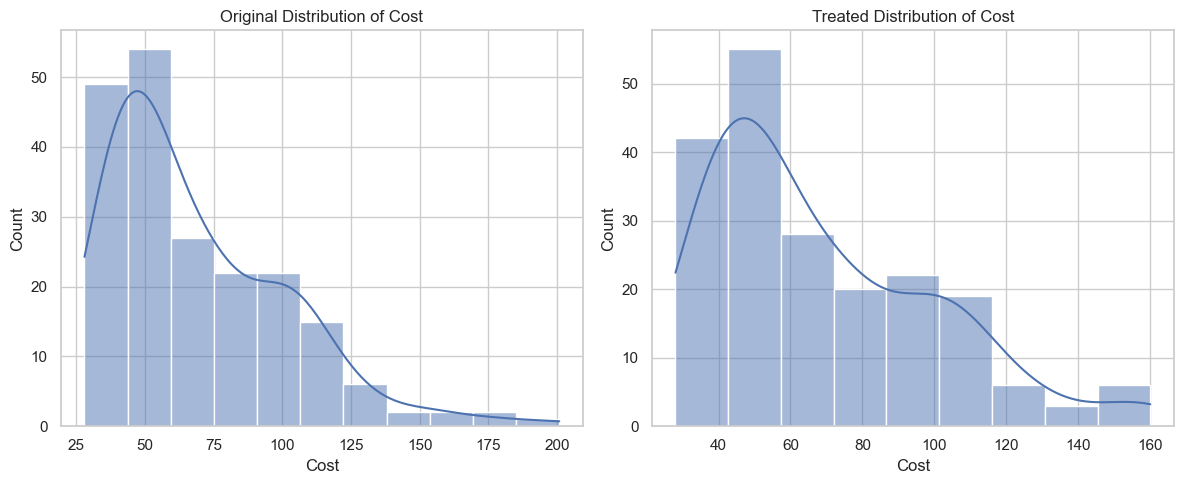

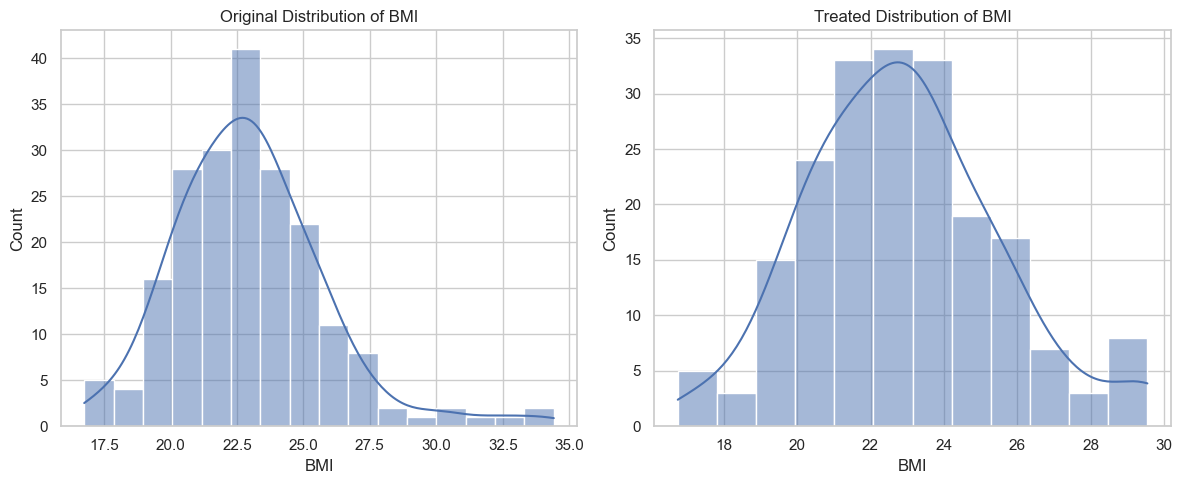

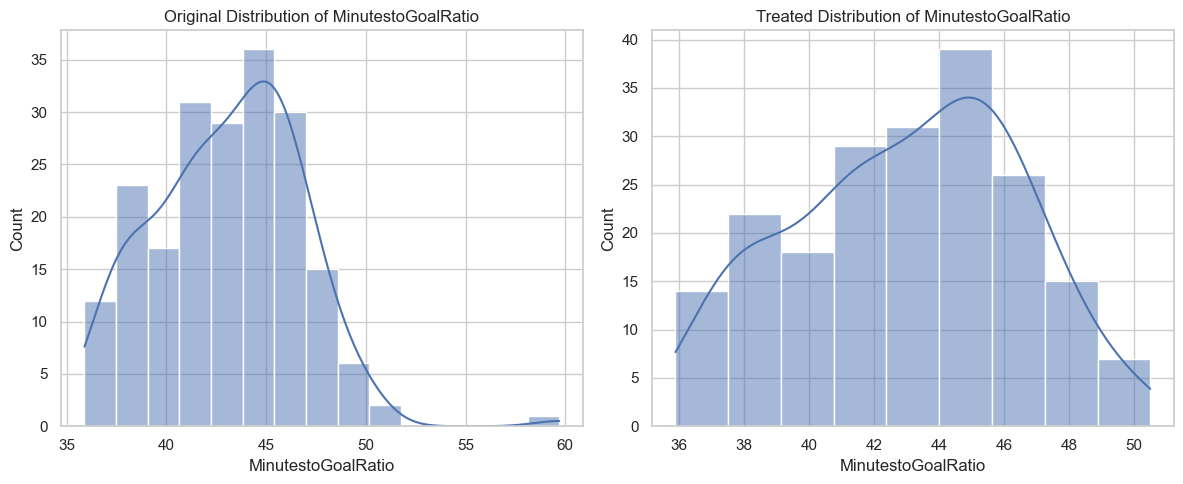

In [ ]:
# Check the effects of our outlier treatment
for column in variables_to_treat:
    plt.figure(figsize=(12, 5))
    
    # Original distribution
    plt.subplot(1, 2, 1)
    sns.histplot(df_original[column], kde=True)
    plt.title(f'Original Distribution of {column}')
    
    # Treated distribution
    plt.subplot(1, 2, 2)
    sns.histplot(df_treated[column], kde=True)
    plt.title(f'Treated Distribution of {column}')
    
    plt.tight_layout()
    plt.savefig(f'{column}_treatment_effect.png')
    plt.show()


In [ ]:
# Show basic statistics before and after treatment
for column in variables_to_treat:
    print(f"\nStatistics for {column}:")
    print("Before treatment:")
    display(df_original[column].describe())
    print("After treatment:")
    display(df_treated[column].describe())

# Update our working dataset
df = df_treated



Statistics for Cost:
Before treatment:


count    202.000000
mean      69.021782
std       32.565333
min       28.000000
25%       43.850000
50%       58.600000
75%       90.350000
max      200.800000
Name: Cost, dtype: float64

After treatment:


count    201.000000
mean      68.777612
std       31.381992
min       28.000000
25%       43.800000
50%       58.900000
75%       90.400000
max      160.100000
Name: Cost, dtype: float64


Statistics for BMI:
Before treatment:


count    202.000000
mean      22.955891
std        2.863933
min       16.750000
25%       21.082500
50%       22.720000
75%       24.465000
max       34.420000
Name: BMI, dtype: float64

After treatment:


count    201.000000
mean      22.866275
std        2.620900
min       16.750000
25%       21.070000
50%       22.680000
75%       24.450000
max       29.538750
Name: BMI, dtype: float64


Statistics for MinutestoGoalRatio:
Before treatment:


count    202.000000
mean      43.091584
std        3.662989
min       35.900000
25%       40.600000
50%       43.500000
75%       45.575000
max       59.700000
Name: MinutestoGoalRatio, dtype: float64

After treatment:


count    201.000000
mean      43.008955
std        3.478293
min       35.900000
25%       40.600000
50%       43.500000
75%       45.500000
max       50.500000
Name: MinutestoGoalRatio, dtype: float64

In [ ]:
# Analyze player name format
print("\nAnalyzing player name format:")
print(f"Example names: {df['PlayerName'].iloc[:5].tolist()}")

# Extract first and last names from the current format ("Last, First" format)
df[['LastName', 'FirstName']] = df['PlayerName'].str.split(', ', expand=True)

# Clean up the names by removing quotation marks and extra spaces
def clean_name(name):
    """Remove quotes and standardize spacing in names."""
    if isinstance(name, str):
        # Remove various quote types and extra spaces
        cleaned = name.replace('"', '').replace('"', '').replace('"', '')
        cleaned = cleaned.replace('(', '').replace(')', '')
        cleaned = ' '.join(cleaned.split())  # Standardize spacing
        return cleaned
    return name


Analyzing player name format:
Example names: ['Braund, Mr. Owen Harris', 'Allen, Mr. William Henry', 'Moran, Mr. James', 'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard']


In [ ]:
# Apply cleaning to first and last names
df['FirstName'] = df['FirstName'].apply(clean_name)
df['LastName'] = df['LastName'].apply(clean_name)

# Create a standardized full name column
df['FullName'] = df['FirstName'] + ' ' + df['LastName']

# Check for duplicate player names after standardization
duplicate_names = df['FullName'].duplicated().sum()
print(f"Number of duplicate standardized names: {duplicate_names}")

if duplicate_names > 0:
    print("Duplicate players found:")
    display(df[df['FullName'].duplicated(keep=False)].sort_values('FullName')[['FullName', 'Club']])
    
    # Create unique player identifiers
    df['PlayerID'] = df['FullName'] + ' (' + df['Club'] + ')'
else:
    print("All player names are unique after standardization.")
    df['PlayerID'] = df['FullName']

# Display a sample of the processed names
print("\nSample of processed player names:")
display(df[['PlayerName', 'FirstName', 'LastName', 'FullName', 'PlayerID']].head())

# Summary of name cleaning
print("\nName cleaning summary:")
print(f"Original names checked: {len(df)}")
print(f"Unique standardized names: {df['FullName'].nunique()}")
print(f"Unique player identifiers created: {df['PlayerID'].nunique()}")

Number of duplicate standardized names: 4
Duplicate players found:


FullName Club
111      Master. Arthur Rice  CHE
184      Master. Arthur Rice  LIV
178        Master. Eric Rice  LIV
185        Master. Eric Rice  LIV
7        Master. Eugene Rice  MUN
186      Master. Eugene Rice  LIV
22   Mr. William John Rogers  MUN
191  Mr. William John Rogers  LIV


Sample of processed player names:


PlayerName              FirstName  LastName  \
0         Braund, Mr. Owen Harris        Mr. Owen Harris    Braund   
1        Allen, Mr. William Henry      Mr. William Henry     Allen   
2                Moran, Mr. James              Mr. James     Moran   
3         McCarthy, Mr. Timothy J          Mr. Timothy J  McCarthy   
4  Palsson, Master. Gosta Leonard  Master. Gosta Leonard   Palsson   

                        FullName                             PlayerID  
0         Mr. Owen Harris Braund         Mr. Owen Harris Braund (MUN)  
1        Mr. William Henry Allen        Mr. William Henry Allen (MUN)  
2                Mr. James Moran                Mr. James Moran (MUN)  
3         Mr. Timothy J McCarthy         Mr. Timothy J McCarthy (MUN)  
4  Master. Gosta Leonard Palsson  Master. Gosta Leonard Palsson (MUN)


Name cleaning summary:
Original names checked: 201
Unique standardized names: 197
Unique player identifiers created: 200



FINAL DATA CLEANING SUMMARY
--------------------------
Original dataset dimensions: (202, 13)
Cleaned dataset dimensions: (201, 17)
Rows removed: 1 (0.50% of original data)
New columns added: 4
Columns with outliers treated: 3

Data types after cleaning:


float64    10
object      6
int64       1
Name: count, dtype: int64


Verifying data integrity after cleaning:
Total missing values after cleaning: 0

Cleaned dataset saved as 'EPL_Soccer_MLR_LR_cleaned.csv'


c:\Users\user\miniconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\user\miniconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\user\miniconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\user\miniconda3\Lib\site-packages\seaborn\_base.py:949: FutureWa

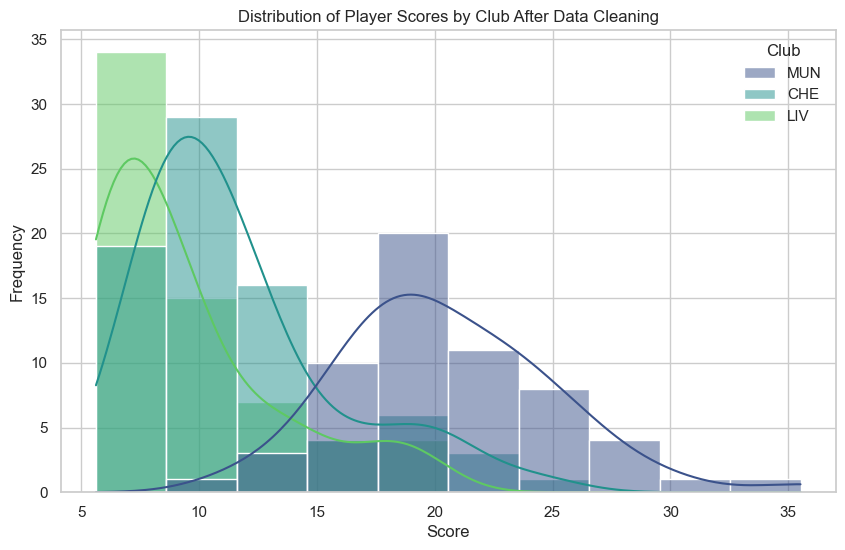

In [ ]:
# Create a summary of all cleaning operations performed
print("\nFINAL DATA CLEANING SUMMARY")
print("--------------------------")
print(f"Original dataset dimensions: {df_original.shape}")
print(f"Cleaned dataset dimensions: {df.shape}")

# Calculate statistics on changes made
rows_removed = len(df_original) - len(df)
columns_added = len(df.columns) - len(df_original.columns)

print(f"Rows removed: {rows_removed} ({rows_removed/len(df_original)*100:.2f}% of original data)")
print(f"New columns added: {columns_added}")
print(f"Columns with outliers treated: {len(variables_to_treat)}")

# Check data types after cleaning
print("\nData types after cleaning:")
display(df.dtypes.value_counts())

# Verify data integrity after cleaning
print("\nVerifying data integrity after cleaning:")
missing_after = df.isnull().sum().sum()
print(f"Total missing values after cleaning: {missing_after}")

# Save the cleaned dataset
df.to_csv('EPL_Soccer_MLR_LR_cleaned.csv', index=False)
print("\nCleaned dataset saved as 'EPL_Soccer_MLR_LR_cleaned.csv'")

# Generate a final visualization showing the distribution of our target variable
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Score', hue='Club', kde=True, palette='viridis')
plt.title('Distribution of Player Scores by Club After Data Cleaning')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.savefig('cleaned_score_distribution.png')
plt.show()

>#### **Feature Engineering**


Examining correlations to identify potential interaction candidates:


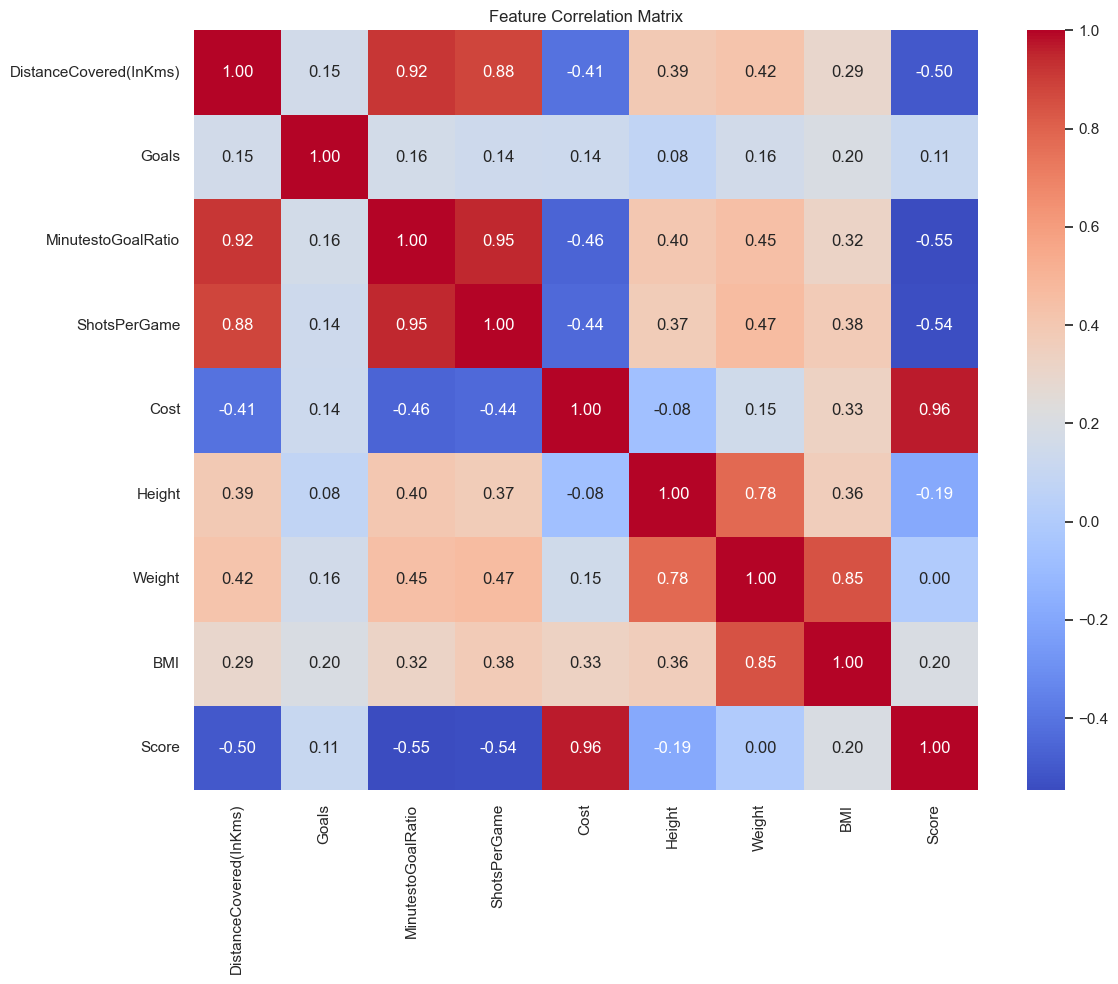

Created interaction term: Goals_x_ShotsPerGame
  Range: 41.25 to 214.50, Mean: 103.71
Created interaction term: DistanceCovered(InKms)_x_Goals
  Range: 13.04 to 67.18, Mean: 33.59
Created interaction term: Weight_x_DistanceCovered(InKms)
  Range: 154.60 to 675.14, Mean: 355.73
Created interaction term: BMI_x_DistanceCovered(InKms)
  Range: 68.84 to 161.87, Mean: 108.01
Created interaction term: Cost_x_Goals
  Range: 130.29 to 1675.62, Mean: 496.56
Created interaction term: ShotsPerGame_x_MinutestoGoalRatio
  Range: 422.24 to 934.25, Mean: 629.85


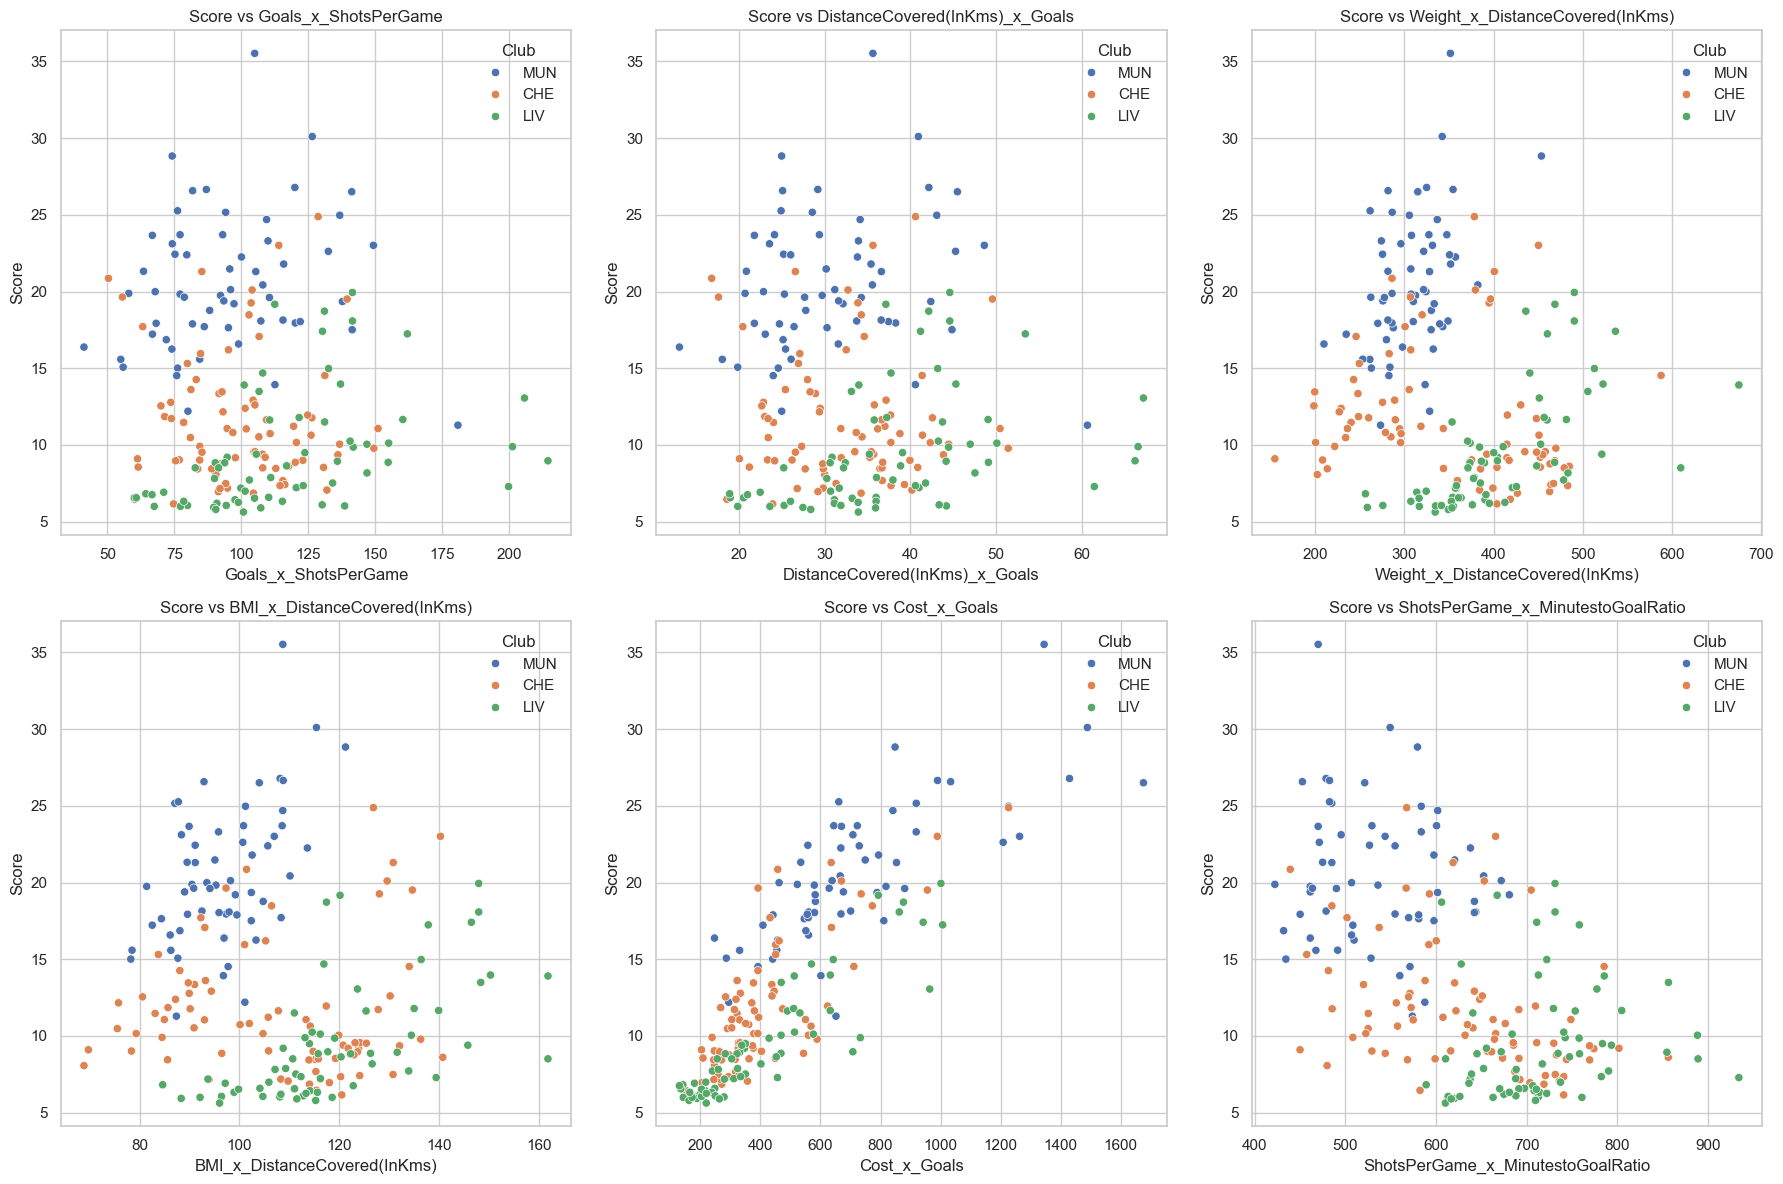

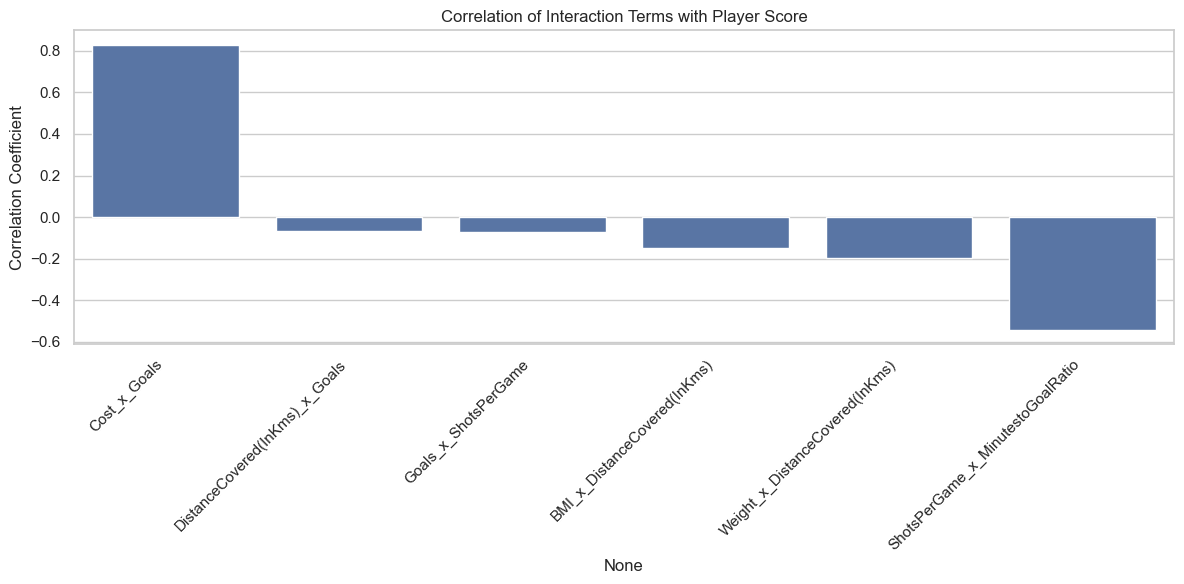

In [ ]:
# Identify potential features for interactions based on domain knowledge
print("\nExamining correlations to identify potential interaction candidates:")
numerical_cols = ['DistanceCovered(InKms)', 'Goals', 'MinutestoGoalRatio', 
                 'ShotsPerGame', 'Cost', 'Height', 'Weight', 'BMI', 'Score']

# Generate correlation heatmap to identify relationships
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('feature_correlation_matrix.png')
plt.show()

# Create a function to generate interaction features
def create_interaction_terms(df, feature_pairs):
    """
    Create interaction terms between pairs of features.
    
    Parameters:
    df : pandas DataFrame - The dataset
    feature_pairs : list of tuples - Each tuple contains two feature names to interact
    
    Returns:
    df_with_interactions : pandas DataFrame - Dataset with added interaction features
    """
    df_interactions = df.copy()
    
    for feat1, feat2 in feature_pairs:
        interaction_name = f"{feat1}_x_{feat2}"
        df_interactions[interaction_name] = df[feat1] * df[feat2]
        
        # Log the range of values for the new interaction term
        min_val = df_interactions[interaction_name].min()
        max_val = df_interactions[interaction_name].max()
        mean_val = df_interactions[interaction_name].mean()
        print(f"Created interaction term: {interaction_name}")
        print(f"  Range: {min_val:.2f} to {max_val:.2f}, Mean: {mean_val:.2f}")
    
    return df_interactions

# Define relevant feature pairs for interactions based on domain knowledge and correlations
interaction_pairs = [
    ('Goals', 'ShotsPerGame'),          # Goal-shot interaction reflects scoring efficiency
    ('DistanceCovered(InKms)', 'Goals'), # Relates movement to scoring output
    ('Weight', 'DistanceCovered(InKms)'), # Physical attribute impact on stamina/movement
    ('BMI', 'DistanceCovered(InKms)'),    # Body composition effect on movement
    ('Cost', 'Goals'),                    # Value-performance relationship
    ('ShotsPerGame', 'MinutestoGoalRatio') # Shooting frequency vs time needed to score
]

# Create the interaction terms
df = create_interaction_terms(df, interaction_pairs)

# Visualize key interaction terms against the target variable
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, (feat1, feat2) in enumerate(interaction_pairs):
    interaction_name = f"{feat1}_x_{feat2}"
    sns.scatterplot(x=interaction_name, y='Score', hue='Club', data=df, ax=axes[i])
    axes[i].set_title(f'Score vs {interaction_name}')
    axes[i].set_xlabel(interaction_name)
    axes[i].set_ylabel('Score')

plt.tight_layout()
plt.savefig('interaction_terms_vs_score.png')
plt.show()

# Calculate correlation between interaction terms and Score
interaction_cols = [f"{feat1}_x_{feat2}" for feat1, feat2 in interaction_pairs]
interaction_corr = df[interaction_cols + ['Score']].corr()['Score'].sort_values(ascending=False).drop('Score')

plt.figure(figsize=(12, 6))
sns.barplot(x=interaction_corr.index, y=interaction_corr.values)
plt.title('Correlation of Interaction Terms with Player Score')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.savefig('interaction_terms_correlation.png')
plt.show()



Developing player efficiency metrics:
GoalToShotRatio - Range: 0.25 to 0.98
GoalsPerDistance - Range: 0.78 to 3.09
ShotsPerDistance - Range: 2.72 to 3.46
ScoringRate - Range: 1.78 to 2.51


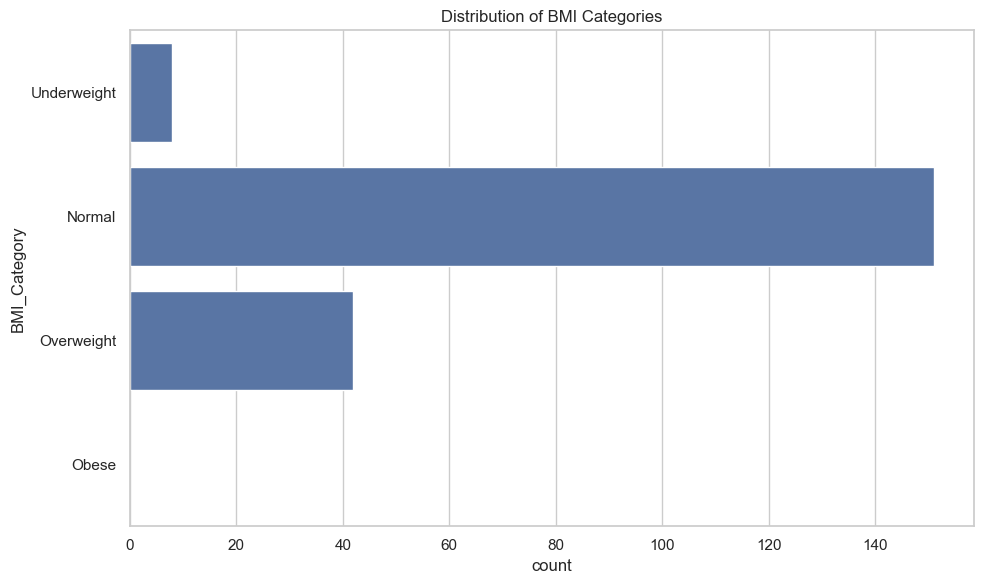

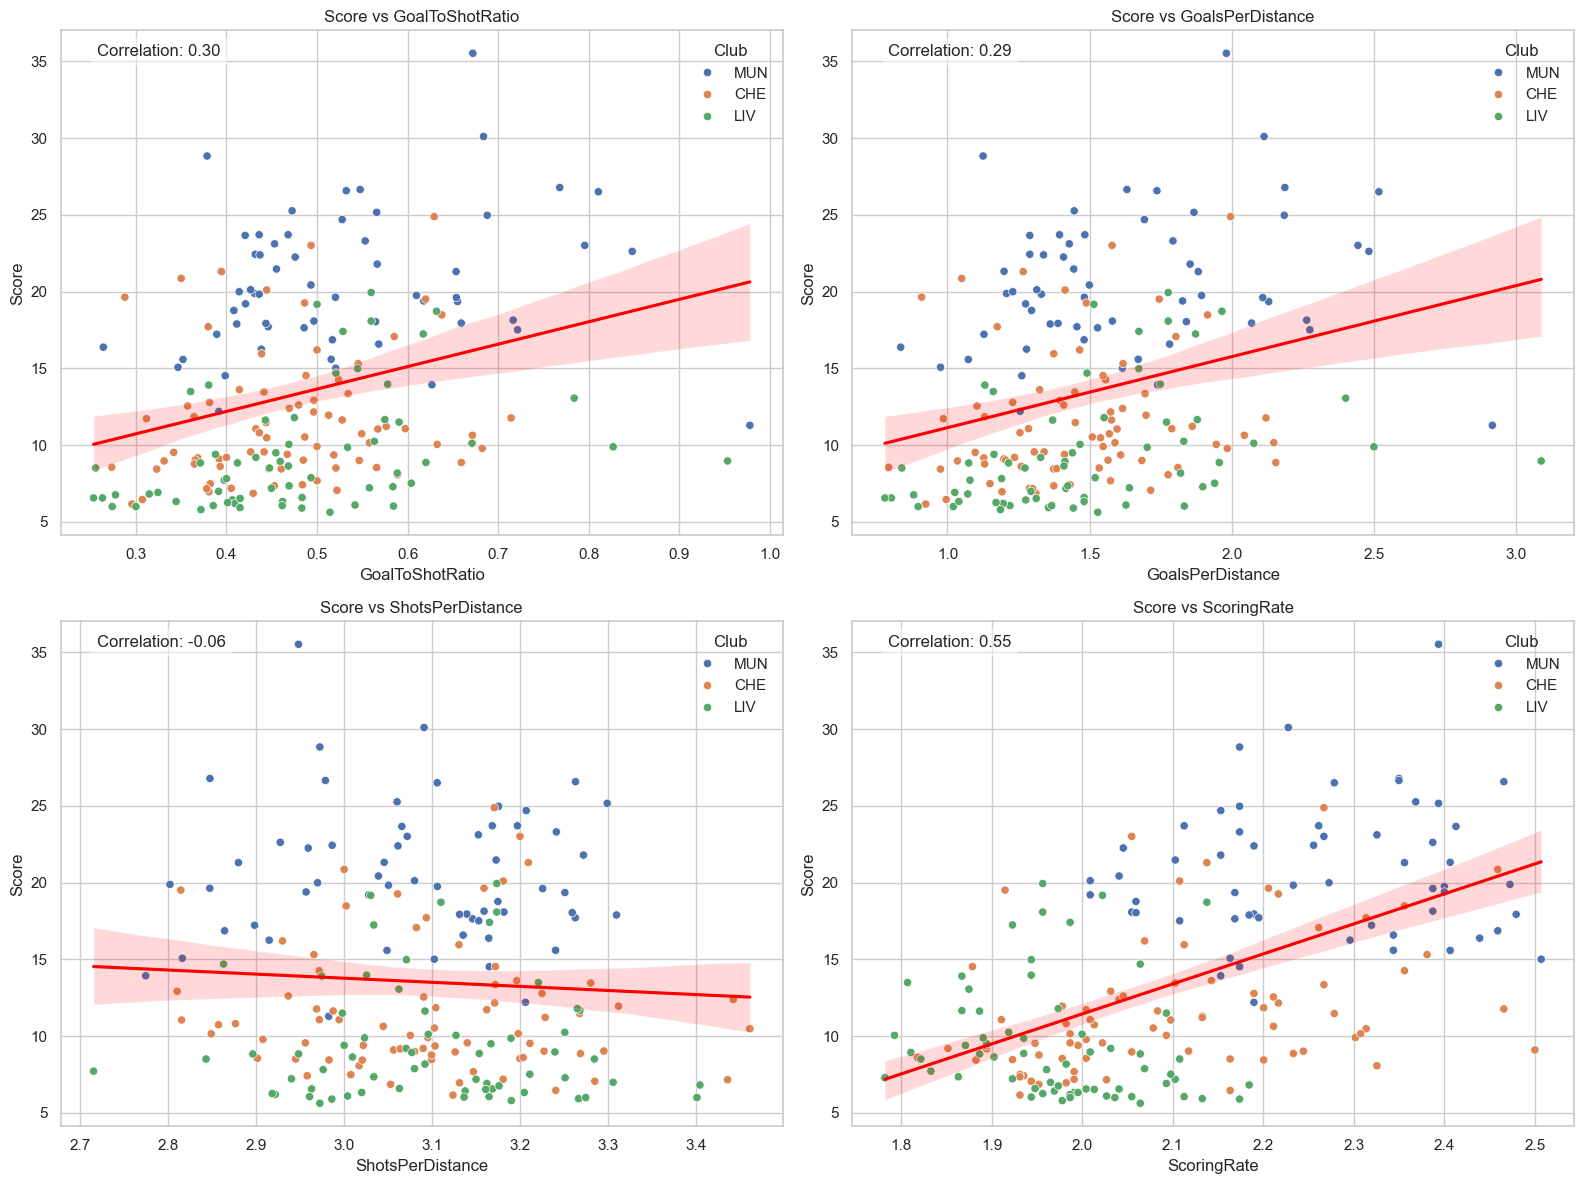

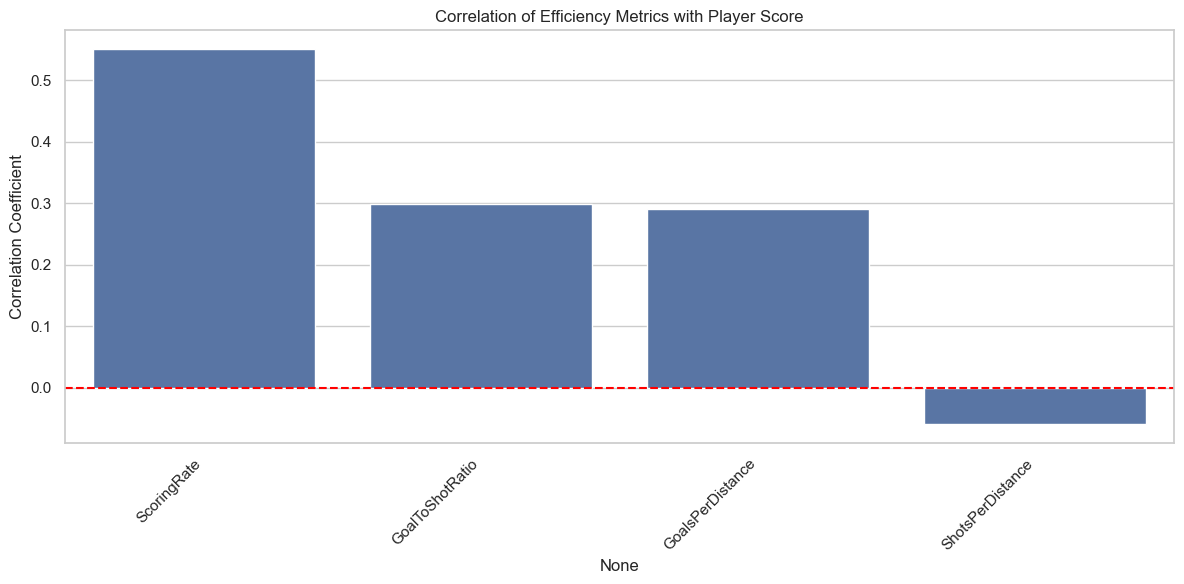

In [ ]:
# Create efficiency metrics that normalize performance metrics
print("\nDeveloping player efficiency metrics:")

# Goal-to-Shot ratio (scoring efficiency)
df['GoalToShotRatio'] = df['Goals'] / df['ShotsPerGame']
print(f"GoalToShotRatio - Range: {df['GoalToShotRatio'].min():.2f} to {df['GoalToShotRatio'].max():.2f}")

# Distance efficiency (goals per distance covered)
df['GoalsPerDistance'] = df['Goals'] / df['DistanceCovered(InKms)']
print(f"GoalsPerDistance - Range: {df['GoalsPerDistance'].min():.2f} to {df['GoalsPerDistance'].max():.2f}")

# Shot efficiency (shots per distance)
df['ShotsPerDistance'] = df['ShotsPerGame'] / df['DistanceCovered(InKms)']
print(f"ShotsPerDistance - Range: {df['ShotsPerDistance'].min():.2f} to {df['ShotsPerDistance'].max():.2f}")

# Scoring rate (inverse of MinutestoGoalRatio - higher is better)
df['ScoringRate'] = 90 / df['MinutestoGoalRatio']  # Goals per 90 minutes
print(f"ScoringRate - Range: {df['ScoringRate'].min():.2f} to {df['ScoringRate'].max():.2f}")

# Normalized BMI category (creating a standardized categorization based on BMI)
# Using standard BMI categories: Underweight (<18.5), Normal (18.5-24.9), Overweight (25-29.9), Obese (≥30)
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

df['BMI_Category'] = df['BMI'].apply(categorize_bmi)

# Display distribution of BMI categories
plt.figure(figsize=(10, 6))
sns.countplot(y='BMI_Category', data=df, order=['Underweight', 'Normal', 'Overweight', 'Obese'])
plt.title('Distribution of BMI Categories')
plt.tight_layout()
plt.savefig('bmi_categories.png')
plt.show()

# Visualize the relationship between efficiency metrics and player Score
efficiency_metrics = ['GoalToShotRatio', 'GoalsPerDistance', 'ShotsPerDistance', 'ScoringRate']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, metric in enumerate(efficiency_metrics):
    sns.scatterplot(x=metric, y='Score', hue='Club', data=df, ax=axes[i])
    
    # Add regression line
    sns.regplot(x=metric, y='Score', data=df, scatter=False, ax=axes[i], color='red')
    
    # Calculate and display correlation
    corr = df[[metric, 'Score']].corr().iloc[0, 1]
    axes[i].text(0.05, 0.95, f'Correlation: {corr:.2f}', transform=axes[i].transAxes, 
                fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    
    axes[i].set_title(f'Score vs {metric}')
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel('Score')

plt.tight_layout()
plt.savefig('efficiency_metrics_vs_score.png')
plt.show()

# Calculate and display correlation of efficiency metrics with Score
efficiency_corr = df[efficiency_metrics + ['Score']].corr()['Score'].sort_values(ascending=False).drop('Score')

plt.figure(figsize=(12, 6))
sns.barplot(x=efficiency_corr.index, y=efficiency_corr.values)
plt.title('Correlation of Efficiency Metrics with Player Score')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Correlation Coefficient')
plt.axhline(y=0, color='red', linestyle='--')
plt.tight_layout()
plt.savefig('efficiency_metrics_correlation.png')
plt.show()



Developing performance-to-cost ratios:
ScorePerMillion - Range: 0.1412 to 0.2693
GoalsPerMillion - Range: 0.0331 to 0.2903
CostGrowth - Range: 0.39 to 2.99
ScoreToAgentRatio - Range: 0.0286 to 1.5715


c:\Users\user\miniconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\user\miniconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\user\miniconda3\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


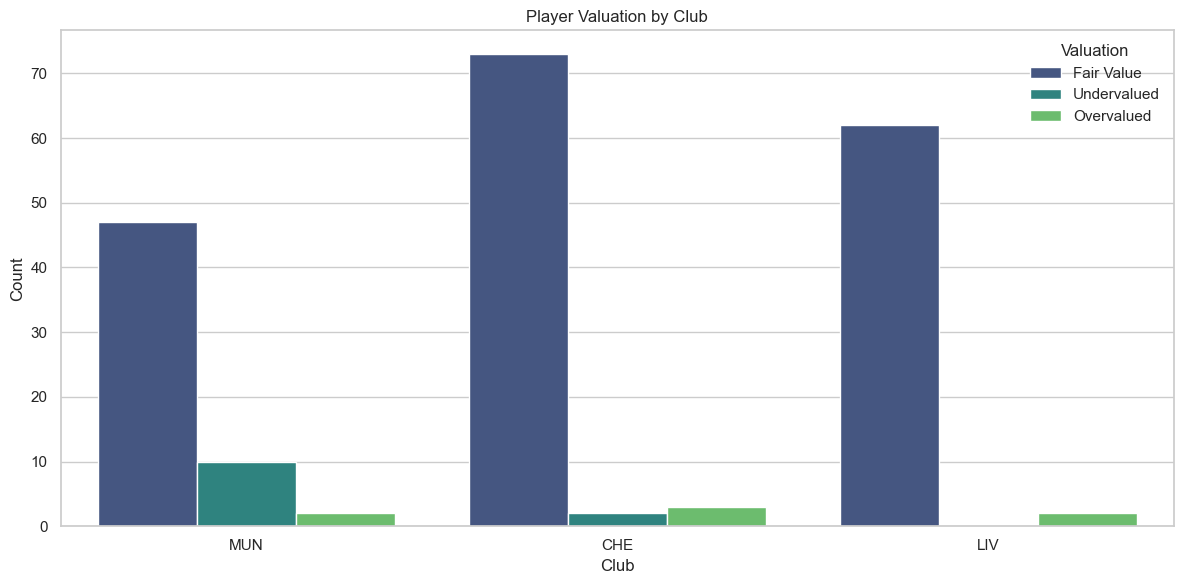

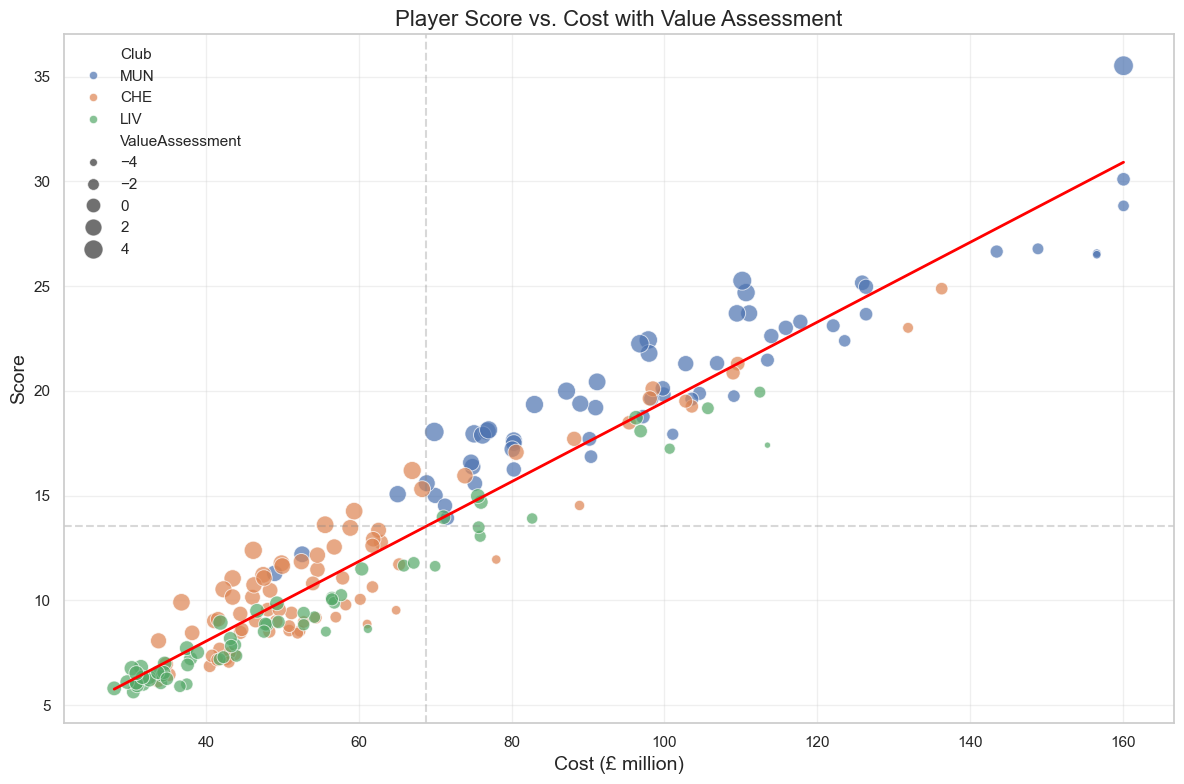

c:\Users\user\miniconda3\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\user\miniconda3\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\user\miniconda3\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\user\miniconda3\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


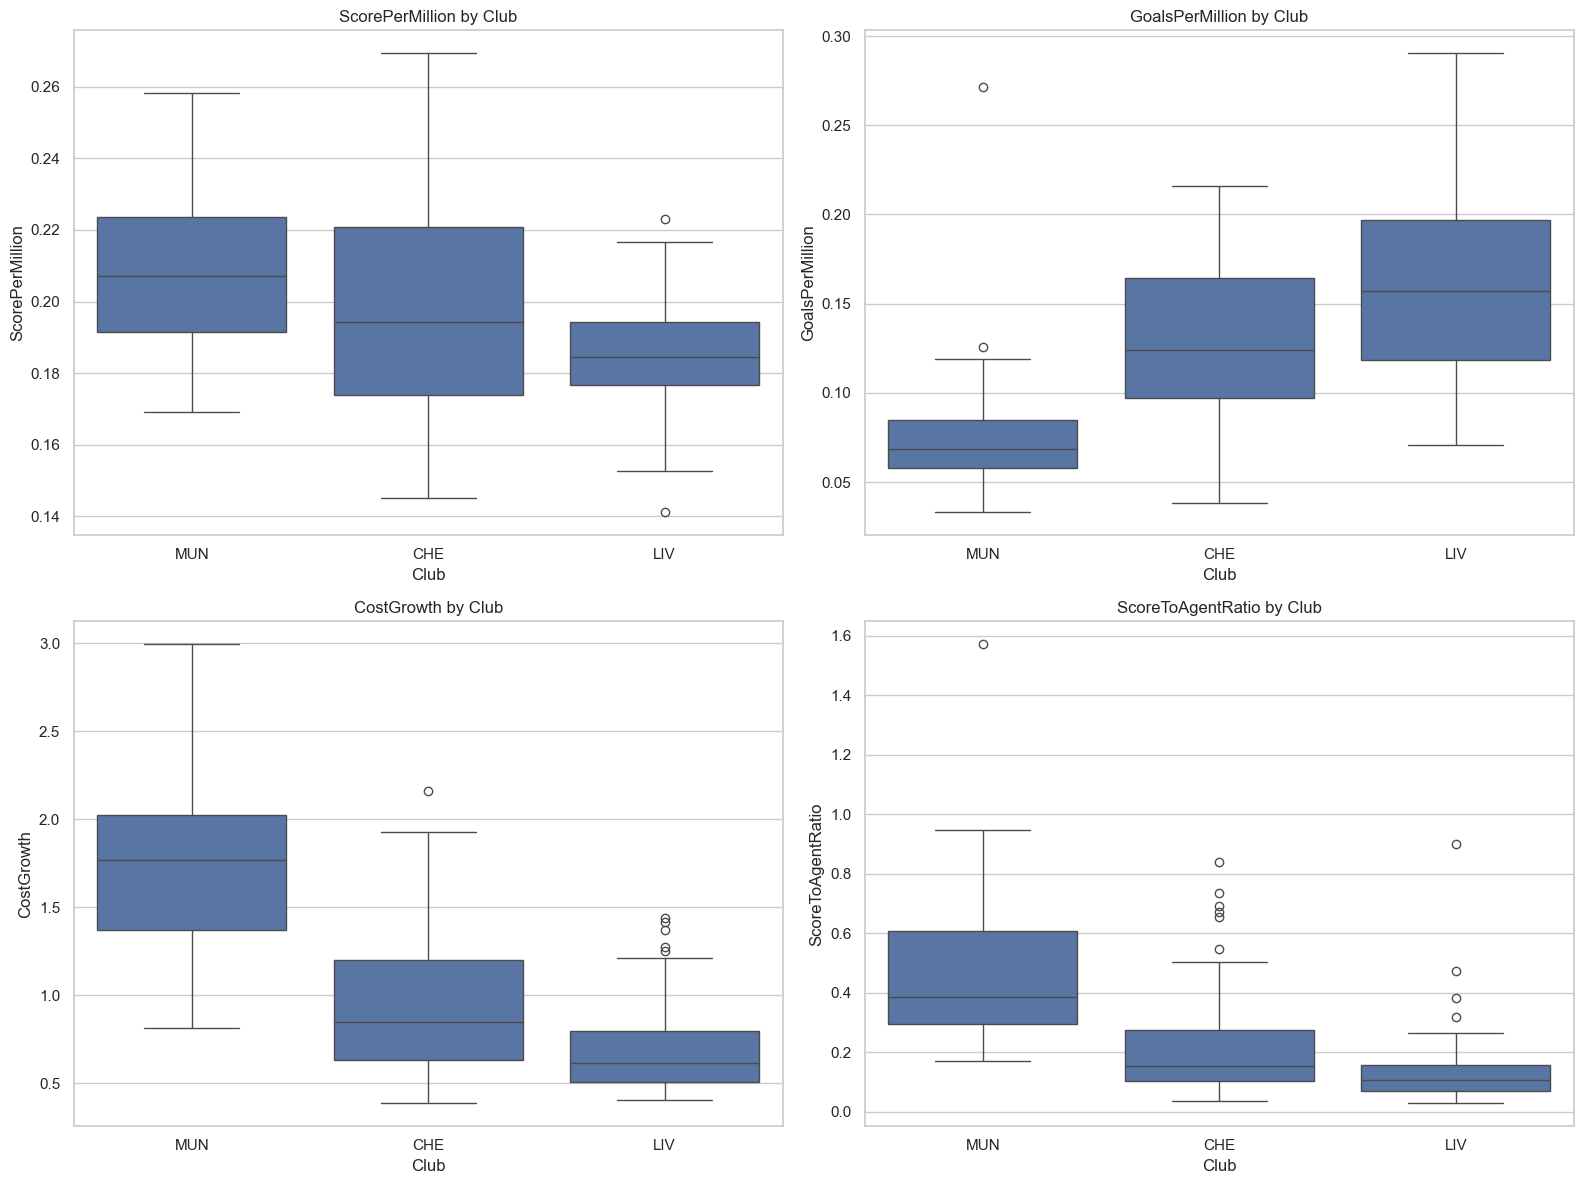

In [ ]:
# Create metrics for value assessment
print("\nDeveloping performance-to-cost ratios:")

# Score per million (performance return on investment)
df['ScorePerMillion'] = df['Score'] / df['Cost']
print(f"ScorePerMillion - Range: {df['ScorePerMillion'].min():.4f} to {df['ScorePerMillion'].max():.4f}")

# Goals per million (goal return on investment)
df['GoalsPerMillion'] = df['Goals'] / df['Cost']
print(f"GoalsPerMillion - Range: {df['GoalsPerMillion'].min():.4f} to {df['GoalsPerMillion'].max():.4f}")

# Value growth (current cost vs previous cost ratio)
df['CostGrowth'] = df['Cost'] / df['PreviousClubCost']
print(f"CostGrowth - Range: {df['CostGrowth'].min():.2f} to {df['CostGrowth'].max():.2f}")

# Agent efficiency (score relative to agent charges)
df['ScoreToAgentRatio'] = df['Score'] / df['AgentCharges']
print(f"ScoreToAgentRatio - Range: {df['ScoreToAgentRatio'].min():.4f} to {df['ScoreToAgentRatio'].max():.4f}")

# Identify undervalued and overvalued players
# Calculate the expected Score based on Cost using regression
from sklearn.linear_model import LinearRegression

X_cost = df[['Cost']].values
y_score = df['Score'].values

cost_model = LinearRegression()
cost_model.fit(X_cost, y_score)

df['ExpectedScore'] = cost_model.predict(X_cost)
df['ValueAssessment'] = df['Score'] - df['ExpectedScore']

# Categorize players as undervalued, fairly valued, or overvalued
def categorize_value(value_diff):
    if value_diff > 3:  # More than 3 points above expected
        return "Undervalued"
    elif value_diff < -3:  # More than 3 points below expected
        return "Overvalued"
    else:
        return "Fair Value"

df['ValueCategory'] = df['ValueAssessment'].apply(categorize_value)

# Display value distribution by club
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Club', hue='ValueCategory', palette='viridis')
plt.title('Player Valuation by Club')
plt.xlabel('Club')
plt.ylabel('Count')
plt.legend(title='Valuation')
plt.tight_layout()
plt.savefig('value_assessment_by_club.png')
plt.show()

# Visualize the relationship between cost and score with prediction line
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Cost', y='Score', hue='Club', size='ValueAssessment', 
               sizes=(20, 200), alpha=0.7, data=df)

# Add regression line
x_range = np.linspace(df['Cost'].min(), df['Cost'].max(), 100)
y_pred = cost_model.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_pred, color='red', linewidth=2)

plt.title('Player Score vs. Cost with Value Assessment', fontsize=16)
plt.xlabel('Cost (£ million)', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.axhline(y=df['Score'].mean(), color='grey', linestyle='--', alpha=0.3)
plt.axvline(x=df['Cost'].mean(), color='grey', linestyle='--', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('cost_vs_score_value_assessment.png')
plt.show()

# Create a plot for each performance-cost ratio
ratio_metrics = ['ScorePerMillion', 'GoalsPerMillion', 'CostGrowth', 'ScoreToAgentRatio']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, metric in enumerate(ratio_metrics):
    sns.boxplot(x='Club', y=metric, data=df, ax=axes[i])
    axes[i].set_title(f'{metric} by Club')
    axes[i].set_xlabel('Club')
    axes[i].set_ylabel(metric)

plt.tight_layout()
plt.savefig('performance_cost_ratio_by_club.png')
plt.show()



Unique clubs in the dataset:
['MUN' 'CHE' 'LIV']

Player distribution across clubs:
Club
CHE    78
LIV    64
MUN    59
Name: count, dtype: int64


c:\Users\user\miniconda3\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


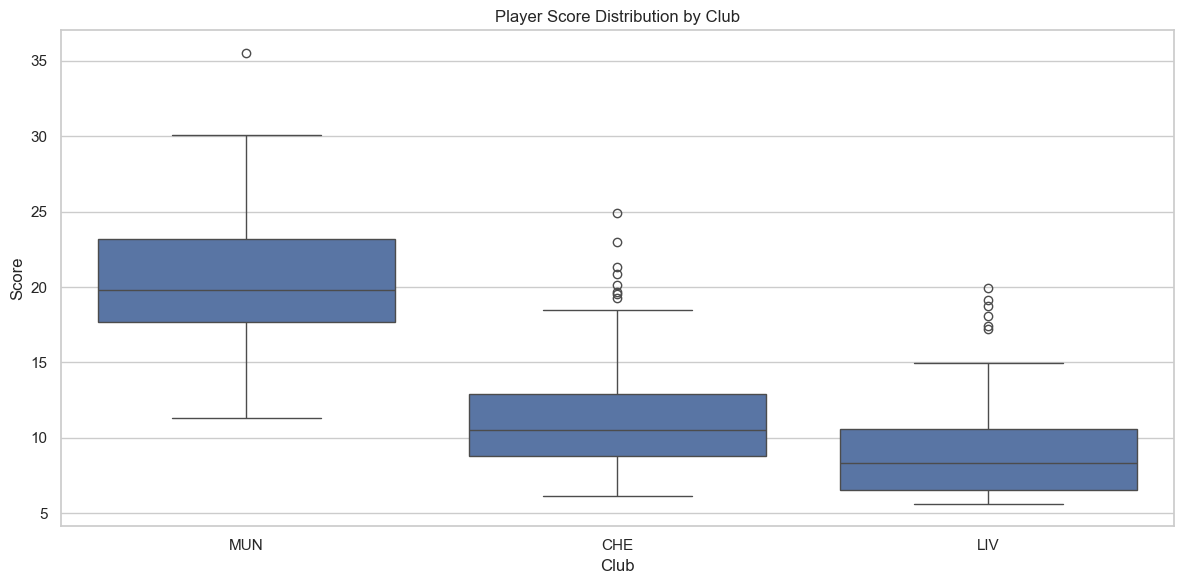


Encoding Club categorical variable:
Added 3 club dummy variables:
['Club_CHE', 'Club_LIV', 'Club_MUN']

Club mean scores (effect encoding):
  Club  ClubMeanScore
0  CHE      11.614744
1  LIV       9.415469
2  MUN      20.515254
Overall mean Score: 13.53
Club effects (deviation from overall mean):
MUN: 6.99
CHE: -1.91
LIV: -4.11

Club Strength Index:
  Club  ClubStrengthIndex
0  CHE           0.364081
1  LIV           1.000000
2  MUN           0.139508


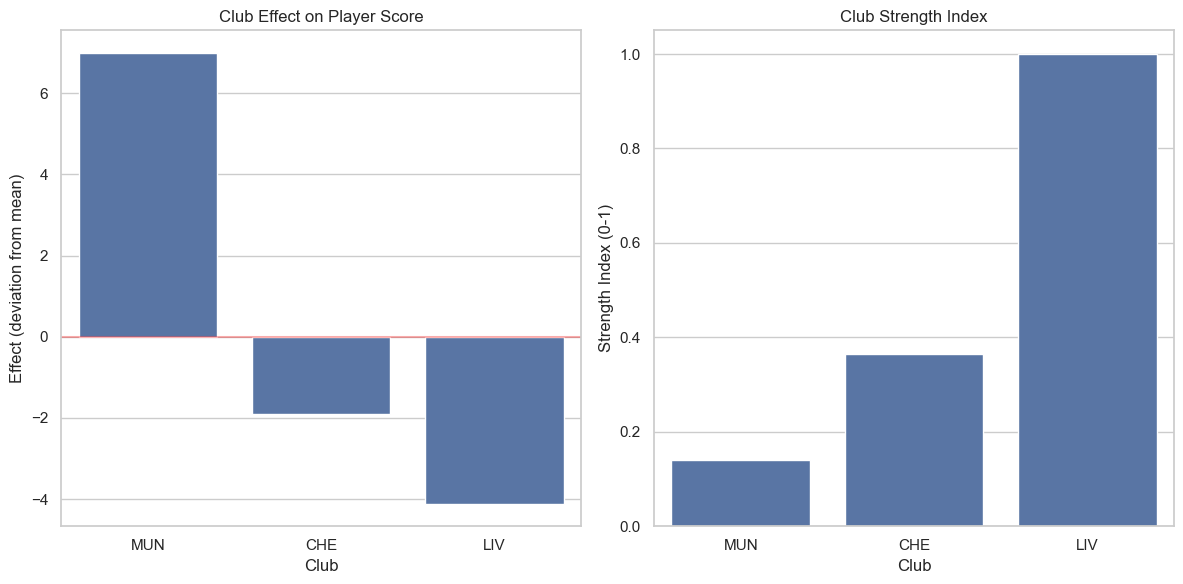


Final dataframe shape after feature engineering: (201, 41)
Original number of features: 9
New number of features: 41
Added 31 new features

Engineered dataset saved as 'EPL_Soccer_MLR_LR_engineered.csv'


In [ ]:
# Examine the Club variable
print("\nUnique clubs in the dataset:")
print(df['Club'].unique())

# Count distribution across clubs
club_counts = df['Club'].value_counts()
print("\nPlayer distribution across clubs:")
print(club_counts)

# Create visualizations of Score by Club to verify if Club has a significant effect
plt.figure(figsize=(12, 6))
sns.boxplot(x='Club', y='Score', data=df)
plt.title('Player Score Distribution by Club')
plt.xlabel('Club')
plt.ylabel('Score')
plt.tight_layout()
plt.savefig('score_by_club.png')
plt.show()

# Create dummy variables for Club using appropriate encoding techniques
print("\nEncoding Club categorical variable:")

# Method 1: One-hot encoding (creates binary columns for each club)
df_onehot = pd.get_dummies(df['Club'], prefix='Club')

# Add the encoded columns to the original dataframe
df = pd.concat([df, df_onehot], axis=1)

print(f"Added {len(df_onehot.columns)} club dummy variables:")
print(df_onehot.columns.tolist())

# Method 2: Effect encoding using mean Score by club
# Calculate mean Score by club
club_means = df.groupby('Club')['Score'].mean().reset_index()
club_means.columns = ['Club', 'ClubMeanScore']
print("\nClub mean scores (effect encoding):")
print(club_means)

# Merge this back to the dataframe
df = pd.merge(df, club_means, on='Club')

# Calculate club effect (deviation from overall mean)
overall_mean = df['Score'].mean()
df['ClubEffect'] = df['ClubMeanScore'] - overall_mean

print(f"Overall mean Score: {overall_mean:.2f}")
print("Club effects (deviation from overall mean):")
for club in df['Club'].unique():
    effect = df[df['Club'] == club]['ClubEffect'].iloc[0]
    print(f"{club}: {effect:.2f}")

# Method 3: Create a Club strength index based on multiple metrics
# Define metrics to include in club strength calculation
strength_metrics = ['Goals', 'DistanceCovered(InKms)', 'ShotsPerGame']

# Calculate club means for each metric
club_strength = df.groupby('Club')[strength_metrics].mean()

# Normalize each metric (0-1 scale)
club_strength_normalized = (club_strength - club_strength.min()) / (club_strength.max() - club_strength.min())

# Calculate overall strength as mean of normalized metrics
club_strength_normalized['ClubStrengthIndex'] = club_strength_normalized.mean(axis=1)

# Reset index to merge back to main dataframe
club_strength_normalized = club_strength_normalized.reset_index()

# Keep only Club and ClubStrengthIndex columns
club_strength_df = club_strength_normalized[['Club', 'ClubStrengthIndex']]

print("\nClub Strength Index:")
print(club_strength_df)

# Add to main dataframe
df = pd.merge(df, club_strength_df, on='Club')

# Visualize club effects and strength index
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 1)
sns.barplot(x='Club', y='ClubEffect', data=df.drop_duplicates('Club'), ax=ax1)
ax1.set_title('Club Effect on Player Score')
ax1.set_xlabel('Club')
ax1.set_ylabel('Effect (deviation from mean)')
ax1.axhline(y=0, color='red', linestyle='-', alpha=0.3)

ax2 = plt.subplot(1, 2, 2)
sns.barplot(x='Club', y='ClubStrengthIndex', data=df.drop_duplicates('Club'), ax=ax2)
ax2.set_title('Club Strength Index')
ax2.set_xlabel('Club')
ax2.set_ylabel('Strength Index (0-1)')

plt.tight_layout()
plt.savefig('club_encoding_comparison.png')
plt.show()

# Display final dataframe with engineered features
print("\nFinal dataframe shape after feature engineering:", df.shape)
print(f"Original number of features: {len(numerical_cols)}")
print(f"New number of features: {df.shape[1]}")
print(f"Added {df.shape[1] - len(numerical_cols) - 1} new features") # -1 for PlayerName

# Store engineered dataset
df.to_csv('EPL_Soccer_MLR_LR_engineered.csv', index=False)
print("\nEngineered dataset saved as 'EPL_Soccer_MLR_LR_engineered.csv'")



FEATURE ENGINEERING SUMMARY
--------------------------

Original Numerical Features:
- DistanceCovered(InKms)
- Goals
- MinutestoGoalRatio
- ShotsPerGame
- Cost
- Height
- Weight
- BMI
- Score

Interaction Terms Created:
- Goals_x_ShotsPerGame (Correlation with Score: -0.073)
- DistanceCovered(InKms)_x_Goals (Correlation with Score: -0.067)
- Weight_x_DistanceCovered(InKms) (Correlation with Score: -0.197)
- BMI_x_DistanceCovered(InKms) (Correlation with Score: -0.149)
- Cost_x_Goals (Correlation with Score: 0.830)
- ShotsPerGame_x_MinutestoGoalRatio (Correlation with Score: -0.544)

Efficiency Metrics Created:
- GoalToShotRatio (Correlation with Score: 0.298)
- GoalsPerDistance (Correlation with Score: 0.291)
- ShotsPerDistance (Correlation with Score: -0.059)
- ScoringRate (Correlation with Score: 0.550)

Performance-to-Cost Ratios Created:
- ScorePerMillion (Correlation with Score: 0.205)
- GoalsPerMillion (Correlation with Score: -0.763)
- CostGrowth (Correlation with Score: 0.957

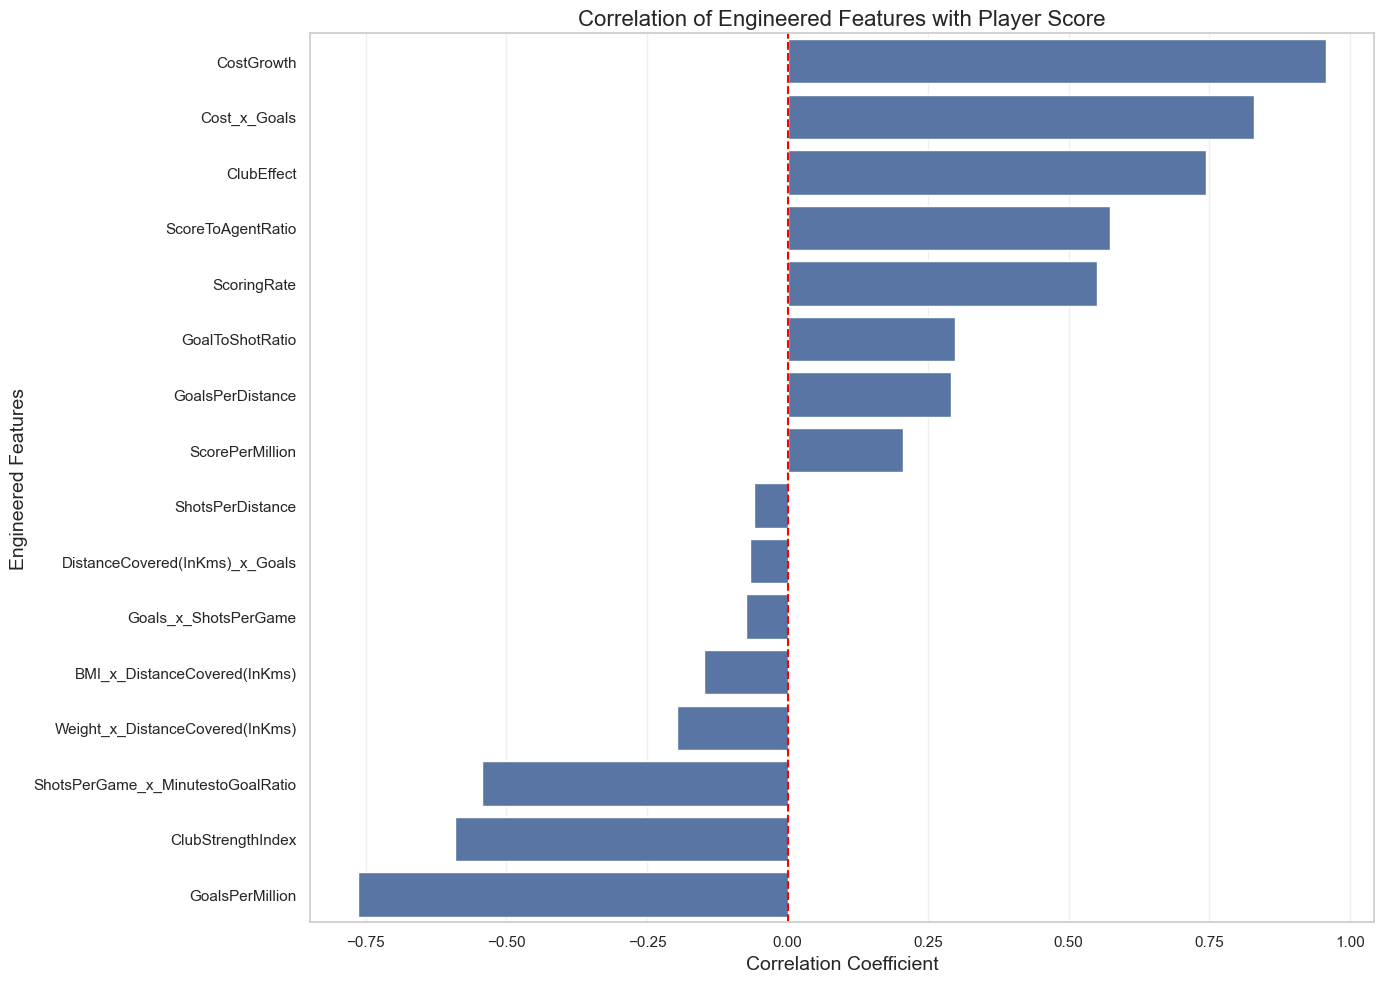


Top 5 Most Important Engineered Features (by correlation with Score):
1. CostGrowth: 0.957
2. Cost_x_Goals: 0.830
3. ClubEffect: 0.743
4. ScoreToAgentRatio: 0.574
5. ScoringRate: 0.550

Total features after engineering: 41
Original features: 10
New features added: 31


In [ ]:
# Create a comprehensive summary of all engineered features
print("\nFEATURE ENGINEERING SUMMARY")
print("--------------------------")

# List original numerical features
print("\nOriginal Numerical Features:")
for col in numerical_cols:
    print(f"- {col}")

# Summarize interaction terms
print("\nInteraction Terms Created:")
for feat1, feat2 in interaction_pairs:
    interaction_name = f"{feat1}_x_{feat2}"
    corr_with_score = df[[interaction_name, 'Score']].corr().iloc[0,1]
    print(f"- {interaction_name} (Correlation with Score: {corr_with_score:.3f})")

# Summarize efficiency metrics
print("\nEfficiency Metrics Created:")
for metric in efficiency_metrics:
    corr_with_score = df[[metric, 'Score']].corr().iloc[0,1]
    print(f"- {metric} (Correlation with Score: {corr_with_score:.3f})")

# Summarize performance-to-cost ratios
print("\nPerformance-to-Cost Ratios Created:")
for metric in ratio_metrics:
    corr_with_score = df[[metric, 'Score']].corr().iloc[0,1]
    print(f"- {metric} (Correlation with Score: {corr_with_score:.3f})")

# Summarize club encodings
print("\nClub Encoding Methods Applied:")
print("- One-hot encoding (Club_MUN, Club_CHE, Club_LIV)")
print("- Effect encoding (ClubEffect)")
print("- Club strength index (ClubStrengthIndex)")

# Create a visualization summarizing correlations of all engineered features with Score
# Combine all relevant columns
all_engineered_features = interaction_cols + efficiency_metrics + ratio_metrics + ['ClubEffect', 'ClubStrengthIndex']

# Calculate correlations with Score
feature_corrs = df[all_engineered_features + ['Score']].corr()['Score'].drop('Score')
feature_corrs = feature_corrs.sort_values(ascending=False)

# Plot as a horizontal bar chart
plt.figure(figsize=(14, 10))
sns.barplot(x=feature_corrs.values, y=feature_corrs.index)
plt.title('Correlation of Engineered Features with Player Score', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Engineered Features', fontsize=14)
plt.axvline(x=0, color='red', linestyle='--')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('engineered_features_correlation_summary.png')
plt.show()

# Display top 5 most important engineered features
print("\nTop 5 Most Important Engineered Features (by correlation with Score):")
for i, (feature, corr) in enumerate(feature_corrs.head(5).items(), 1):
    print(f"{i}. {feature}: {corr:.3f}")

# Display total number of features after engineering
print(f"\nTotal features after engineering: {df.shape[1]}")
print(f"Original features: {len(numerical_cols) + 1}")  # +1 for Club
print(f"New features added: {df.shape[1] - (len(numerical_cols) + 1)}")


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import warnings
warnings.filterwarnings('ignore')

# Set visualization parameters
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Load the engineered dataset from previous step
df = pd.read_csv('EPL_Soccer_MLR_LR_engineered.csv')

# Display basic dataset information
print(f"Dataset Shape: {df.shape}")
print(f"Number of features: {df.shape[1]-1}")  # Excluding the target variable


Dataset Shape: (201, 41)
Number of features: 40



Number of features to be scaled: 29


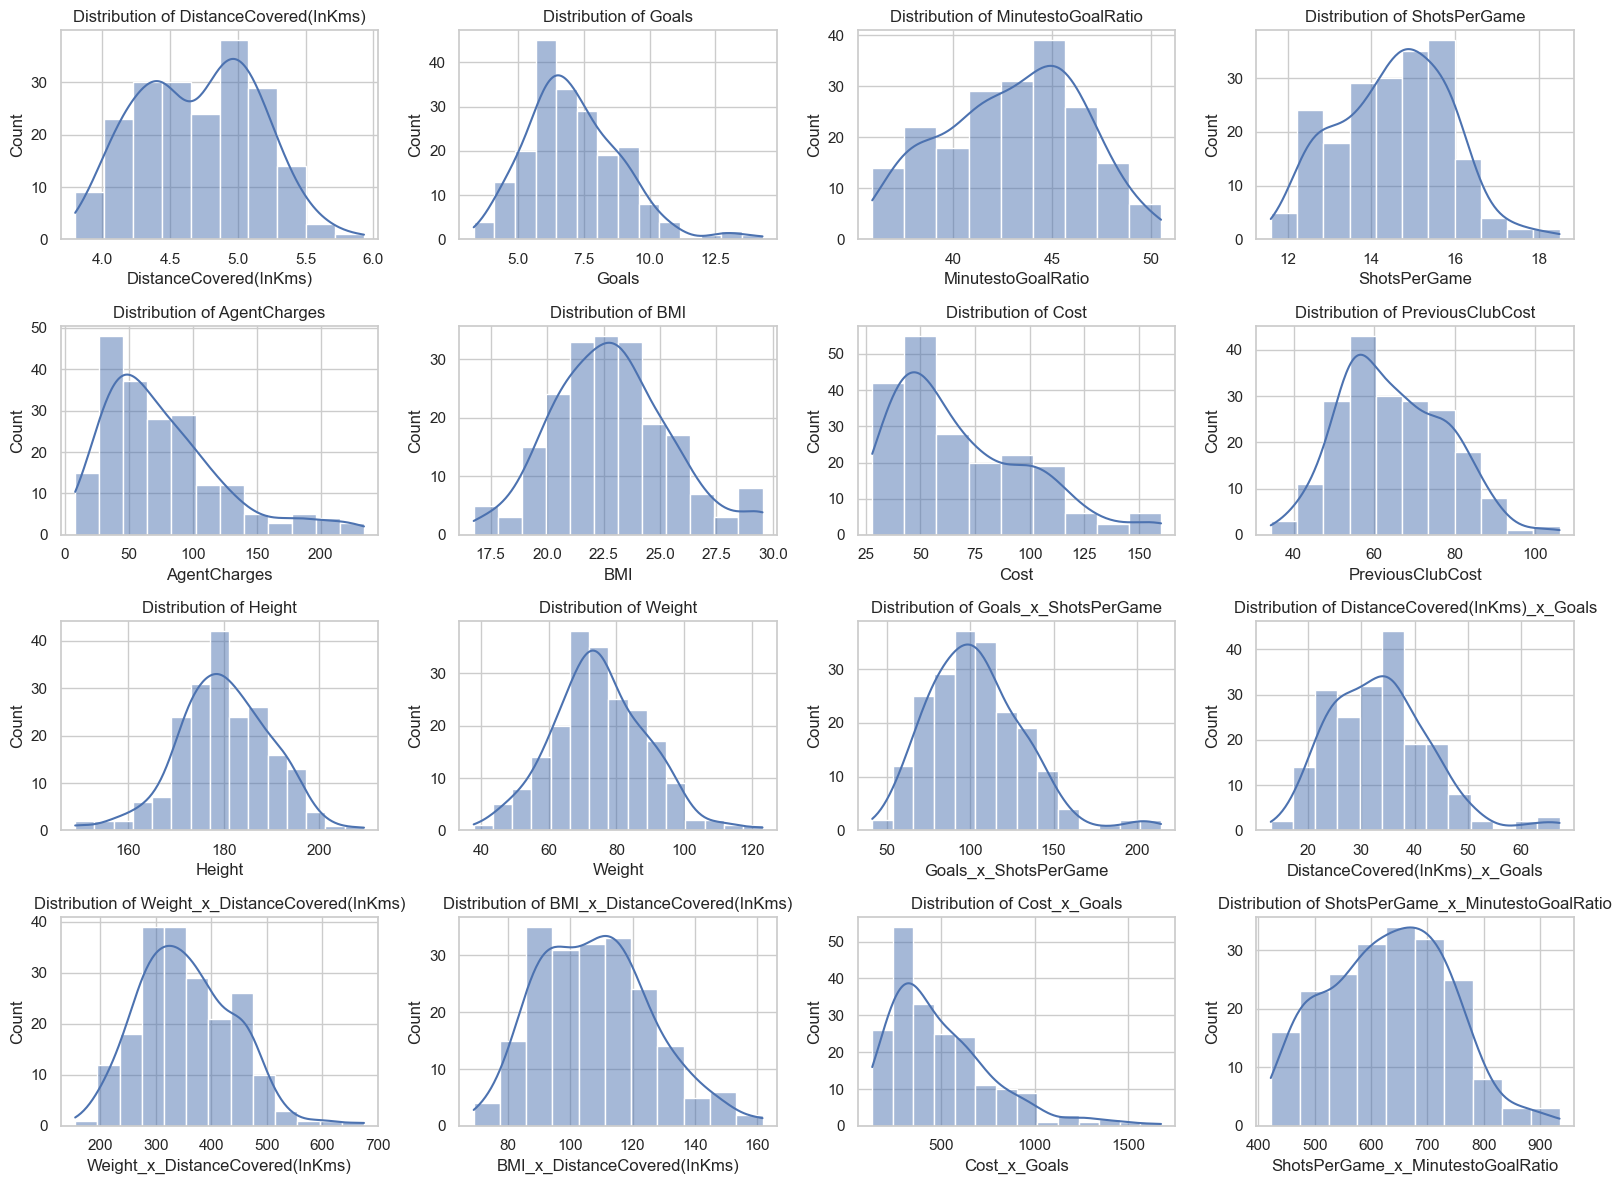


Feature statistics before scaling:


min          max        range  \
DistanceCovered(InKms)               3.800000     5.930000     2.130000   
Goals                                3.300000    14.300000    11.000000   
MinutestoGoalRatio                  35.900000    50.500000    14.600000   
ShotsPerGame                        11.600000    18.500000     6.900000   
AgentCharges                         8.000000   234.000000   226.000000   
BMI                                 16.750000    29.538750    12.788750   
Cost                                28.000000   160.100000   132.100000   
PreviousClubCost                    34.360000   106.000000    71.640000   
Height                             148.900000   209.400000    60.500000   
Weight                              37.800000   123.200000    85.400000   
Goals_x_ShotsPerGame                41.250000   214.500000   173.250000   
DistanceCovered(InKms)_x_Goals      13.035000    67.183000    54.148000   
Weight_x_DistanceCovered(InKms)    154.602000   675.136000   520.534000   
BMI_x_DistanceCovered(InKms)        68.842500   161.872350    93.029850   
Cost_x_Goals                       130.290000  1675.620000  1545.330000   
ShotsPerGame_x_MinutestoGoalRatio  422.240000   934.250000   512.010000   
GoalToShotRatio                      0.253247     0.977941     0.724694   
GoalsPerDistance                     0.779727     3.088553     2.308826   
ShotsPerDistance                     2.715008     3.461538     0.746530   
ScoringRate                          1.782178     2.506964     0.724786   
ScorePerMillion                      0.141176     0.269293     0.128117   
GoalsPerMillion                      0.033104     0.290323     0.257218   
CostGrowth                           0.386813     2.994762     2.607949   
ScoreToAgentRatio                    0.028638     1.571538     1.542900   
ExpectedScore                        5.763404    30.913960    25.150557   
ValueAssessment                     -4.631773     4.606040     9.237813   
ClubMeanScore                        9.415469    20.515254    11.099785   
ClubEffect                          -4.111596     6.988190    11.099785   
ClubStrengthIndex                    0.139508     1.000000     0.860492   

                                           mean         std  \
DistanceCovered(InKms)             4.708657e+00    0.436651   
Goals                              7.108706e+00    1.805045   
MinutestoGoalRatio                 4.300896e+01    3.478293   
ShotsPerGame                       1.454328e+01    1.325770   
AgentCharges                       7.688060e+01   47.619803   
BMI                                2.286627e+01    2.620900   
Cost                               6.877761e+01   31.381992   
PreviousClubCost                   6.485318e+01   13.099567   
Height                             1.801299e+02    9.751826   
Weight                             7.500373e+01   13.960201   
Goals_x_ShotsPerGame               1.037146e+02   29.257808   
DistanceCovered(InKms)_x_Goals     3.359384e+01    9.500898   
Weight_x_DistanceCovered(InKms)    3.557328e+02   85.843057   
BMI_x_DistanceCovered(InKms)       1.080050e+02   18.132406   
Cost_x_Goals                       4.965616e+02  280.086794   
ShotsPerGame_x_MinutestoGoalRatio  6.298515e+02  106.045726   
GoalToShotRatio                    4.912629e-01    0.126743   
GoalsPerDistance                   1.516946e+00    0.389507   
ShotsPerDistance                   3.092100e+00    0.137860   
ScoringRate                        2.106572e+00    0.174442   
ScorePerMillion                    1.971695e-01    0.024534   
GoalsPerMillion                    1.225291e-01    0.054962   
CostGrowth                         1.122680e+00    0.599088   
ScoreToAgentRatio                  2.656981e-01    0.229161   
ExpectedScore                      1.352706e+01    5.974826   
ValueAssessment                   -2.050322e-15    1.651867   
ClubMeanScore                      1.352706e+01    4.608921   
ClubEffect                 

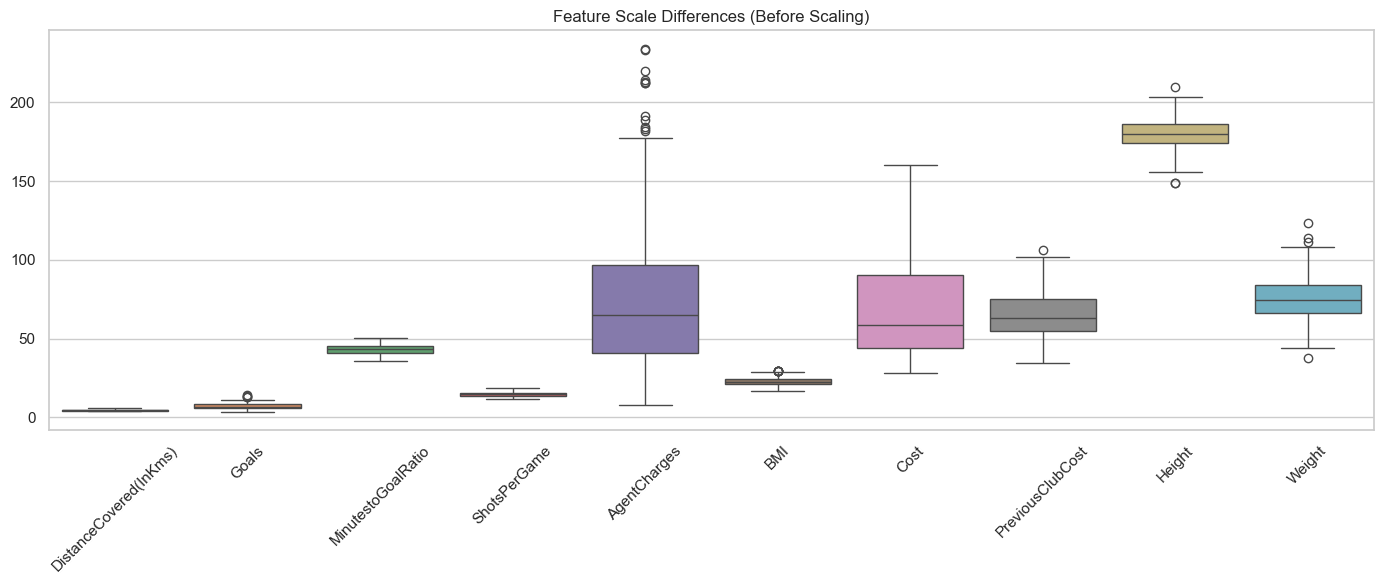

In [ ]:
# Select numerical features for scaling
# Exclude target variable (Score) and non-numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'Score' in numeric_cols:
    numeric_cols.remove('Score')  # Remove target variable from scaling list

# Display number of features to be scaled
print(f"\nNumber of features to be scaled: {len(numeric_cols)}")

# Examine distribution of selected features before scaling
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numeric_cols[:16]):  # Plot first 16 features for readability
    plt.subplot(4, 4, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()
plt.savefig('feature_distributions_before_scaling.png')
plt.show()

# Create a statistical summary of the features to be scaled
scale_stats = df[numeric_cols].describe().T
scale_stats['range'] = scale_stats['max'] - scale_stats['min']
scale_stats['coefficient_of_variation'] = scale_stats['std'] / scale_stats['mean']

print("\nFeature statistics before scaling:")
display(scale_stats[['min', 'max', 'range', 'mean', 'std', 'coefficient_of_variation']])

# Visualize the scale differences between features
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[numeric_cols[:10]])  # Plot first 10 features for clarity
plt.title('Feature Scale Differences (Before Scaling)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('feature_scales_before_scaling.png')
plt.show()



Feature statistics after StandardScaler:


min       max          mean       std
DistanceCovered(InKms)            -2.086166  2.804057  2.403826e-15  1.002497
Goals                             -2.115303  3.993945  1.502391e-16  1.002497
MinutestoGoalRatio                -2.048909  2.159033  1.767519e-15  1.002497
ShotsPerGame                      -2.225598  2.991918  1.343315e-15  1.002497
AgentCharges                      -1.450081  3.307693  3.535038e-17  1.002497
BMI                               -2.339481  2.552228  1.060512e-16  1.002497
Cost                              -1.302640  2.917291  2.474527e-16  1.002497
PreviousClubCost                  -2.333613  3.148925  1.131212e-15  1.002497
Height                            -3.210458  3.008999 -2.474527e-16  1.002497
Weight                            -2.671639  3.461025  4.242046e-16  1.002497
Goals_x_ShotsPerGame              -2.140304  3.795978  3.358287e-16  1.002497
DistanceCovered(InKms)_x_Goals    -2.169287  3.544194  8.837596e-17  1.002497
Weight_x_DistanceCovered(InKms)   -2.348856  3.730071 -7.070077e-17  1.002497
BMI_x_DistanceCovered(InKms)      -2.165202  2.978194  1.414015e-16  1.002497
Cost_x_Goals                      -1.310973  4.220129  3.535038e-17  1.002497
ShotsPerGame_x_MinutestoGoalRatio -1.962643  2.877612  2.121023e-16  1.002497
GoalToShotRatio                   -1.882635  3.849478  2.828031e-16  1.002497
GoalsPerDistance                  -1.897422  4.044934  1.590767e-16  1.002497
ShotsPerDistance                  -2.742154  2.686499 -2.987108e-15  1.002497
ScoringRate                       -1.864259  2.301006  7.777085e-16  1.002497
ScorePerMillion                   -2.287951  2.947079  5.302558e-16  1.002497
GoalsPerMillion                   -1.631107  3.060549  1.060512e-16  1.002497
CostGrowth                        -1.231378  3.132686  0.000000e+00  1.002497
ScoreToAgentRatio                 -1.037051  5.712585  7.070077e-17  1.002497
ExpectedScore                     -1.302640  2.917291 -1.414015e-16  1.002497
ValueAssessment                   -2.810963  2.795346  3.535038e-17  1.002497
ClubMeanScore                     -0.894323  1.520017 -2.121023e-16  1.002497
ClubEffect                        -0.894323  1.520017  0.000000e+00  1.002497
ClubStrengthIndex                 -1.021786  1.412867  1.414015e-16  1.002497

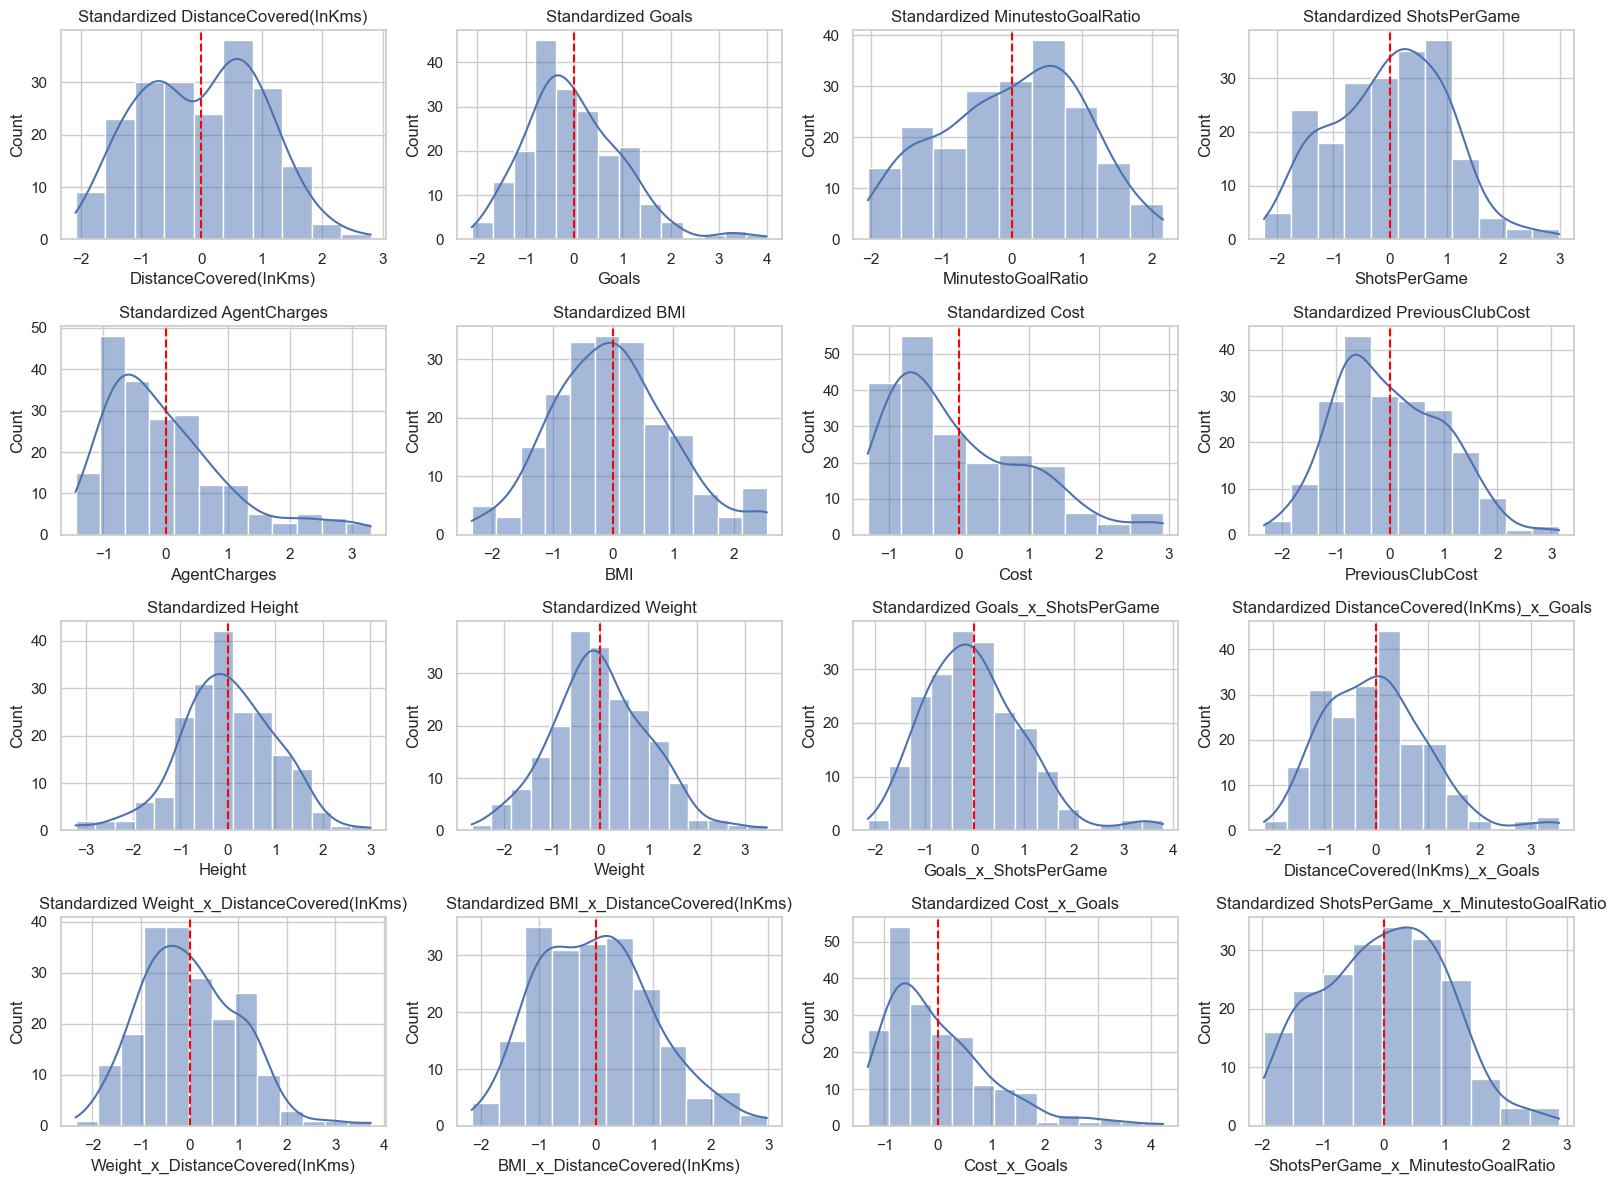

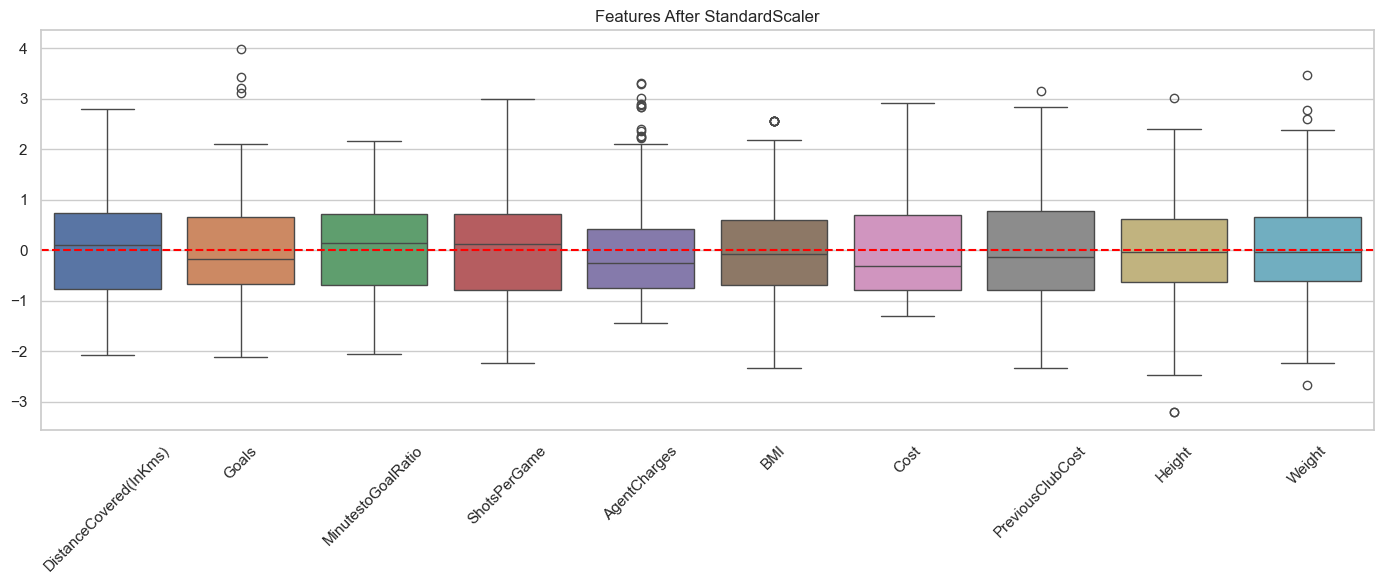

In [ ]:
# Create a copy of the dataframe for scaling
df_scaled = df.copy()

# Initialize the StandardScaler
standard_scaler = StandardScaler()

# Apply StandardScaler to numeric features
df_scaled[numeric_cols] = standard_scaler.fit_transform(df[numeric_cols])

# Display statistics after standardization
standard_scaled_stats = df_scaled[numeric_cols].describe().T

print("\nFeature statistics after StandardScaler:")
display(standard_scaled_stats[['min', 'max', 'mean', 'std']])

# Visualize distributions after standardization
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numeric_cols[:16]):  # Plot first 16 features for readability
    plt.subplot(4, 4, i+1)
    sns.histplot(df_scaled[feature], kde=True)
    plt.title(f'Standardized {feature}')
    plt.axvline(x=0, color='red', linestyle='--')  # Add line at mean (0)
    plt.tight_layout()
plt.savefig('feature_distributions_after_standardization.png')
plt.show()

# Visualize scaled features using boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_scaled[numeric_cols[:10]])  # Plot first 10 features for clarity
plt.title('Features After StandardScaler')
plt.xticks(rotation=45)
plt.axhline(y=0, color='red', linestyle='--')  # Add line at mean (0)
plt.tight_layout()
plt.savefig('features_after_standardization.png')
plt.show()

# Store the standardized features for later use
X_standardized = df_scaled[numeric_cols].copy()



Feature statistics after MinMaxScaler:


min  max      mean       std
DistanceCovered(InKms)             0.0  1.0  0.426599  0.205000
Goals                              0.0  1.0  0.346246  0.164095
MinutestoGoalRatio                 0.0  1.0  0.486915  0.238239
ShotsPerGame                       0.0  1.0  0.426563  0.192141
AgentCharges                       0.0  1.0  0.304781  0.210707
BMI                                0.0  1.0  0.478254  0.204938
Cost                               0.0  1.0  0.308687  0.237562
PreviousClubCost                   0.0  1.0  0.425645  0.182853
Height                             0.0  1.0  0.516196  0.161187
Weight                             0.0  1.0  0.435641  0.163468
Goals_x_ShotsPerGame               0.0  1.0  0.360546  0.168876
DistanceCovered(InKms)_x_Goals     0.0  1.0  0.379679  0.175462
Weight_x_DistanceCovered(InKms)    0.0  1.0  0.386393  0.164913
BMI_x_DistanceCovered(InKms)       0.0  1.0  0.420967  0.194910
Cost_x_Goals                       0.0  1.0  0.237018  0.181247
ShotsPerGame_x_MinutestoGoalRatio  0.0  1.0  0.405483  0.207117
GoalToShotRatio                    0.0  1.0  0.328437  0.174891
GoalsPerDistance                   0.0  1.0  0.319305  0.168704
ShotsPerDistance                   0.0  1.0  0.505126  0.184668
ScoringRate                        0.0  1.0  0.447573  0.240680
ScorePerMillion                    0.0  1.0  0.437046  0.191498
GoalsPerMillion                    0.0  1.0  0.347661  0.213677
CostGrowth                         0.0  1.0  0.282163  0.229716
ScoreToAgentRatio                  0.0  1.0  0.153645  0.148526
ExpectedScore                      0.0  1.0  0.308687  0.237562
ValueAssessment                    0.0  1.0  0.501393  0.178816
ClubMeanScore                      0.0  1.0  0.370421  0.415226
ClubEffect                         0.0  1.0  0.370421  0.415226
ClubStrengthIndex                  0.0  1.0  0.419685  0.411762


Feature statistics after RobustScaler:


min       max      mean       std
DistanceCovered(InKms)            -1.439394  1.787879 -0.062641  0.661592
Goals                             -1.458333  3.125000  0.128628  0.752102
MinutestoGoalRatio                -1.551020  1.428571 -0.100213  0.709856
ShotsPerGame                      -1.550000  1.900000 -0.078358  0.662885
AgentCharges                      -1.017857  3.017857  0.212154  0.850354
BMI                               -1.754438  2.029216  0.055111  0.775414
Cost                              -0.663090  2.171674  0.211966  0.673433
PreviousClubCost                  -1.407462  2.109475  0.089503  0.643081
Height                            -2.524590  2.434426  0.035234  0.799330
Weight                            -2.067797  2.757062  0.034109  0.788712
Goals_x_ShotsPerGame              -1.594595  2.996025  0.060536  0.775247
DistanceCovered(InKms)_x_Goals    -1.614723  2.657646  0.007404  0.749637
Weight_x_DistanceCovered(InKms)   -1.544687  2.588373  0.052299  0.681597
BMI_x_DistanceCovered(InKms)      -1.498981  2.051560 -0.004319  0.692034
Cost_x_Goals                      -0.899848  3.616284  0.170558  0.818536
ShotsPerGame_x_MinutestoGoalRatio -1.390642  1.913714 -0.050781  0.684387
GoalToShotRatio                   -1.386757  3.198106  0.119079  0.801853
GoalsPerDistance                  -1.380987  3.337959  0.125794  0.796103
ShotsPerDistance                  -1.969336  1.892267 -0.018740  0.713113
ScoringRate                       -1.201320  1.834726  0.157531  0.730716
ScorePerMillion                   -1.453416  2.060241  0.082215  0.672858
GoalsPerMillion                   -0.948526  2.011442  0.080540  0.632476
CostGrowth                        -0.618199  2.393746  0.231661  0.691893
ScoreToAgentRatio                 -0.618265  5.205525  0.276534  0.864985
ExpectedScore                     -0.663090  2.171674  0.211966  0.673433
ValueAssessment                   -2.041063  2.267510  0.119225  0.770441
ClubMeanScore                     -0.198137  0.801863  0.172285  0.415226
ClubEffect                        -0.198137  0.801863  0.172285  0.415226
ClubStrengthIndex                 -0.260982  0.739018  0.158703  0.411762

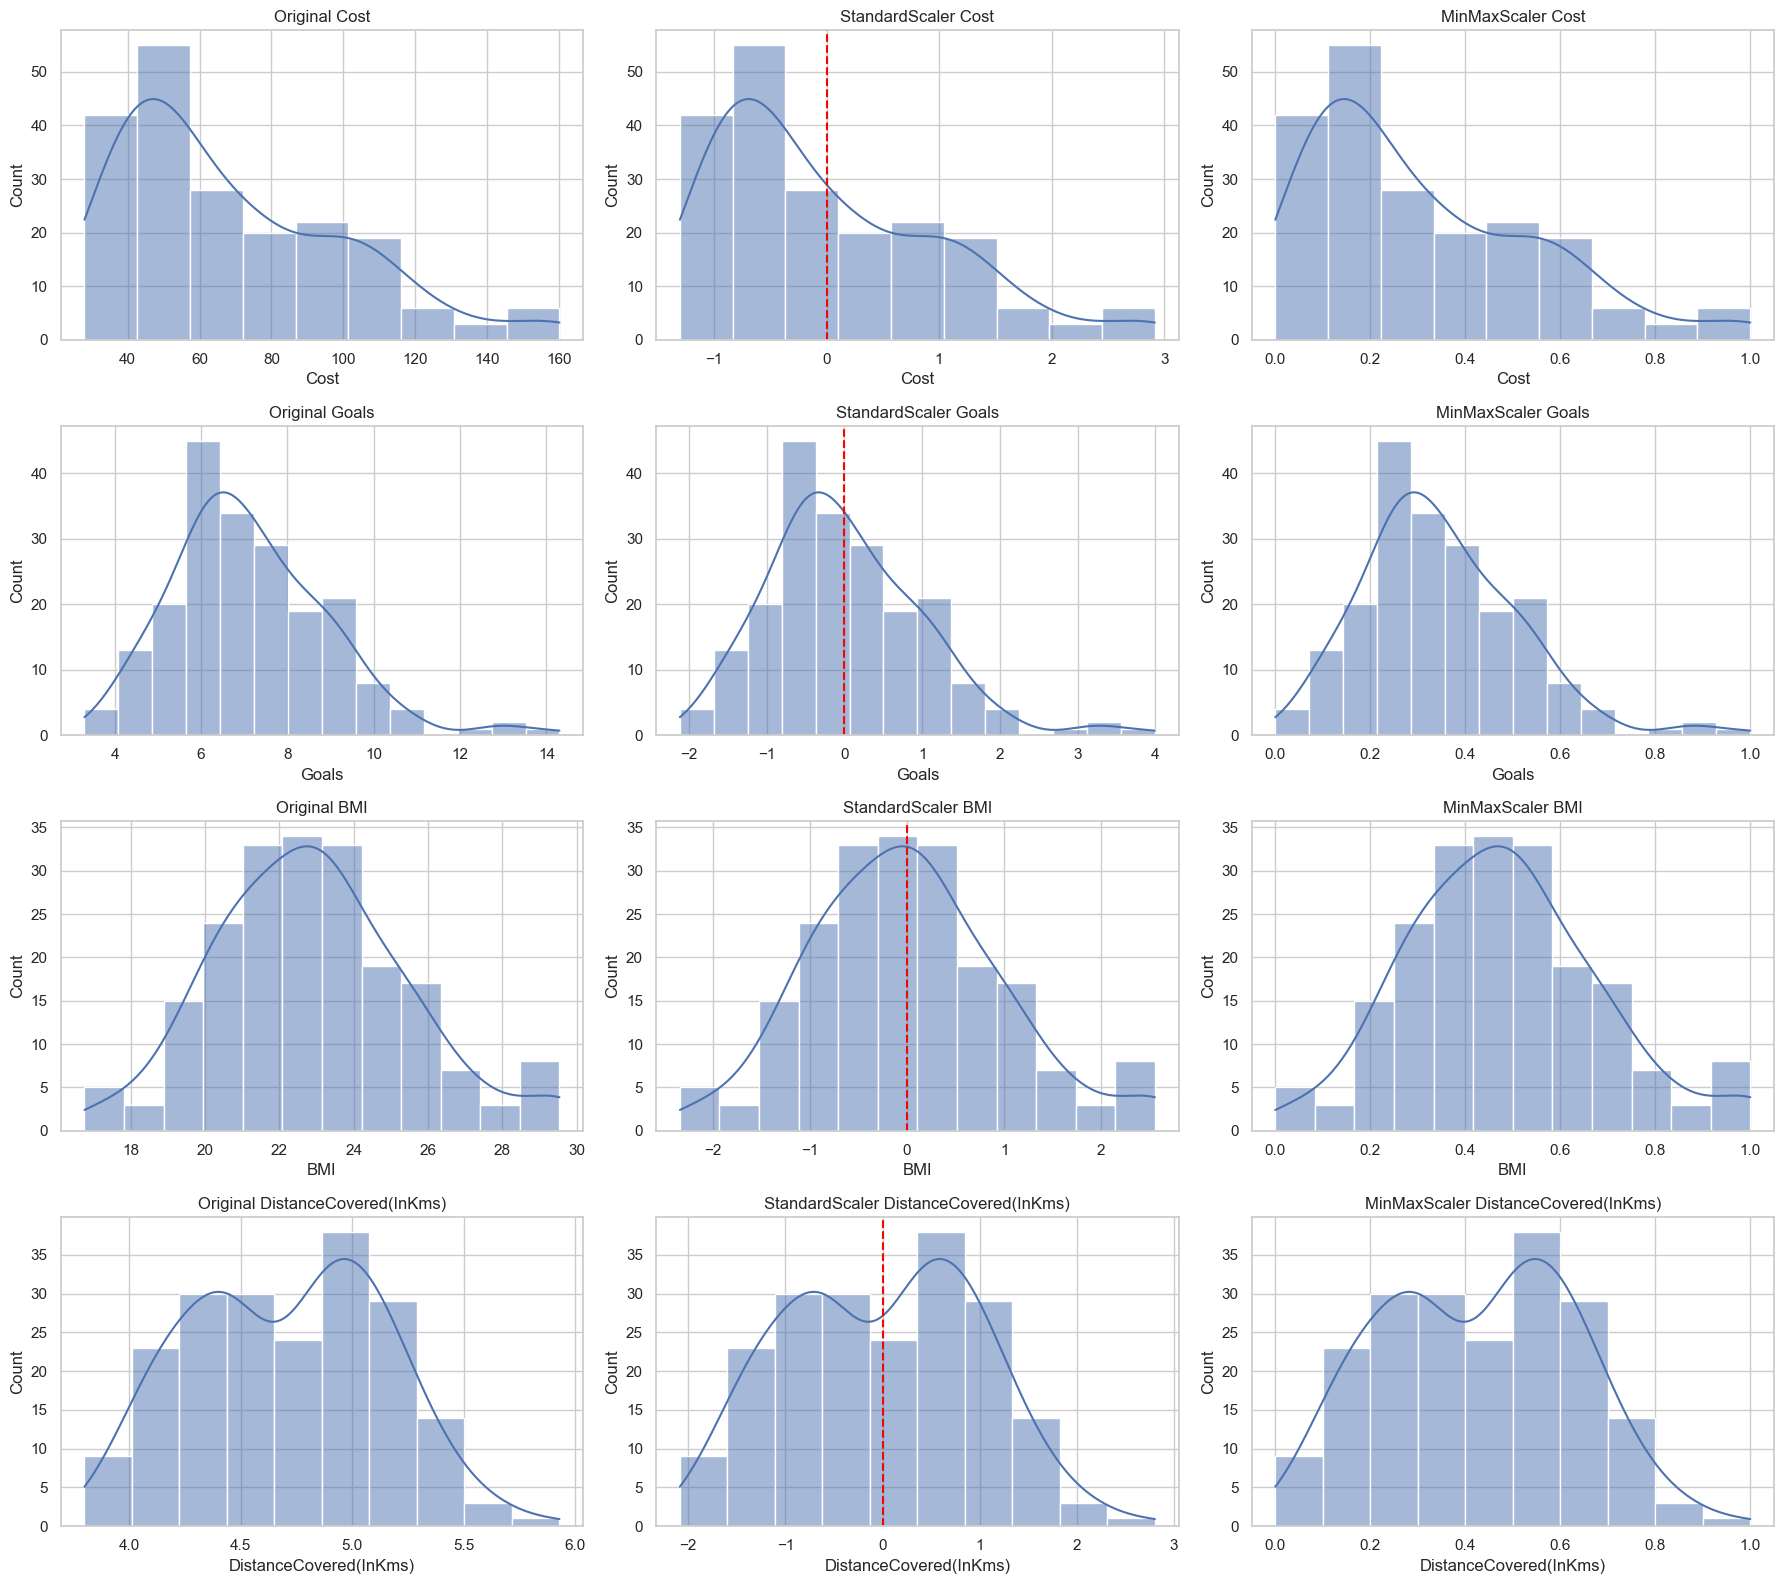

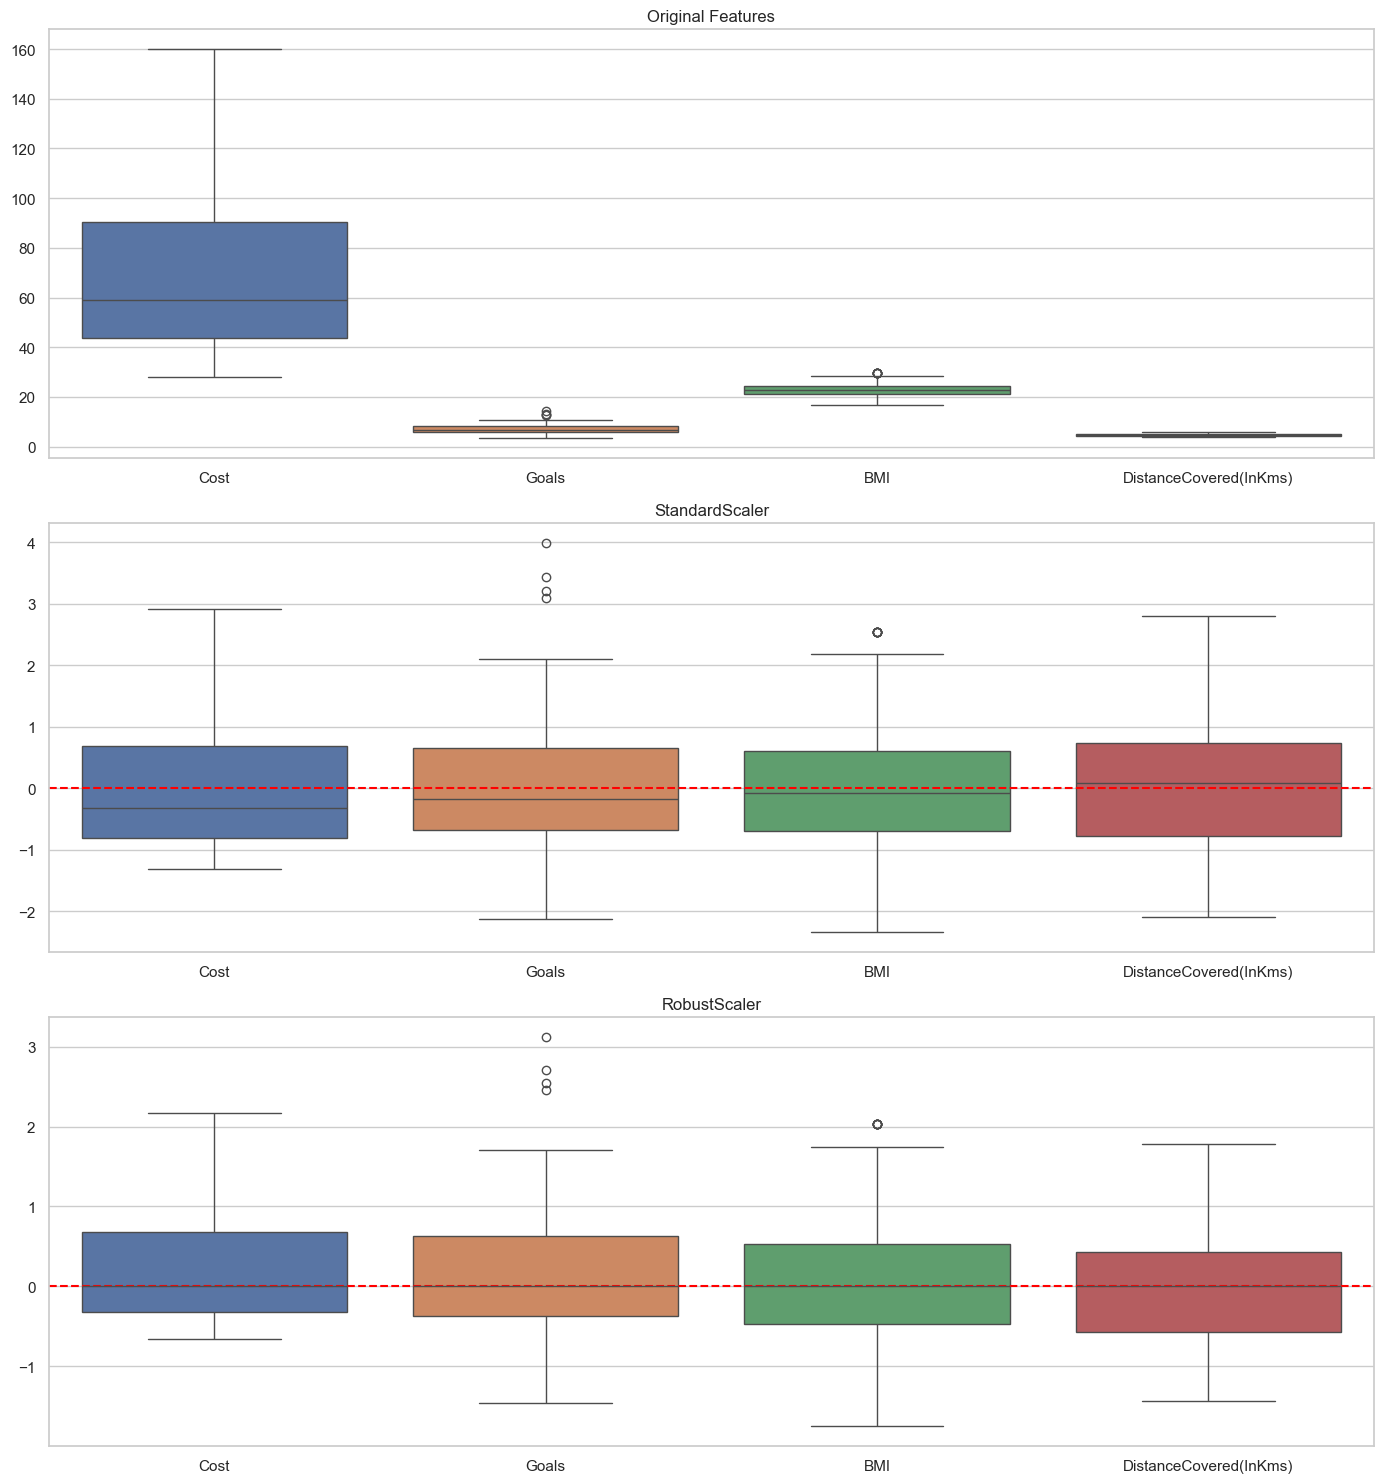

In [ ]:
# Initialize alternative scalers
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

# Create copies of the dataframe for different scaling techniques
df_minmax = df.copy()
df_robust = df.copy()

# Apply MinMaxScaler (scales to range [0,1])
df_minmax[numeric_cols] = minmax_scaler.fit_transform(df[numeric_cols])

# Apply RobustScaler (scales using median and IQR)
df_robust[numeric_cols] = robust_scaler.fit_transform(df[numeric_cols])

# Compare statistics after different scaling methods
minmax_stats = df_minmax[numeric_cols].describe().T
robust_stats = df_robust[numeric_cols].describe().T

print("\nFeature statistics after MinMaxScaler:")
display(minmax_stats[['min', 'max', 'mean', 'std']])

print("\nFeature statistics after RobustScaler:")
display(robust_stats[['min', 'max', 'mean', 'std']])

# Create a comparison visualization of the three scaling techniques
sample_features = ['Cost', 'Goals', 'BMI', 'DistanceCovered(InKms)']
fig, axes = plt.subplots(len(sample_features), 3, figsize=(18, 16))

for i, feature in enumerate(sample_features):
    # Original data distribution
    sns.histplot(df[feature], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Original {feature}')
    
    # Standard scaled distribution
    sns.histplot(df_scaled[feature], ax=axes[i, 1], kde=True)
    axes[i, 1].set_title(f'StandardScaler {feature}')
    axes[i, 1].axvline(x=0, color='red', linestyle='--')
    
    # MinMax scaled distribution
    sns.histplot(df_minmax[feature], ax=axes[i, 2], kde=True)
    axes[i, 2].set_title(f'MinMaxScaler {feature}')

plt.tight_layout()
plt.savefig('scaling_methods_comparison.png')
plt.show()

# Compare boxplots for all three scaling methods
fig, axes = plt.subplots(3, 1, figsize=(14, 15))

# Original data
sns.boxplot(data=df[sample_features], ax=axes[0])
axes[0].set_title('Original Features')

# StandardScaler
sns.boxplot(data=df_scaled[sample_features], ax=axes[1])
axes[1].set_title('StandardScaler')
axes[1].axhline(y=0, color='red', linestyle='--')

# RobustScaler
sns.boxplot(data=df_robust[sample_features], ax=axes[2])
axes[2].set_title('RobustScaler')
axes[2].axhline(y=0, color='red', linestyle='--')

plt.tight_layout()
plt.savefig('scaling_boxplots_comparison.png')
plt.show()


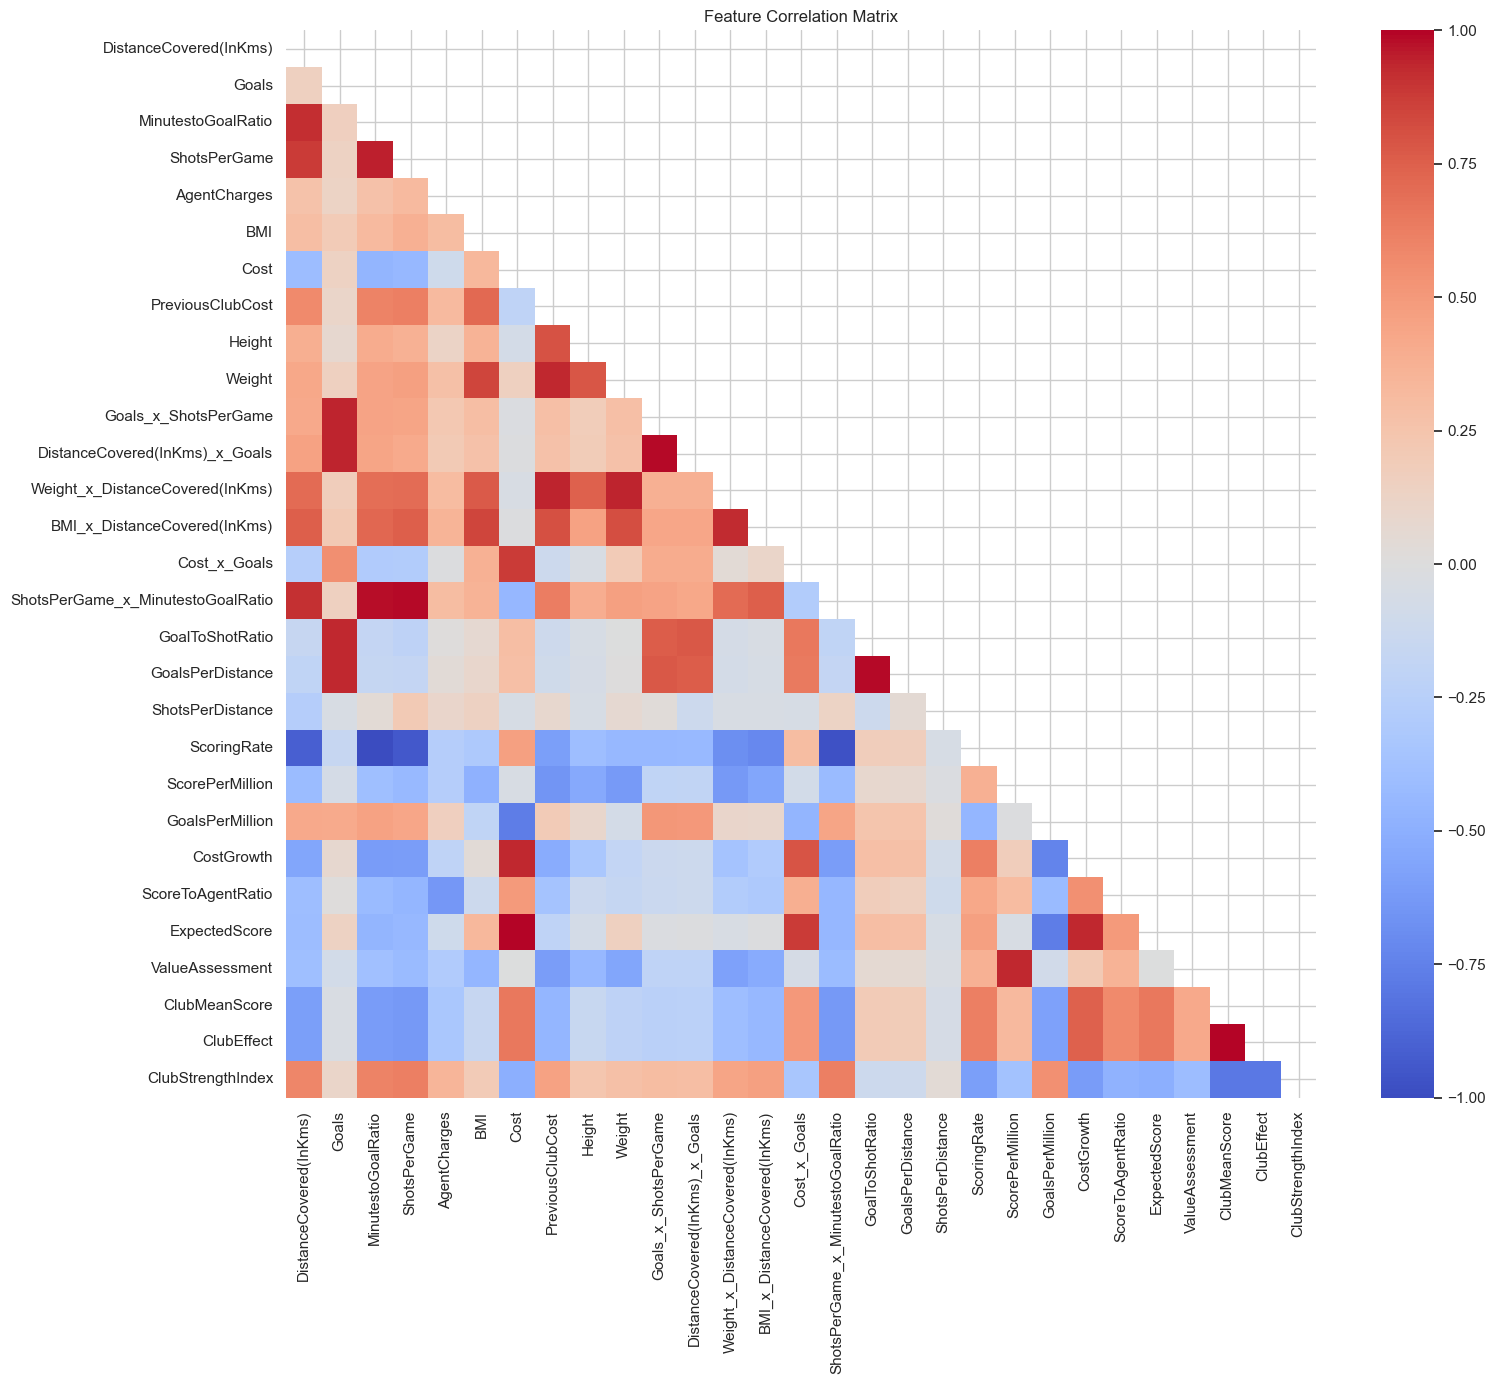


Highly correlated feature pairs (|r| > 0.8):
DistanceCovered(InKms) & MinutestoGoalRatio: 0.917
DistanceCovered(InKms) & ShotsPerGame: 0.882
DistanceCovered(InKms) & ShotsPerGame_x_MinutestoGoalRatio: 0.910
DistanceCovered(InKms) & ScoringRate: -0.907
Goals & Goals_x_ShotsPerGame: 0.945
Goals & DistanceCovered(InKms)_x_Goals: 0.945
Goals & GoalToShotRatio: 0.933
Goals & GoalsPerDistance: 0.933
MinutestoGoalRatio & ShotsPerGame: 0.950
MinutestoGoalRatio & ShotsPerGame_x_MinutestoGoalRatio: 0.983
MinutestoGoalRatio & ScoringRate: -0.996
ShotsPerGame & ShotsPerGame_x_MinutestoGoalRatio: 0.989
ShotsPerGame & ScoringRate: -0.944
BMI & Weight: 0.848
BMI & BMI_x_DistanceCovered(InKms): 0.849
Cost & Cost_x_Goals: 0.877
Cost & CostGrowth: 0.934
Cost & ExpectedScore: 1.000
PreviousClubCost & Height: 0.804
PreviousClubCost & Weight: 0.931
PreviousClubCost & Weight_x_DistanceCovered(InKms): 0.943
PreviousClubCost & BMI_x_DistanceCovered(InKms): 0.810
Weight & Weight_x_DistanceCovered(InKms): 0.93

Feature           VIF
7                                Cost           inf
25                      ExpectedScore           inf
2                               Goals  5.294310e+04
16  ShotsPerGame_x_MinutestoGoalRatio  2.787406e+04
11               Goals_x_ShotsPerGame  1.808662e+04
3                  MinutestoGoalRatio  1.702188e+04
4                        ShotsPerGame  1.457813e+04
12     DistanceCovered(InKms)_x_Goals  1.454129e+04
17                    GoalToShotRatio  1.452922e+04
18                   GoalsPerDistance  1.089724e+04
1              DistanceCovered(InKms)  3.943489e+03
20                        ScoringRate  2.991489e+03
10                             Weight  2.371802e+03
8                    PreviousClubCost  1.613250e+03
14       BMI_x_DistanceCovered(InKms)  1.285493e+03
13    Weight_x_DistanceCovered(InKms)  1.200380e+03
19                   ShotsPerDistance  8.684794e+02
6                                 BMI  6.313864e+02
23                         CostGrowth  2.463517e+02
15                       Cost_x_Goals  5.158201e+01
26                    ValueAssessment  3.845545e+01
9                              Height  3.574311e+01
22                    GoalsPerMillion  1.736517e+01
21                    ScorePerMillion  1.344403e+01
27                      ClubMeanScore  4.064088e+00
24                  ScoreToAgentRatio  2.967238e+00
5                        AgentCharges  2.093390e+00
0                               const  0.000000e+00

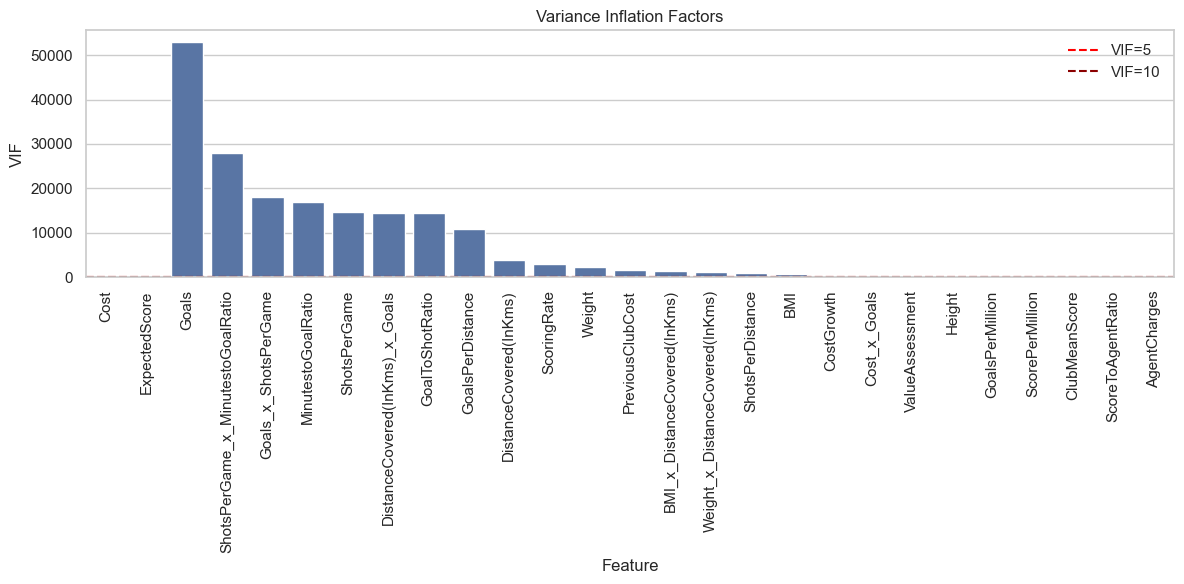

In [ ]:
# Check correlation between features
correlation_matrix = df[numeric_cols].corr()

# Create a heatmap to visualize feature correlations
plt.figure(figsize=(16, 14))
mask = np.triu(correlation_matrix)  # Create mask for upper triangle
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', mask=mask, 
           vmin=-1, vmax=1, center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('feature_correlation_matrix.png')
plt.show()

# Identify highly correlated features (|r| > 0.8)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            col_i = correlation_matrix.columns[i]
            col_j = correlation_matrix.columns[j]
            corr_val = correlation_matrix.iloc[i, j]
            high_corr_pairs.append((col_i, col_j, corr_val))

print("\nHighly correlated feature pairs (|r| > 0.8):")
for col_i, col_j, corr_val in high_corr_pairs:
    print(f"{col_i} & {col_j}: {corr_val:.3f}")

# Calculate Variance Inflation Factor (VIF)
# Select a subset of features to avoid perfect multicollinearity
# Exclude the derivative features that are directly calculated from others
vif_features = [col for col in numeric_cols 
                if not (col.endswith('_x_') or col in ['ClubEffect', 'ClubStrengthIndex'])]

# Add constant for VIF calculation
X_with_constant = add_constant(df[vif_features])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_constant.values, i) 
                  for i in range(X_with_constant.shape[1])]

# Sort by VIF value
vif_data = vif_data.sort_values('VIF', ascending=False)

print("\nVariance Inflation Factors:")
display(vif_data)

# Visualize VIF values (excluding constant)
vif_data_no_const = vif_data[vif_data['Feature'] != 'const']
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='VIF', data=vif_data_no_const)
plt.title('Variance Inflation Factors')
plt.xticks(rotation=90)
plt.axhline(y=5, color='red', linestyle='--', label='VIF=5')
plt.axhline(y=10, color='darkred', linestyle='--', label='VIF=10')
plt.legend()
plt.tight_layout()
plt.savefig('vif_values.png')
plt.show()



Feature selection based on correlation with target:
Removed DistanceCovered(InKms) (corr with target: 0.505), kept MinutestoGoalRatio (corr with target: 0.547)
Removed Goals_x_ShotsPerGame (corr with target: 0.073), kept Goals (corr with target: 0.108)
Removed DistanceCovered(InKms)_x_Goals (corr with target: 0.067), kept Goals (corr with target: 0.108)
Removed Goals (corr with target: 0.108), kept GoalToShotRatio (corr with target: 0.298)
Removed ShotsPerGame (corr with target: 0.537), kept MinutestoGoalRatio (corr with target: 0.547)
Removed ShotsPerGame_x_MinutestoGoalRatio (corr with target: 0.544), kept MinutestoGoalRatio (corr with target: 0.547)
Removed MinutestoGoalRatio (corr with target: 0.547), kept ScoringRate (corr with target: 0.550)
Removed Weight (corr with target: 0.000), kept BMI (corr with target: 0.198)
Removed BMI_x_DistanceCovered(InKms) (corr with target: 0.149), kept BMI (corr with target: 0.198)
Removed Cost_x_Goals (corr with target: 0.830), kept Cost (corr w

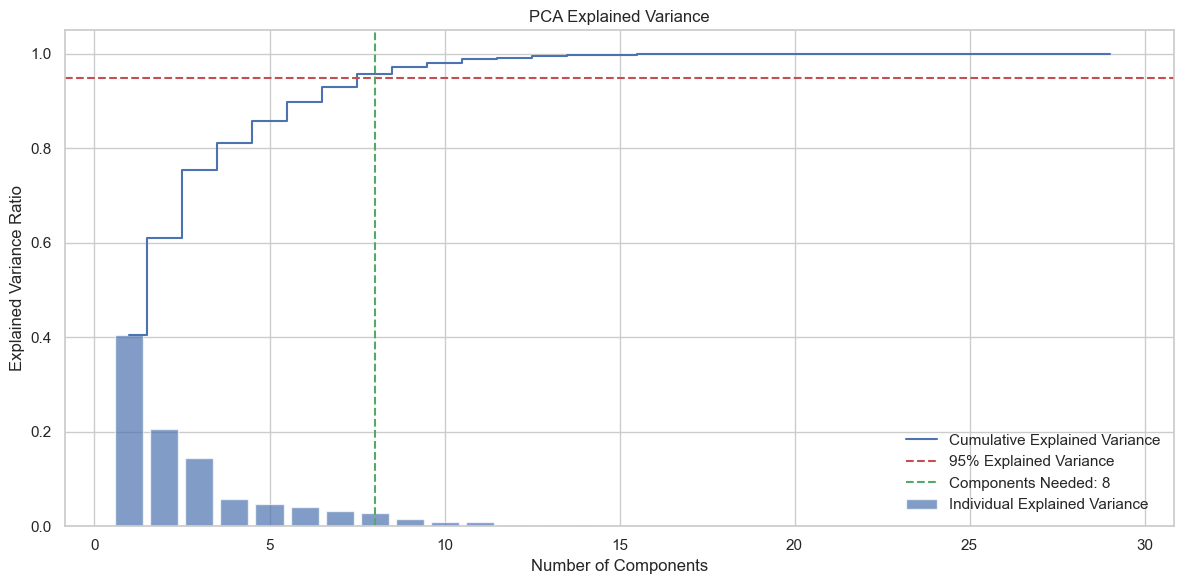

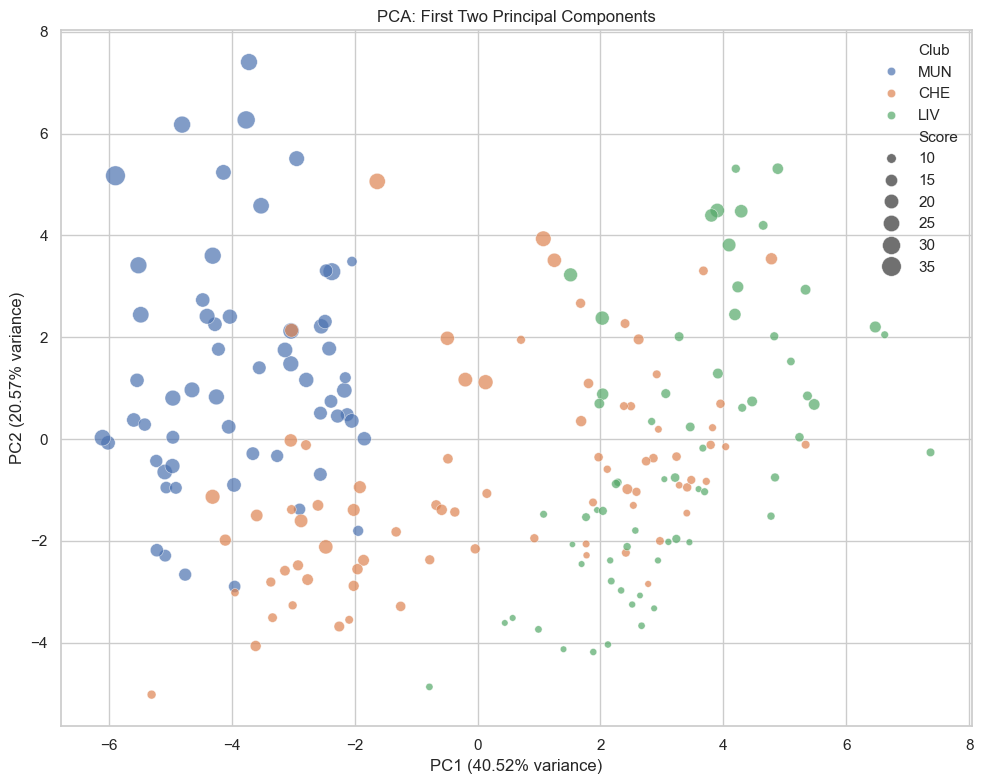

In [ ]:
# 1. Handle multicollinearity through feature selection
# Option 1: Remove one feature from each highly correlated pair
def select_features_by_correlation(df, high_corr_pairs, target='Score'):
    """Select features by removing one from each highly correlated pair."""
    # Start with all numeric features
    selected_features = numeric_cols.copy()
    
    # For each correlated pair, keep the one more correlated with target
    for col_i, col_j, _ in high_corr_pairs:
        corr_i = abs(df[col_i].corr(df[target]))
        corr_j = abs(df[col_j].corr(df[target]))
        
        # Remove feature with lower correlation to target
        if corr_i >= corr_j and col_j in selected_features:
            selected_features.remove(col_j)
            print(f"Removed {col_j} (corr with target: {corr_j:.3f}), kept {col_i} (corr with target: {corr_i:.3f})")
        elif corr_j > corr_i and col_i in selected_features:
            selected_features.remove(col_i)
            print(f"Removed {col_i} (corr with target: {corr_i:.3f}), kept {col_j} (corr with target: {corr_j:.3f})")
    
    return selected_features

print("\nFeature selection based on correlation with target:")
selected_features = select_features_by_correlation(df, high_corr_pairs, target='Score')
print(f"\nNumber of features after correlation-based selection: {len(selected_features)}")

# Option 2: Remove features with high VIF
def select_features_by_vif(df, features, threshold=10):
    """Iteratively remove features with high VIF."""
    selected = features.copy()
    
    while True:
        # Calculate VIF for current feature set
        X_with_constant = add_constant(df[selected])
        vifs = [variance_inflation_factor(X_with_constant.values, i) 
                for i in range(X_with_constant.shape[1])]
        
        # Create VIF dataframe
        vif_df = pd.DataFrame()
        vif_df["Feature"] = X_with_constant.columns
        vif_df["VIF"] = vifs
        
        # Find maximum VIF (excluding constant)
        vif_df_no_const = vif_df[vif_df['Feature'] != 'const']
        if vif_df_no_const.empty:
            break
            
        # Get maximum VIF feature
        max_vif = vif_df_no_const['VIF'].max()
        if max_vif < threshold:
            break
            
        # Remove feature with highest VIF
        feature_to_remove = vif_df_no_const.loc[vif_df_no_const['VIF'].idxmax(), 'Feature']
        selected.remove(feature_to_remove)
        print(f"Removed {feature_to_remove} with VIF: {max_vif:.2f}")
    
    return selected

print("\nFeature selection based on VIF threshold:")
vif_selected_features = select_features_by_vif(df, vif_features, threshold=10)
print(f"\nNumber of features after VIF-based selection: {len(vif_selected_features)}")

# 2. Apply PCA to handle multicollinearity
# Use the standardized data for PCA
pca = PCA()
pca_result = pca.fit_transform(X_standardized)

# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Determine number of components needed to explain 95% of variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"\nPCA Analysis:")
print(f"Number of components to explain 95% of variance: {n_components_95}")
print(f"Total number of original features: {X_standardized.shape[1]}")

# Visualize explained variance
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, 
       label='Individual Explained Variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
       label='Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.axvline(x=n_components_95, color='g', linestyle='--', 
           label=f'Components Needed: {n_components_95}')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.title('PCA Explained Variance')
plt.tight_layout()
plt.savefig('pca_explained_variance.png')
plt.show()

# Create a dataframe with the first few principal components
pca_df = pd.DataFrame(
    data=pca_result[:, :5],  # First 5 components
    columns=[f'PC{i+1}' for i in range(5)]
)

# Add the target variable for visualization
pca_df['Score'] = df['Score']
pca_df['Club'] = df['Club']

# Visualize first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Club', size='Score',
               sizes=(20, 200), alpha=0.7, data=pca_df)
plt.title('PCA: First Two Principal Components')
plt.xlabel(f'PC1 ({explained_variance[0]:.2%} variance)')
plt.ylabel(f'PC2 ({explained_variance[1]:.2%} variance)')
plt.tight_layout()
plt.savefig('pca_visualization.png')
plt.show()



PREPARED DATASETS FOR MODELING:
---------------------------------
1. Full standardized dataset: (201, 41)
   - All 29 features standardized
2. Selected features dataset: (201, 15)
   - 12 features selected and standardized
3. PCA components dataset: (201, 11)
   - 8 principal components explaining 95% variance

All scaled datasets saved successfully.


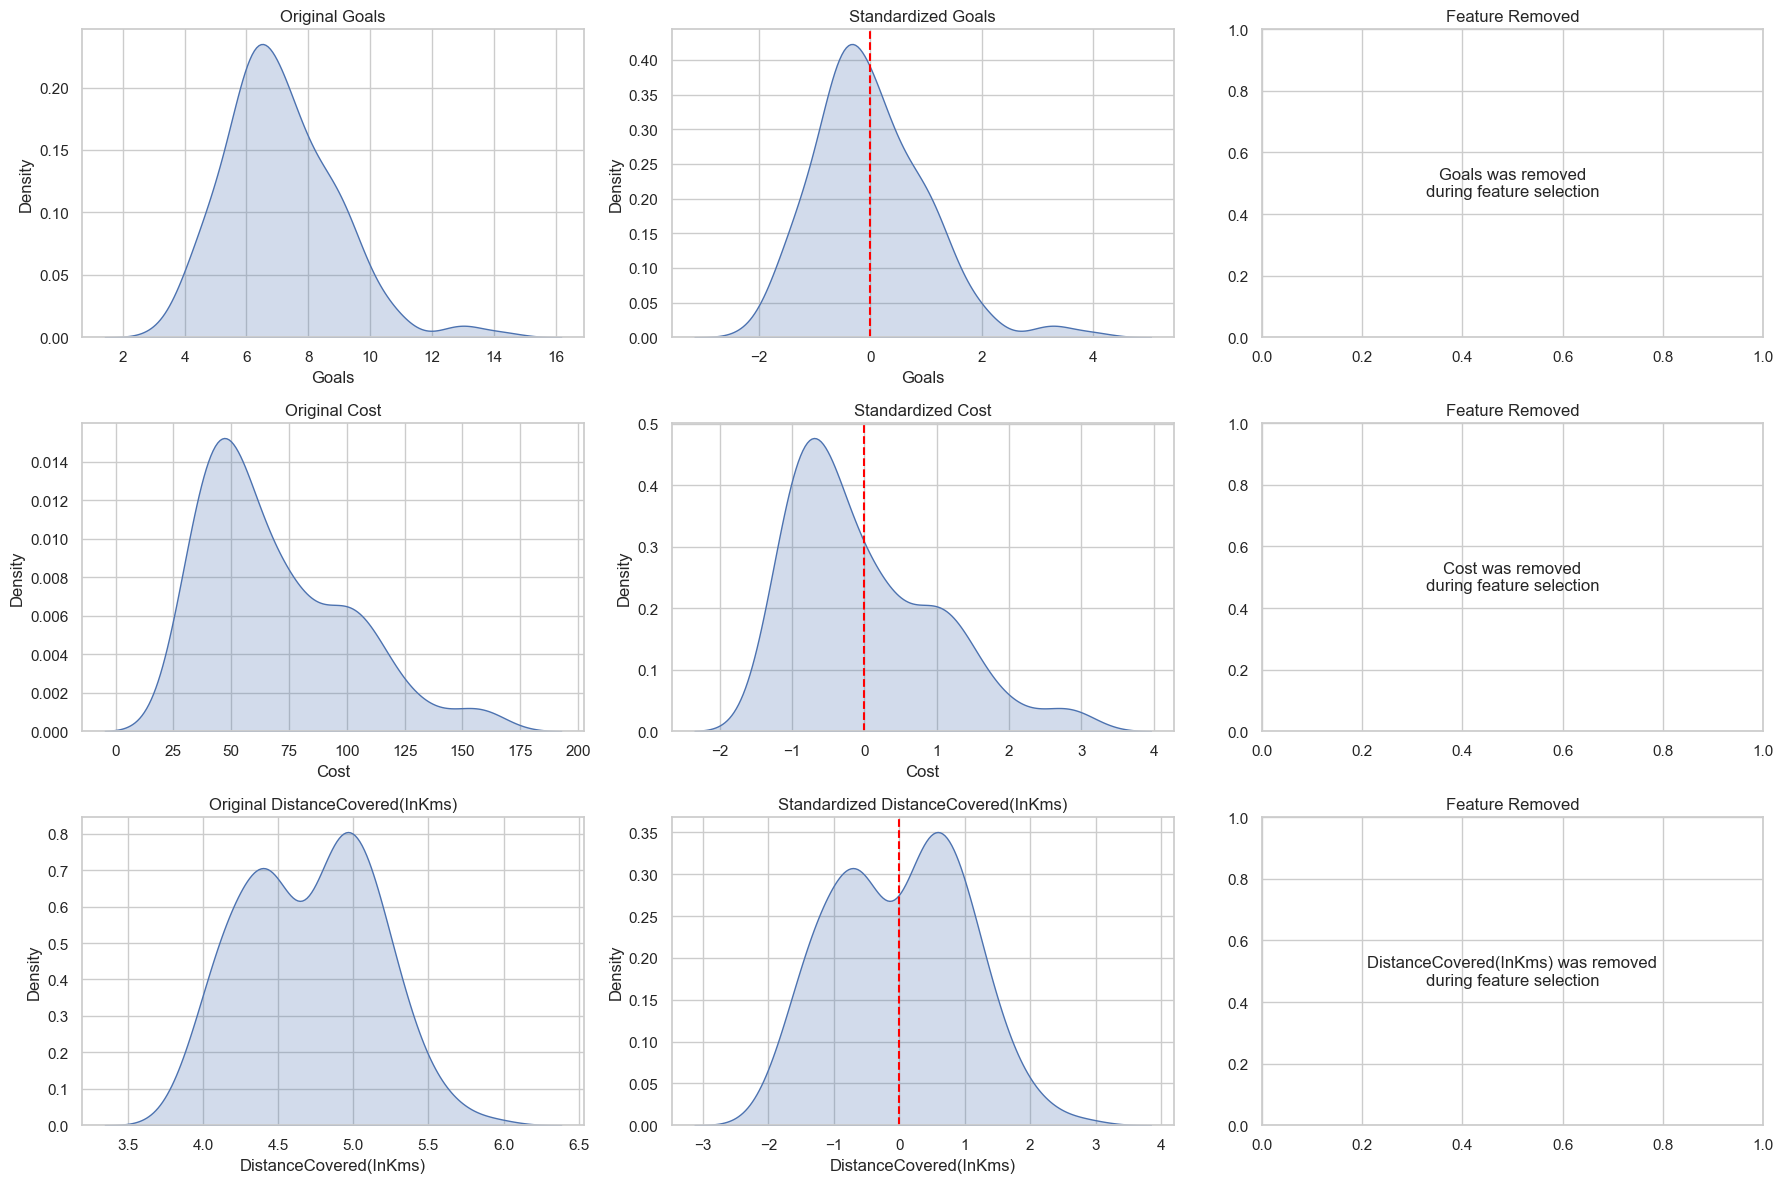

In [ ]:
# Create different versions of the dataset for model comparison
# 1. Dataset with standardized features
df_standard = df.copy()
df_standard[numeric_cols] = X_standardized

# 2. Dataset with selected features (correlation-based)
df_selected = df[selected_features + ['Score', 'Club', 'PlayerName']]
df_selected_scaled = df_selected.copy()
if len(selected_features) > 0:
    df_selected_scaled[selected_features] = standard_scaler.fit_transform(df_selected[selected_features])

# 3. Dataset with PCA components
# Create a dataframe with the PCA components needed to explain 95% variance
df_pca = pd.DataFrame(
    data=pca_result[:, :n_components_95],
    columns=[f'PC{i+1}' for i in range(n_components_95)]
)
# Add target and identification columns
df_pca['Score'] = df['Score']
df_pca['Club'] = df['Club']
df_pca['PlayerName'] = df['PlayerName']

# Create a final report on the datasets for modeling
print("\nPREPARED DATASETS FOR MODELING:")
print("---------------------------------")
print(f"1. Full standardized dataset: {df_standard.shape}")
print(f"   - All {len(numeric_cols)} features standardized")
print(f"2. Selected features dataset: {df_selected_scaled.shape}")
print(f"   - {len(selected_features)} features selected and standardized")
print(f"3. PCA components dataset: {df_pca.shape}")
print(f"   - {n_components_95} principal components explaining 95% variance")

# Save the prepared datasets
df_standard.to_csv('EPL_Soccer_MLR_LR_standardized.csv', index=False)
df_selected_scaled.to_csv('EPL_Soccer_MLR_LR_selected_features.csv', index=False)
df_pca.to_csv('EPL_Soccer_MLR_LR_pca.csv', index=False)

print("\nAll scaled datasets saved successfully.")

# Create a final visualization comparing distributions of key features across scaling techniques
key_features = ['Goals', 'Cost', 'DistanceCovered(InKms)']
fig, axes = plt.subplots(len(key_features), 3, figsize=(18, 12))

for i, feature in enumerate(key_features):
    # Original distribution
    sns.kdeplot(df[feature], ax=axes[i, 0], fill=True)
    axes[i, 0].set_title(f'Original {feature}')
    
    # Standardized distribution
    sns.kdeplot(df_standard[feature], ax=axes[i, 1], fill=True)
    axes[i, 1].axvline(x=0, color='red', linestyle='--')
    axes[i, 1].set_title(f'Standardized {feature}')
    
    # If feature is in selected features, show it; otherwise show text
    if feature in selected_features:
        sns.kdeplot(df_selected_scaled[feature], ax=axes[i, 2], fill=True)
        axes[i, 2].axvline(x=0, color='red', linestyle='--')
        axes[i, 2].set_title(f'Selected & Scaled {feature}')
    else:
        axes[i, 2].text(0.5, 0.5, f'{feature} was removed\nduring feature selection', 
                      horizontalalignment='center', verticalalignment='center',
                      transform=axes[i, 2].transAxes, fontsize=12)
        axes[i, 2].set_title(f'Feature Removed')

plt.tight_layout()
plt.savefig('final_scaling_comparison.png')
plt.show()



FEATURE SCALING AND MULTICOLLINEARITY SUMMARY
-----------------------------------------

1. Scaling Techniques Implemented:
   - StandardScaler: Mean=0, Std=1
   - MinMaxScaler: Range [0, 1]
   - RobustScaler: Median=0, Scale=IQR

2. Multicollinearity Detection:
   - Found 32 highly correlated feature pairs (|r| > 0.8)
   - Identified 24 features with VIF > 10

3. Multicollinearity Handling Approaches:
   - Correlation-based feature selection: Retained 12 out of 29 features
   - VIF-based feature selection: Retained 12 out of 27 features
   - PCA: Reduced dimensionality from 29 to 8 components (95% variance)

4. Prepared Datasets:
   - Full standardized dataset: 41 columns
   - Selected features dataset: 15 columns
   - PCA components dataset: 11 columns


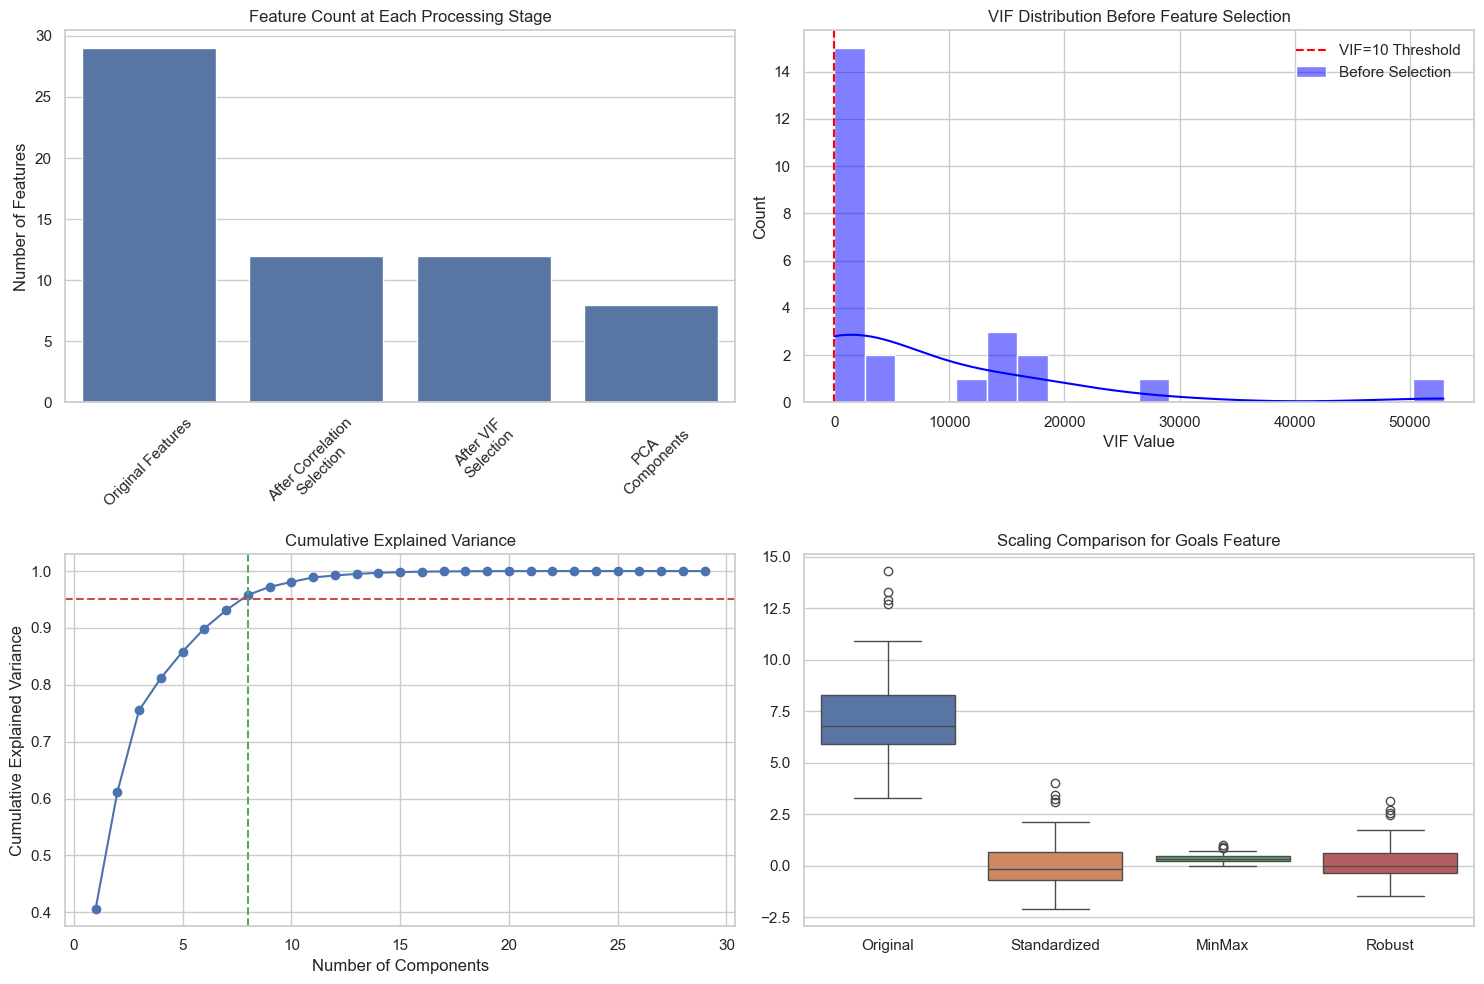

In [ ]:
# Create a comprehensive summary of scaling approaches
print("\nFEATURE SCALING AND MULTICOLLINEARITY SUMMARY")
print("-----------------------------------------")

# Summarize scaling techniques applied
print("\n1. Scaling Techniques Implemented:")
print("   - StandardScaler: Mean=0, Std=1")
print("   - MinMaxScaler: Range [0, 1]")
print("   - RobustScaler: Median=0, Scale=IQR")

# Summarize multicollinearity detection
print("\n2. Multicollinearity Detection:")
print(f"   - Found {len(high_corr_pairs)} highly correlated feature pairs (|r| > 0.8)")
print(f"   - Identified {len(vif_data_no_const[vif_data_no_const['VIF'] > 10])} features with VIF > 10")

# Summarize multicollinearity handling approaches
print("\n3. Multicollinearity Handling Approaches:")
print(f"   - Correlation-based feature selection: Retained {len(selected_features)} out of {len(numeric_cols)} features")
print(f"   - VIF-based feature selection: Retained {len(vif_selected_features)} out of {len(vif_features)} features")
print(f"   - PCA: Reduced dimensionality from {len(numeric_cols)} to {n_components_95} components (95% variance)")

# Summarize datasets prepared for modeling
print("\n4. Prepared Datasets:")
print(f"   - Full standardized dataset: {df_standard.shape[1]} columns")
print(f"   - Selected features dataset: {df_selected_scaled.shape[1]} columns")
print(f"   - PCA components dataset: {df_pca.shape[1]} columns")

# Create a visual summary of the scaling and multicollinearity process
plt.figure(figsize=(15, 10))

# Plot 1: Feature count at each stage
stages = ['Original Features', 'After Correlation\nSelection', 'After VIF\nSelection', 'PCA\nComponents']
counts = [len(numeric_cols), len(selected_features), len(vif_selected_features), n_components_95]

plt.subplot(2, 2, 1)
sns.barplot(x=stages, y=counts)
plt.title('Feature Count at Each Processing Stage')
plt.ylabel('Number of Features')
plt.xticks(rotation=45)

# Plot 2: VIF distribution before and after selection
plt.subplot(2, 2, 2)
sns.histplot(vif_data_no_const['VIF'], bins=20, kde=True, color='blue', alpha=0.5, label='Before Selection')
plt.axvline(x=10, color='red', linestyle='--', label='VIF=10 Threshold')
plt.title('VIF Distribution Before Feature Selection')
plt.xlabel('VIF Value')
plt.legend()

# Plot 3: PCA explained variance
plt.subplot(2, 2, 3)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'b-', marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=n_components_95, color='g', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Plot 4: Feature scale comparison
plt.subplot(2, 2, 4)
box_data = pd.DataFrame({
    'Original': df['Goals'],
    'Standardized': df_standard['Goals'],
    'MinMax': df_minmax['Goals'],
    'Robust': df_robust['Goals']
})
sns.boxplot(data=box_data)
plt.title('Scaling Comparison for Goals Feature')

plt.tight_layout()
plt.savefig('scaling_multicollinearity_summary.png')
plt.show()
